In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [202]:
FIL=pd.read_csv('2017.tsv', sep='	')
UN=pd.read_csv('2017-bis.tsv', sep='	')
HUM=pd.read_csv('ModEvents.tsv', sep='	')

FileNotFoundError: [Errno 2] File 2017-bis.tsv does not exist: '2017-bis.tsv'

To do:
    - Decide which categories are we filtering
    - Try to find news which are missclassified

In [20]:
HUM

guid lang typeid subtypeid  \
0              vz-d5fd9dc2165470e75b1a14ada44b7b04   ru     AR       NaN   
1              AP-38deb4cd2535052cd17e716caca23dc8   en    HUM       NaN   
2      news-yahoo-44eab1b056f0eaa8b58ec30389f23cac   en  TRIAL       NaN   
3        alertnet-6def7a397e01057300d7d7dfe6ac0f59   en     EQ       NaN   
4              AP-be64c5c40fbd28077aa44dcaebcf8df3   en     EQ       NaN   
...                                            ...  ...    ...       ...   
17531       miami-2d118776ddb62d2ba234dd5aac48740d   es   NONE       NaN   
17532       tsfPT-48791b2da8b20c70768133727191ad7a   pt   NONE       NaN   
17533         sol-c6ca1502abfb7ca2e12a0f7c73245e6f   pt   NONE       NaN   
17534       folha-8052496470cd4e20a7d4f1d61c0c7505   pt     MM       NaN   
17535  radiomayak-a6573d9f2ee44bd07cef26b8c1a6dfc0   ru     TR       NaN   

                        pubdate  \
0      2010-01-14 12:00:00+0100   
1      2010-01-14 12:00:00+0100   
2      2010-01-14 12:00:00+0100   
3      2010-01-14 12:00:00+0100   
4      2010-01-14 12:00:00+0100   
...                         ...   
17531  2010-01-13 12:00:00+0100   
17532  2010-01-14 12:00:00+0100   
17533  2010-01-14 12:00:00+0100   
17534  2010-01-14 12:00:00+0100   
17535  2010-01-14 12:00:00+0100   

                                                   title  \
0      Двух калининградских наркополицейских подозрев...   
1       Mass burials after Haiti quake; aid jams airport   
2      Iraq sentences 11 for August bombing in Baghda...   
3      Haiti has already buried 7,000 quake dead-pres...   
4        Many countries report missing and dead in Haiti   
...                                                  ...   
17531  El presidente del Senado haitiano, herido grav...   
17532  Rui Pereira diz que havia 14 portugueses no Ha...   
17533  Descarga de barragens mata uma centena de animais   
17534  Acidente mata cinco pessoas da mesma família e...   
17535                            В Испании бушует ураган   

                                             description  zone   eventdate  \
0      \Сегодня во второй половине дня по подозрению ...  None  2010-01-14   
1      PORT-AU-PRINCE – Troops and planeloads of food...  None  2010-01-14   
2      The Christian Science Monitor - An Iraqi court...  None  2010-01-14   
3      14 Jan 2010 21:28:29 GMT Source: Reuters PORT-...  None  2010-01-14   
4      A glance on countries reporting dead and missi...  None  2010-01-14   
...                                                  ...   ...         ...   
17531  El presidente del Senado de Haití, Kelly Basti...  None  2010-01-13   
17532  O ministro da Administração Interna, Rui Perei...  None  2010-01-14   
17533  Cerca de 100 animais morreram após serem arras...  None  2010-01-14   
17534  Um acidente entre um carro e um caminhão, no k...  None  2010-01-14   
17535  На Испанию обрушился ураган. В некоторых район...  None  2010-01-14   

                                                    link          gid  \
0            http://www.vz.ru/news/2010/1/14/366301.html  167846082.0   
1      http://hosted.ap.org/dynamic/stories/C/CB_HAIT...   16976484.0   
2      http://news.yahoo.com/s/csm/20100114/wl_csm/27...   17106542.0   
3      http://www.alertnet.org/thenews/newsdesk/N1416...   16976484.0   
4      http://hosted.ap.org/dynamic/stories/H/HAITI_M...   16976484.0   
...                                                  ...          ...   
17531  http://www.elnuevoherald.com/noticias/america-...   16976484.0   
17532  http://tsf.sapo.pt/PaginaInicial/Vida/Interior...   16976484.0   
17533  http://sol.sapo.pt/PaginaInicial/Sociedade/Int...      14013.0   
17534  http://www1.folha.uol.com.br/folha/cotidiano/u...   54269983.0   
17535   http://www.radiomayak.ru/doc.html?id=168942&cid=        218.0   

             lat        lon           name  \
0      54.707600  20.503500  Калининградом   
1      18.542990 -72.343102   Порт-о-Пренс   
2      33.334000  44.397800        Bagh

In [33]:
MORE_1.groupby(['Type']).agg(['count'])

Unnamed: 0   Guid   Lang Pub. Date  Title Description Event Date  \
                 count  count  count     count  count       count      count   
Type                                                                           
AA                2979   2979   2979      2979   2979        2979       2979   
AR                9847   9847   9847      9847   9846        9847       9847   
ARM              17322  17322  17322     17322  17322       17322      17322   
ARSON                5      5      5         5      5           5          5   
AS                 326    326    326       326    326         326        326   
ASL                135    135    135       135    135         135        135   
AV                 405    405    405       405    405         405        405   
BC                 367    367    367       367    367         367        367   
BO                9720   9720   9720      9720   9720        9720       9720   
CRC               1258   1258   1258      1258   1258        1258       1258   
CRP                  7      7      7         7      7           7          7   
CYBER               34     34     34        34     34          34         34   
DMSTR               29     29     29        29     29          29         29   
DPRT               436    436    436       436    436         436        436   
EQ                2377   2377   2377      2377   2377        2377       2377   
EX                1391   1391   1391      1391   1391        1391       1391   
FL                2619   2619   2619      2619   2619        2619       2619   
HE                 199    199    199       199    199         199        199   
HUM               5646   5646   5646      5646   5646        5646       5646   
HW                1055   1055   1055      1055   1055        1055       1055   
IR                 317    317    317       317    317         317        317   
KD                1302   1302   1302      1302   1302        1302       1302   
LG                 211    211    211       211    211         211        211   
LS                1392   1392   1392      1392   1392        1392       1392   
MM               26352  26352  26352     26352  26352       26352      26352   
MMO                167    167    167       167    167         167        167   
MMX                 67     67     67        67     67          67         67   
MT                2505   2505   2505      2505   2505        2505       2505   
MU                   1      1      1         1      1           1          1   
ND                 872    872    872       872    872         872        872   
NONCRISIS           60     60     60        60     60          60         60   
NONE             46010  46010  46010     46010  46009       46010      46010   
OTHER                7      7      7         7      7           7          7   
PA                1082   1082   1082      1082   1082        1082       1082   
PBREAK             227    227    227       227    227         227        227   
PLRE               220    220    220       220    220         220        220   
POLITRETURN          3      3      3         3      3           3          3   
PROPSEIZURE         85     85     85        85     85          85         85   
RB                 694    694    694       694    694         694        694   
RE                 357    357    357       357    357         357        357   
REFINFLUX          236    236    236       236    236         236        236   
RIOT                18     18     18        18     18          18         18   
SATRAFF              1      1      1         1      1           1          1   
SH               15522  15522  15522     15522  15521       15522      15522   
SP                 150    150    150       150    150         150        150   
SR                1454   1454   1454      1454   1454        1454       1454   
ST                2020   2020   2020      2020   2020        2020       2020   
STRK        

In [55]:
UN[(UN['Dead']!=0.0) | (UN['Injured']!='0')]

Guid Lang       Type  \
3      afp-english-3e77307096fe059e5546417a5b3867b7.2...   en         XP   
5      firstpost-3f482808ed77357f336140a03be25ffe.201...   en         MM   
7      newstalkzb-4bdb7c070c1f87ba19fad10928d34f56.20...   en       NONE   
9      fox10tv-b98fd2c3f3a84c0a20de6bc1608de8b6.20161...   en         AR   
10     charlotteobserver-5434e6d7ae8c872867aba3e976cd...   en         TA   
...                                                  ...  ...        ...   
90180  express-c58737262e44bb72e2860f4bfd54e3d5.20170...   en  NONCRISIS   
90181  bangordailynews-b6c608f254d1af84abde53f413c07d...   en      OTHER   
90182  wbrc-4757c549fb92561f0e7039744e90432b.20170801.en   en         MM   
90183  mailonsunday-bfb24e10cb5a9cfe7343f71f1791a22c....   en         LG   
90184  business-standard-b9bd6704623d4fe0d74e6f5bc57c...   en      CYBER   

                           Pub. Date  \
3       Sun Jan 01 00:00:00 CET 2017   
5       Sun Jan 01 00:00:00 CET 2017   
7       Sun Jan 01 00:00:00 CET 2017   
9       Sun Jan 01 00:00:00 CET 2017   
10      Sun Jan 01 00:00:00 CET 2017   
...                              ...   
90180  Wed Aug 02 00:00:00 CEST 2017   
90181  Wed Aug 02 00:00:00 CEST 2017   
90182  Wed Aug 02 00:00:00 CEST 2017   
90183  Wed Aug 02 00:00:00 CEST 2017   
90184  Wed Aug 02 00:00:00 CEST 2017   

                                                   Title  \
3          Klopp lauds Liverpool's 'wonderful' Wijnaldum   
5      Indian coal mine death toll rises to 16, some ...   
7      Road toll jumps to 17 after pedestrian deaths ...   
9                   Albertville toddler beaten, critical   
10     Revelers say hello to 2017, goodbye to a year ...   
...                                                  ...   
90180        Boy, 2, identified as Grenfell Tower victim   
90181  Wray confirmed by U.S. Senate to lead FBI afte...   
90182  Person killed in 4-vehicle accident on Valleyd...   
90183  National Geographic reveals this year's best t...   
90184  Game of Thrones season 7 episode 4 script leak...   

                                             Description  Event Date  \
3      LIVERPOOL - Liverpool manager Jurgen Klopp hai...  2017-01-01   
5      BHUBANESWAR, India, Dec 31 (Reuters) - The dea...  2017-01-01   
7      The holiday road toll stands at 17, rising ove...  2017-01-01   
9      ALBERTVILLE, Ala. (AP) - A Marshall County tod...  2017-01-01   
10     Stefania Moran, from Puebla, Mexico, and five ...  2017-01-01   
...                                                  ...         ...   
90180  She was discovered on the 14th floor and her p...  2017-08-02   
90181  WASHINGTON — The U.S. Senate on Tuesday confir...  2017-08-02   
90182  SHELBY COUNTY, AL (WBRC) - Emergency crews res...  2017-08-02   
90183  A hauntingly beautiful image of a lightning st...  2017-08-02   
90184  After anonymous hackers claiming to have leake...  2017-08-02   

                                                    Link      Lat       Lon  \
3      https://labs.emm4u.eu/Nemo/nemo/Story/afp-engl...  47.3733  -120.419   
5      https://labs.emm4u.eu/Nemo/nemo/Story/firstpos...  28.5687   77.2168   
7      https://labs.emm4u.eu/Nemo/nemo/Story/newstalk... -35.2303   173.945   
9      https://labs.emm4u.eu/Nemo/nemo/Story/fox10tv-...  34.2661  -86.2145   
10     https://labs.emm4u.eu/Nemo/nemo/Story/charlott...  41.2076   28.5276   
...                                                  ...      ...       ...   
90180  https://labs.emm4u.eu/Nemo/nemo/Story/express-... -33.8875   148.165   
90181  https://labs.emm4u.eu/Nemo/nemo/Story/bangorda...  55.7388   37.6665   
90182  https://labs.emm4u.eu/Nemo/nemo/Story/wbrc-475...  41.8165   -71.426   
90183  https://labs.emm4u.eu/Nemo/nemo/Story/mailonsu...  51.4528  -1.01125   
90184  https://labs.emm4u.eu/Nemo/nemo/Story/business...  37.9790  -121.261   

                                              Loc. Name  Dead Injured  \
3                              Washington:United S

In [70]:
UN['Injured'].astype('int64')

ValueError: invalid literal for int() with base 10: "Woman punched by Oklahoma's Joe Mixon says assault occurred ..."

In [54]:
(UN['Dead']!=0.0) | (UN['Injured']!='0')

0        False
1        False
2        False
3         True
4        False
         ...  
90180     True
90181     True
90182     True
90183     True
90184     True
Length: 90185, dtype: bool

In [732]:
AUX=UN[(UN['Dead']!=0.0) |((UN['Injured'].astype(str)!='0') & (UN['Injured'].astype(str)!='0.0'))].groupby(['Type']).agg(['count'])['Title']

In [93]:
AUX2=UN.groupby(['Type']).agg(['count'])['Title']['count']
AUX.divide(AUX2, axis='index')

count
Type                 
AA           0.628531
AR           0.298817
ARM          0.702768
ARSON        0.400000
AS           0.929907
ASL          0.240000
AV           0.606250
BC           0.907407
BO           0.667513
CRC          0.084351
CRP          0.118644
CYBER        0.012262
DMSTR        0.103297
DPRT         0.144578
EQ           0.172211
EX           0.896135
FL           0.329496
HE           0.147059
HUM          0.242870
HW           0.587963
IR           0.105675
KD           0.224832
LG           0.337838
LS           0.518750
MM           0.608051
MMO          0.512422
MMOV              NaN
MMX          0.390698
MT           0.509524
MU           1.000000
ND           0.323944
NONCRISIS    0.710247
NONE         0.922442
OTHER        0.000195
PA           0.273725
PBREAK       0.418605
PLRE         0.139344
POLITRETURN       NaN
PROPSEIZURE  0.102804
RB           0.206678
RE           0.119186
REFINFLUX    0.134199
RIOT         0.355263
SABOTAGE          NaN
SATRAFF      0.250000
SH           0.910210
SP           0.145811
SR           0.208259
ST           0.792247
STRK         0.043020
SU           0.833898
TA           0.400867
TR           0.090789
TRIAL        0.000110
TS           0.250000
VA           0.186813
VI           0.133333
VO                NaN
WF           0.119326
XP           0.559633

In [107]:
AUX.sum()

count    36145
dtype: int64

In [98]:
AUX2.indexAUX.index

ValueError: Lengths must match to compare

In [90]:
UN.groupby(['Type']).agg(['count'])['Title']['count']

AttributeError: 'Series' object has no attribute 'asarray'

In [77]:
UN['Injured'].astype('str')

0          0
1          0
2          0
3          0
4          0
        ... 
90180    0.0
90181    0.0
90182    0.0
90183    0.0
90184    0.0
Name: Injured, Length: 90185, dtype: object

# Putting the dataset together

In [139]:
years = np.linspace(2008, 2017, 10)
data= pd.read_csv('emm4/2007.tsv', sep='	')
l=len(data)
for year in years:
    year=int(year)
    aux=pd.read_csv('emm4/'+str(year)+'.tsv', sep='	', error_bad_lines=False)
    l+=len(aux)
    #data=pd.concat(frame)

b'Skipping line 10508: expected 16 fields, saw 17\nSkipping line 16874: expected 16 fields, saw 17\n'
b'Skipping line 10206: expected 16 fields, saw 17\n'
/Users/guillemramirezsantos/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (12,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/guillemramirezsantos/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (9,12,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
b'Skipping line 96620: expected 16 fields, saw 17\n'


In [15]:
import pandas as pd
data=pd.read_csv('emm4/data.csv')

/Users/guillemramirezsantos/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10,13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
data.iloc[0]['Description']

"US, Iraqi forces sweep through Baghdad AGENCIES, WASHINGTON, BAGHDAD AND KUFA, IRAQ Saturday, Feb 17, 2007, Page 1 US and Iraqi forces are meeting little resistance as they sweep through Baghdad, a US officer said yesterday, a day after Iraq's president said Shiite cleric Moqtada al-Sadr had ordered his leaders to leave the country."

In [3]:
aux=data[(data['Dead']!=0.0) |((data['Injured'].astype(str)!='0') & (data['Injured'].astype(str)!='0.0'))]
len(aux)

303133

In [11]:
aux.iloc[25]['Description']

'An explosion rocked a west Texas refinery Friday, injuring at least 19 people and sparking a blaze that sent a huge black cloud billowing into the sky.'

In [14]:
aux.iloc[25]

Unnamed: 0                                                    51
Guid           news-yahoo-7cc38c077ef06bd68c724915686adfd2.20...
Lang                                                          en
Type                                                          MM
Pub. Date                           Sat Feb 17 00:00:00 CET 2007
Title                          Blast at Texas refinery wounds 19
Description    An explosion rocked a west Texas refinery Frid...
Event Date                                            2007-02-17
Link           https://labs.emm4u.eu/Nemo/nemo/Story/news-yah...
Lat                                                            0
Lon                                                            0
Loc. Name                                                    NaN
Dead                                                           0
Injured                                                       19
Snippet                   19 injured in Texas refinery blaze ...
Aticles                  

In [76]:
aux.iloc[-8]['Description']

'An Orlando police statement says the bag knocked his weapon from its holster. The agent "tried to catch the firearm and inadvertently pulled the trigger." Police said the agent was going to be flying with a loaded gun. The Orlando Sentinel reports the agent is an Immigration and Customs Enforcement agent.'

In [205]:
EX_1=aux[~((aux['Dead']>1.0) |((aux['Injured'].astype(str)!='1') & (aux['Injured'].astype(str)!='1.0') & (aux['Injured'].astype(str)!='0.0') & (aux['Injured'].astype(str)!='0')))]
MORE_1_BO=aux[((aux['Dead']>1.0) |((aux['Injured'].astype(str)!='1') & (aux['Injured'].astype(str)!='1.0') & (aux['Injured'].astype(str)!='0.0') & (aux['Injured'].astype(str)!='0')))]

In [83]:
len(MORE_1_BO)

183180

In [86]:
MORE_1_BO=MORE_1_BO.drop(columns=['Unnamed: 0'])

In [740]:
len(aux)-len(MORE_1)

119953

In [ ]:
def get_number_pos(span):
    span = alpha2digit(span, "en")
    doc = nlp(span)
    for ent in doc.ents:
        if ent.label_ == "CARDINAL":
            num_arr = ent.text.split(" ")
            num_pos = int(ent.start)
            for i, token in enumerate(num_arr):
                if token.isdigit():
                    num = token
                    num_pos = num_pos + i
                    return num, num_pos
                else:
                    try:
                        num = text2num(token, "en")
                        num_pos = num_pos + i
                        return num, num_pos
                    except:
                        pass
        else:
            return None, None

In [392]:
from text_to_num import text2num
from text_to_num import alpha2digit
alpha2digit('I wanted to be the one who one hundred and ten', "en")

'I wanted to be the one who 100 and 10'

In [310]:
len(MORE_1['Injured'])

183180

In [24]:
#Dictionaries for reference
ones = {"1":"One","2":"Two","3":"Three","4":"Four","5":"Five","6":"Six", "7":"Seven","8":"Eight","9":"Nine"}
ones_B = {"01":"One","02":"Two","03":"Three","04":"Four","05":"Five","06":"Six", "07":"Seven","08":"Eight","09":"Nine"}
afterones = {"10":"Ten","11":"Eleven","12":"Twelve","13":"Thirteen","14":"Fourteen","15":"Fifteen","16":"Sixteen", "17":"Seventeen","18":"Eighteen","19":"Nineteen"}
tens = {"2":"Twenty","3":"Thirty","4":"Fourty","5":"Fifty","6":"Sixty", "7":"Seventy","8":"Eighty","9":"Ninety"}
grand={0:" Billion, ",1:" Million, ",2:" Thousand, ",3:""}

#Function converting number to words
#lead cuts number into "million" or "thousand"
#sign is what is added between the decimal and the unit
def num_to_wrds(val, lead=False, sign=' '):
    val=str(val)
    ans = ""
    if lead:
        if len(val)>6 and val[-6:]=='000000':
            aux=val[:-6]
            return str(aux)+ ' million'
        elif len(val)>3 and val[-3:]=='000':
            aux=val[:-3]
            return str(aux)+ ' thousand'
    if len(val)>6:
        if val[:-6]!='000':
            aux=val[:-6]
            while len(aux)<3: aux='0'+aux
            ans=num_to_wrds(aux, sign=sign)+ ' million '
        val=val[-6:]
    if len(val)>3:
        if val[:-3]!='000':
            aux=val[:-3]
            while len(aux)<3: aux='0'+aux
            ans=ans+num_to_wrds(aux, sign=sign)+ ' thousand '
        val=val[3:]
    while len(val)<3: val='0'+val
    if val[0] in ones:
        x = val
        ans = ans + ones[val[0]] + " hundred "
    if val[1:] in afterones:
        ans = ans + afterones[val[1:]] + " "
    elif val[1] in tens:
        ans = ans + tens[val[1]] 
        if val[2:3] in ones or val[1:3] in ones_B: ans=ans+sign
        if val[2:3] in ones:
            ans = ans + ones[val[2]]
    if val[1:3] in ones_B:
        ans = ans + ones[val[2]]
    while ans[0]==' ': ans=ans[1:]
    while ans[-1]==' ': ans=ans[:-1]
    while ans!=ans.replace('  ', ' '):
        ans=ans.replace('  ', ' ')
    return str(ans.lower())

def find_number(st, number):
    if st.find(' '+str(number)+' ')>-1: return [st.find(' '+str(number)+' ')+1, len(str(number))]
    if len(str(number))>6: 
        aux=' '+str(number)[:-6]+','+str(number)[-6:-3]+','+str(number)[-3:]+' '
        if st.find(aux)>-1: return [st.find(aux)+1, len(aux)-2]
        aux=' '+str(number)[:-6]+'.'+str(number)[-6:-3]+'.'+str(number)[-3:]+' '
        if st.find(aux)>-1: return [st.find(aux)+1, len(aux)-2]
        aux=' '+str(number)[:-6]+' '+str(number)[-6:-3]+' '+str(number)[-3:]+' '
        if st.find(aux)>-1: return [st.find(aux)+1, len(aux)-2]
    elif len(str(number))>3: 
        aux=' '+str(number)[:-3]+','+str(number)[-3:]+' '
        if st.find(aux)>-1: return [st.find(aux)+1, len(aux)-2]
        aux=' '+str(number)[:-3]+' '+str(number)[-3:]+' '
        if st.find(aux)>-1: return [st.find(aux)+1, len(aux)-2]
        aux=' '+str(number)[:-3]+'.'+str(number)[-3:]+' '
        if st.find(aux)>-1: return [st.find(aux)+1, len(aux)-2]
    if st.lower().find(num_to_wrds(number))>-1: return [st.lower().find(num_to_wrds(number)), len(num_to_wrds(number))]
    if st.lower().find(num_to_wrds(number, sign='-'))>-1: return [st.lower().find(num_to_wrds(number, sign='-')), len(num_to_wrds(number, sign='-'))]
    if st.lower().find(num_to_wrds(number, sign=''))>-1: return [st.lower().find(num_to_wrds(number, sign='')), len(num_to_wrds(number, sign=','))]
    if st.lower().find(num_to_wrds(number, True, sign='-'))>-1: return [st.lower().find(num_to_wrds(number, True, sign='-')), len(num_to_wrds(number, True, sign='-'))]
    if st.lower().find(num_to_wrds(number, True, sign=''))>-1: return [st.lower().find(num_to_wrds(number, True, sign='')), len(num_to_wrds(number, True, sign=''))]
    if st.lower().find(num_to_wrds(number, True))>-1: [st.lower().find(num_to_wrds(number, True)), len(num_to_wrds(number, True))]
    return [-1, -1]

In [29]:
num_to_wrds(365000, lead=True, sign='')

'365 thousand'

In [175]:
s='Of those, HRW said at least one was killed since President Conte imposed 10 days of martial law on Monday night, although news reports have recorded nine people killed around the country since then. In addition to the HRW count, IRIN has confirmed that a seven year-old girl, Aicha Diallo, was shot....'
s[find_number(s, 9)[0]: find_number(s, 9)[0]+find_number(s, 9)[1]]

'nine'

In [238]:
alt=0
idx_fail=[]
for idx in tqdm(range(len(MORE_1_BO))): #MORE_1 tambe es possible
    temp=MORE_1_BO.iloc[idx]
    contat = False
    if temp['Dead']>1:
        st=str(temp['Title'])
        wo=int(temp['Dead'])
        aa=find_number(st, wo)
        if aa[0]>0: 
            MORE_1_BO.at[idx, 'DT']=str(aa[0])+' '+str(aa[1])
        st=str(temp['Description'])
        aa=find_number(st, wo)
        if aa[0]>0: 
            MORE_1_BO.at[idx, 'DD']=str(aa[0])+' '+str(aa[1])
        st=str(temp['Snippet'])
        aa=find_number(st, wo)
        if aa[0]>0: 
            MORE_1_BO.at[idx, 'DS']=str(aa[0])+' '+str(aa[1])
    injured=str(temp['Injured'])
    if len(injured)<=10: 
        if len(injured)>2 and injured[-2]=='.': injured=int(injured[:-2])
        if injured =='nan': injured=0
        injured=int(injured)
        if injured>1:
            st=str(temp['Title'])
            wo=int(injured)
            aa=find_number(st, wo)
            if aa[0]>0: 
                MORE_1_BO.at[idx, 'IT']=str(aa[0])+' '+str(aa[1])
            st=str(temp['Description'])
            aa=find_number(st, wo)
            if aa[0]>0: 
                MORE_1_BO.at[idx, 'ID']=str(aa[0])+' '+str(aa[1])
            st=str(temp['Snippet'])
            aa=find_number(st, wo)
            if aa[0]>0: 
                MORE_1_BO.at[idx, 'IS']=str(aa[0])+' '+str(aa[1])

100%|██████████| 183195/183195 [01:51<00:00, 1636.56it/s]


In [228]:
MORE_1_BO.loc[0, 'DD']='3'
MORE_1_BO.iloc[0]

level_0                                                        0
Guid           alertnet-de69a9f8ec2133a6b27fb99fe13e686f.2007...
Lang                                                          en
Type                                                          SH
Pub. Date                           Fri Feb 16 00:00:00 CET 2007
Title                      Life Means Terror in Army-Run Conakry
Description    Of those, HRW said at least one was killed sin...
Event Date                                            2007-02-16
Link           https://labs.emm4u.eu/Nemo/nemo/Story/alertnet...
Lat                                                            0
Lon                                                            0
Loc. Name                                                    NaN
Dead                                                           9
Injured                                                        0
Snippet        ...Monday night, although news reports have re...
Aticles                  

In [227]:
MORE_1_BO=MORE_1_BO.reset_index()
MORE_1_BO=MORE_1_BO.drop(columns=['index'])

In [252]:
MORE_1_BO=MORE_1_BO.drop(columns=['level_0'])['Snippet']

KeyError: "['level_0'] not found in axis"

In [302]:
76936+85063+31155+26065+23432+8265

250916

In [177]:
temp=MORE_1_BO.iloc[0]
st=str(temp['Description'])
aa=find_number(st, wo)
if aa[0]: 
    print(aa)

[149, 4]


In [306]:
len(MORE_1_BO)

183195

In [315]:
ki=[]
numalt=[]
sents=[]
loc=[]
for idx in tqdm(range(len(MORE_1_BO))):
    aux=MORE_1_BO.iloc[idx]
    if str(aux['DD'])!='nan':
        sent=aux['Description']
        auxaux=aux['DD']
        sents.append(sent)
        numalt.append(aux['Dead'])
        loc.append(auxaux)
        ki.append('D')
    if str(aux['DS'])!='nan':
        sent=aux['Snippet']
        auxaux=aux['DS']
        sents.append(sent)
        numalt.append(aux['Dead'])
        loc.append(auxaux)
        ki.append('D')
    if str(aux['DT'])!='nan':
        sent=aux['Title']
        auxaux=aux['DT']
        sents.append(sent)
        numalt.append(aux['Dead'])
        loc.append(auxaux)
        ki.append('D')
    if str(aux['ID'])!='nan':
        sent=aux['Description']
        auxaux=aux['ID']
        sents.append(sent)
        numalt.append(aux['Injured'])
        loc.append(auxaux)
        ki.append('I')
    if str(aux['IS'])!='nan':
        sent=aux['Snippet']
        auxaux=aux['IS']
        sents.append(sent)
        numalt.append(aux['Injured'])
        loc.append(auxaux)
        ki.append('I')
    if str(aux['IT'])!='nan':
        sent=aux['Title']
        auxaux=aux['IT']
        sents.append(sent)
        numalt.append(aux['Injured'])
        loc.append(auxaux)
        ki.append('I')

100%|█████████▉| 183004/183195 [02:06<00:00, 1955.75it/s]

KeyboardInterrupt: 

In [ ]:
np.save('ki', ki)
np.save('numalt', numalt)
np.save('sents', sents)
np.save('loc', loc)
#ki=[]
#numalt=[]
#sents=[]
#loc=[]

In [333]:
num=4
print(numalt[num])
print(sents[num][196:198])
print(loc[num])

15.0
15
196 2


In [358]:
el=[]
nume=[]
for idx in tqdm(range(len(sents))):
    auxaux=loc[idx].split()
    sent=sents[idx]
    span=[int(auxaux[0]), int(auxaux[1])]
    number=sent[int(span[0]):int(span[0])+int(span[1])]
    sent=sent[:span[0]]+" numnumnum "+sent[span[0]+span[1]:]
    sent=sent.replace('U.S.A.', 'usausausa')
    sent=sent.replace('U.S.', 'usususus')
    sent=sent.lower()
    sent=re.sub(r'\W+', ' ', sent)
    sent=re.sub(r'\.', ' ', sent)
    sent=sent.replace('usausausa', 'u.s.a.')
    sent=sent.replace('usususus', 'u.s.')
    sent=sent.split()
    IDX=sent.index('numnumnum')
    new_span=[max(IDX-5, 0), min(IDX+6, len(sent)-1)]
    sent=sent[new_span[0]:new_span[1]]
    el.append(sent)
    nume.append(number)

 99%|█████████▉| 249630/251006 [00:10<00:00, 14305.78it/s]

KeyboardInterrupt: 

In [373]:
idx=190
print(el[idx])
print(nume[idx])

['one', 'person', 'and', 'critically', 'wounded', 'numnumnum', 'others', 'monday', 'in', 'the', 'signal']
three


In [357]:
idx=0
auxaux=loc[idx].split()
span=[int(auxaux[0]), int(auxaux[1])]
number=sent[int(span[0]):int(span[0])+int(span[1])]
sent

['the', 'lives', 'of', 'more', 'than', 'numnumnum']

In [374]:
np.save('el', el)
np.save('nume', nume)

In [377]:
len(el)

251006

In [379]:
import itertools
el1d = list(itertools.chain(*el))

1795

In [339]:
nu=60
print(el[nu])
print(nume[nu])

['school', 'trip', 'horror', 'at', 'least', 'numnumnum', 'children', 'and', 'four', 'teachers', 'drowned']
[]


In [659]:
contador=[0, 0, 0]
alt=0
idx_fail=[]
for idx in tqdm(range(len(MORE_1))): #MORE_1 tambe es possible
    temp=MORE_1.iloc[idx]
    st=str(temp['Title'])+'. '+str(temp['Description'])+' '+str(temp['Snippet'])
    contat = False
    if temp['Dead']>1:
        wo=int(temp['Dead'])
        aa=find_number(st, wo)
        if aa[0]: 
            contat=True
            if len(str(temp['Title']))>aa[0]: MORE_1.at[idx, 'Dead_pos']='T'+str(aa[0])+' ' +str(aa[1])
            elif len(str(temp['Title']))+len(str(temp['Description']))>aa[0]: MORE_1.at[idx, 'Dead_pos']='D'+str(-len(str(temp['Title']))-2+aa[0])+' ' +str(aa[1])
            else: MORE_1.at[idx, 'Dead_pos']='S'+str(-len(str(temp['Title']))-len(str(temp['Description']))-3+aa[0])+' ' +str(aa[1])
    injured=str(temp['Injured'])
    if len(injured)>10: 
        idx_fail2.append(idx)
        continue
    if len(injured)>2 and injured[-2]=='.': injured=int(injured[:-2])
    if injured=='nan': injured=0
    injured=int(injured)
    if injured>1:
        aa=find_number(st, injured)
        if aa[0]: 
            contat=True
            #contador[aa-1]+=1
            if len(str(temp['Title']))>aa[0]: MORE_1.at[idx, 'Inj_pos']='T'+str(aa[0])+' ' +str(aa[1])
            elif len(str(temp['Title']))+len(str(temp['Description']))>aa[0]: MORE_1.at[idx, 'Inj_pos']='D'+str(-len(str(temp['Title']))-2+aa[0])+' ' +str(aa[1])
            else: MORE_1.at[idx,'Inj_pos']='S'+str(-len(str(temp['Title']))-len(str(temp['Description']))-3+aa[0])+' ' +str(aa[1])
    if not contat:
        idx_fail.append(idx)

100%|██████████| 183180/183180 [01:56<00:00, 1576.96it/s]


In [671]:
MORE_1[~((MORE_1['Dead_pos'].isna()) &(MORE_1['Inj_pos'].isna()))]

index  Unnamed: 0                                               Guid  \
0            1           1  alertnet-de69a9f8ec2133a6b27fb99fe13e686f.2007...   
1            2           2  reuters-6201fa04908737d91135426ce8d75481.20070...   
2           17          17  sundaytimes-za-a2716be2dafbf357a50d046f5d306da...   
3           19          19   cnn-0141ca03a049e09814eae5f295685bc1.20070216.en   
4           25          25   IHT-851e98e37091bf87050e2cc4b3543e21.20070216.en   
...        ...         ...                                                ...   
183175  698734       90143  dailymail-a6e269668927f884b599a9e7db8cfa61.201...   
183176  698741       90150  mailonsunday-92e4dfe7bf3408f38fb28e0e288b5fe4....   
183177  698756       90165  standardmedia-7697569236af1e5a380549a7057b52a1...   
183178  698764       90173  fox13memphis-3cd6d5f14ea2e129fae6d4024bd5f091....   
183179  698771       90180  express-c58737262e44bb72e2860f4bfd54e3d5.20170...   

       Lang       Type                      Pub. Date  \
0        en         SH   Fri Feb 16 00:00:00 CET 2007   
1        en         BO   Fri Feb 16 00:00:00 CET 2007   
2        en       NONE   Fri Feb 16 00:00:00 CET 2007   
3        en       NONE   Fri Feb 16 00:00:00 CET 2007   
4        en       NONE   Fri Feb 16 00:00:00 CET 2007   
...     ...        ...                            ...   
183175   en         SH  Wed Aug 02 00:00:00 CEST 2017   
183176   en         MM  Wed Aug 02 00:00:00 CEST 2017   
183177   en         TA  Wed Aug 02 00:00:00 CEST 2017   
183178   en         SH  Wed Aug 02 00:00:00 CEST 2017   
183179   en  NONCRISIS  Wed Aug 02 00:00:00 CEST 2017   

                                                    Title  \
0                   Life Means Terror in Army-Run Conakry   
1       Bomb blast in southeast Iran: official news ag...   
2       France wins agreement from 3 African countries...   
3                           Monster storm traps motorists   
4                                 House condemns war plan   
...                                                   ...   
183175  The Latest: Officer screams for help in Califo...   
183176  SAS trial futuristic Star Wars-style bulletpro...   
183177  Car bomb in Somali port city of Kismayo injure...   
183178  Jews visit contested Jerusalem holy site on da...   
183179        Boy, 2, identified as Grenfell Tower victim   

                                              Description  Event Date  \
0       Of those, HRW said at least one was killed sin...  2007-02-16   
1       TEHRAN - A bomb exploded in southeastern Iran ...  2007-02-16   
2       myTELUS (AP) - Looking to end the crisis in Da...  2007-02-16   
3       HAMBURG, Pennsylvania (AP) -- National Guardsm...  2007-02-16   
4       The News & Observer - A sharply divided House ...  2007-02-16   
...                                                   ...         ...   
183175  9:50 a.m. Authorities have named a man who die...  2017-08-02   
183176  The SAS is trialling bullet-proof helmets comp...  2017-08-02   
183177  A car bomb explosion in the southern Somali to...  2017-08-02   
183178  JERUSALEM (AP) — Over a thousand Jewish visito...  2017-08-02   
183179  She was discovered on the 14th floor and her p...  2017-08-02   

                                                     Link      Lat      Lon  \
0       https://labs.emm4u.eu/Nemo/nemo/Story/alertnet...   0.0000        0   
1       https://labs.emm4u.eu/Nemo/nemo/Story/reuters-...   0.0000        0   
2       https://labs.emm4u.eu/Nemo/nemo/Story/sundayti...   0.0000        0   
3       https://labs.emm4u.eu/Nemo/nemo/Story/cnn-0141...   0.0000        0   
4       https://labs.emm4u.eu/Nemo/nemo/Story/IHT-851e...   0.0000        0   
...                                                   ...      ...      ...   
183175  https://labs.emm4u.eu/Nemo/nemo/Story/dailymai...  37.2525 -119.609   
183176  https://labs.emm4u.eu/Nemo/nemo/Story/mailonsu... -16.5422  46.6804   
183177  https://labs.emm4u.eu/

In [674]:
MORE_1.iloc[183178]['Snippet']

'...detectors there following the deadly shooting of two Israeli policemen.'

In [675]:
MORE_1.to_csv('MORE_1')

In [678]:
uax=aux.iloc[]

303133

In [682]:
MORE_1['index']

0              1
1              2
2             17
3             19
4             25
           ...  
183175    698734
183176    698741
183177    698756
183178    698764
183179    698771
Name: index, Length: 183180, dtype: int64

In [689]:
aux.iloc[MORE_1['index']]

IndexError: positional indexers are out-of-bounds

In [698]:
idx_fl=np.array(MORE_1['index'])

IndexError: positional indexers are out-of-bounds

In [766]:
sum(MORE_2['Dead_pos'].isna())

46071

In [305]:
MORE_1_BO.to_csv('MORE_1_BO')

In [736]:
aux=pd.merge(aux, MORE_2, on=["Guid"])

In [737]:
aux

Unnamed: 0                                               Guid Lang  \
0                1  alertnet-de69a9f8ec2133a6b27fb99fe13e686f.2007...   en   
1                2  reuters-6201fa04908737d91135426ce8d75481.20070...   en   
2               17  sundaytimes-za-a2716be2dafbf357a50d046f5d306da...   en   
3               19   cnn-0141ca03a049e09814eae5f295685bc1.20070216.en   en   
4               25   IHT-851e98e37091bf87050e2cc4b3543e21.20070216.en   en   
...            ...                                                ...  ...   
183175       90143  dailymail-a6e269668927f884b599a9e7db8cfa61.201...   en   
183176       90150  mailonsunday-92e4dfe7bf3408f38fb28e0e288b5fe4....   en   
183177       90165  standardmedia-7697569236af1e5a380549a7057b52a1...   en   
183178       90173  fox13memphis-3cd6d5f14ea2e129fae6d4024bd5f091....   en   
183179       90180  express-c58737262e44bb72e2860f4bfd54e3d5.20170...   en   

             Type                      Pub. Date  \
0              SH   Fri Feb 16 00:00:00 CET 2007   
1              BO   Fri Feb 16 00:00:00 CET 2007   
2            NONE   Fri Feb 16 00:00:00 CET 2007   
3            NONE   Fri Feb 16 00:00:00 CET 2007   
4            NONE   Fri Feb 16 00:00:00 CET 2007   
...           ...                            ...   
183175         SH  Wed Aug 02 00:00:00 CEST 2017   
183176         MM  Wed Aug 02 00:00:00 CEST 2017   
183177         TA  Wed Aug 02 00:00:00 CEST 2017   
183178         SH  Wed Aug 02 00:00:00 CEST 2017   
183179  NONCRISIS  Wed Aug 02 00:00:00 CEST 2017   

                                                    Title  \
0                   Life Means Terror in Army-Run Conakry   
1       Bomb blast in southeast Iran: official news ag...   
2       France wins agreement from 3 African countries...   
3                           Monster storm traps motorists   
4                                 House condemns war plan   
...                                                   ...   
183175  The Latest: Officer screams for help in Califo...   
183176  SAS trial futuristic Star Wars-style bulletpro...   
183177  Car bomb in Somali port city of Kismayo injure...   
183178  Jews visit contested Jerusalem holy site on da...   
183179        Boy, 2, identified as Grenfell Tower victim   

                                              Description  Event Date  \
0       Of those, HRW said at least one was killed sin...  2007-02-16   
1       TEHRAN - A bomb exploded in southeastern Iran ...  2007-02-16   
2       myTELUS (AP) - Looking to end the crisis in Da...  2007-02-16   
3       HAMBURG, Pennsylvania (AP) -- National Guardsm...  2007-02-16   
4       The News & Observer - A sharply divided House ...  2007-02-16   
...                                                   ...         ...   
183175  9:50 a.m. Authorities have named a man who die...  2017-08-02   
183176  The SAS is trialling bullet-proof helmets comp...  2017-08-02   
183177  A car bomb explosion in the southern Somali to...  2017-08-02   
183178  JERUSALEM (AP) — Over a thousand Jewish visito...  2017-08-02   
183179  She was discovered on the 14th floor and her p...  2017-08-02   

                                                     Link      Lat      Lon  \
0       https://labs.emm4u.eu/Nemo/nemo/Story/alertnet...   0.0000        0   
1       https://labs.emm4u.eu/Nemo/nemo/Story/reuters-...   0.0000        0   
2       https://labs.emm4u.eu/Nemo/nemo/Story/sundayti...   0.0000        0   
3       https://labs.emm4u.eu/Nemo/nemo/Story/cnn-0141...   0.0000        0   
4       https://labs.emm4u.eu/Nemo/nemo/Story/IHT-851e...   0.0000        0   
...                                                   ...      ...      ...   
183175  https://labs.emm4u.eu/Nemo/nemo/Story/dailymai...  37.2525 -119.609   
183176  https://labs.emm4u.eu/Nemo/nemo/Story/mailonsu... -16.5422  46.6804   
183177  https://labs.emm4u.eu/Nemo/nemo/Story/standard...  11.7338  42.5801   
183178  https://labs.emm4u.eu/Nemo/nemo/Story/

In [724]:
aux.columns
aux=aux.drop(columns=['Unnamed: 0_x'])

In [728]:
name_columns=['Guid', 'Lang', 'Type', 'Pub. Date', 'Title',
       'Description', 'Event Date', 'Link', 'Lat', 'Lon', 'Loc. Name', 'Dead',
       'Injured', 'Snippet', 'Aticles', 'Category', 'Dead_pos', 'Inj_pos']
aux.set_axis(name_columns, axis='columns')

ValueError: Length mismatch: Expected axis has 35 elements, new values have 18 elements

In [729]:
aux

Guid Lang_x     Type_x  \
0       alertnet-de69a9f8ec2133a6b27fb99fe13e686f.2007...     en         SH   
1       reuters-6201fa04908737d91135426ce8d75481.20070...     en         BO   
2       sundaytimes-za-a2716be2dafbf357a50d046f5d306da...     en       NONE   
3        cnn-0141ca03a049e09814eae5f295685bc1.20070216.en     en       NONE   
4        IHT-851e98e37091bf87050e2cc4b3543e21.20070216.en     en       NONE   
...                                                   ...    ...        ...   
183175  dailymail-a6e269668927f884b599a9e7db8cfa61.201...     en         SH   
183176  mailonsunday-92e4dfe7bf3408f38fb28e0e288b5fe4....     en         MM   
183177  standardmedia-7697569236af1e5a380549a7057b52a1...     en         TA   
183178  fox13memphis-3cd6d5f14ea2e129fae6d4024bd5f091....     en         SH   
183179  express-c58737262e44bb72e2860f4bfd54e3d5.20170...     en  NONCRISIS   

                          Pub. Date_x  \
0        Fri Feb 16 00:00:00 CET 2007   
1        Fri Feb 16 00:00:00 CET 2007   
2        Fri Feb 16 00:00:00 CET 2007   
3        Fri Feb 16 00:00:00 CET 2007   
4        Fri Feb 16 00:00:00 CET 2007   
...                               ...   
183175  Wed Aug 02 00:00:00 CEST 2017   
183176  Wed Aug 02 00:00:00 CEST 2017   
183177  Wed Aug 02 00:00:00 CEST 2017   
183178  Wed Aug 02 00:00:00 CEST 2017   
183179  Wed Aug 02 00:00:00 CEST 2017   

                                                  Title_x  \
0                   Life Means Terror in Army-Run Conakry   
1       Bomb blast in southeast Iran: official news ag...   
2       France wins agreement from 3 African countries...   
3                           Monster storm traps motorists   
4                                 House condemns war plan   
...                                                   ...   
183175  The Latest: Officer screams for help in Califo...   
183176  SAS trial futuristic Star Wars-style bulletpro...   
183177  Car bomb in Somali port city of Kismayo injure...   
183178  Jews visit contested Jerusalem holy site on da...   
183179        Boy, 2, identified as Grenfell Tower victim   

                                            Description_x Event Date_x  \
0       Of those, HRW said at least one was killed sin...   2007-02-16   
1       TEHRAN - A bomb exploded in southeastern Iran ...   2007-02-16   
2       myTELUS (AP) - Looking to end the crisis in Da...   2007-02-16   
3       HAMBURG, Pennsylvania (AP) -- National Guardsm...   2007-02-16   
4       The News & Observer - A sharply divided House ...   2007-02-16   
...                                                   ...          ...   
183175  9:50 a.m. Authorities have named a man who die...   2017-08-02   
183176  The SAS is trialling bullet-proof helmets comp...   2017-08-02   
183177  A car bomb explosion in the southern Somali to...   2017-08-02   
183178  JERUSALEM (AP) — Over a thousand Jewish visito...   2017-08-02   
183179  She was discovered on the 14th floor and her p...   2017-08-02   

                                                   Link_x    Lat_x    Lon_x  \
0       https://labs.emm4u.eu/Nemo/nemo/Story/alertnet...   0.0000        0   
1       https://labs.emm4u.eu/Nemo/nemo/Story/reuters-...   0.0000        0   
2       https://labs.emm4u.eu/Nemo/nemo/Story/sundayti...   0.0000        0   
3       https://labs.emm4u.eu/Nemo/nemo/Story/cnn-0141...   0.0000        0   
4       https://labs.emm4u.eu/Nemo/nemo/Story/IHT-851e...   0.0000        0   
...                                                   ...      ...      ...   
183175  https://labs.emm4u.eu/Nemo/nemo/Story/dailymai...  37.2525 -119.609   
183176  https://labs.emm4u.eu/Nemo/nemo/Story/mailonsu... -16.5422  46.6804   
183177  https://labs.emm4u.eu/Nemo/nemo/Story/standard...  11.7338  42.5801   
183178  https://labs.emm4u.eu/Nemo/nemo/Story/fox13mem...  31.7738  35.2252   
183179  https://labs.emm4u.eu/Nemo/nemo/Story/express-... -33.8875  148.165   

        ...    Lat_y    Lon_y           

In [726]:
aux.columns

Index(['Guid', 'Lang_x', 'Type_x', 'Pub. Date_x', 'Title_x', 'Description_x',
       'Event Date_x', 'Link_x', 'Lat_x', 'Lon_x', 'Loc. Name_x', 'Dead_x',
       'Injured_x', 'Snippet_x', 'Aticles_x', 'Category_x', 'index',
       'Unnamed: 0_y', 'Lang_y', 'Type_y', 'Pub. Date_y', 'Title_y',
       'Description_y', 'Event Date_y', 'Link_y', 'Lat_y', 'Lon_y',
       'Loc. Name_y', 'Dead_y', 'Injured_y', 'Snippet_y', 'Aticles_y',
       'Category_y', 'Dead_pos', 'Inj_pos'],
      dtype='object')

In [717]:
MORE_2=MORE_1
MORE_2=MORE_2.drop(columns=columns)

In [722]:
MORE_1.columns

Index(['index', 'Unnamed: 0', 'Guid', 'Lang', 'Type', 'Pub. Date', 'Title',
       'Description', 'Event Date', 'Link', 'Lat', 'Lon', 'Loc. Name', 'Dead',
       'Injured', 'Snippet', 'Aticles', 'Category', 'Dead_pos', 'Inj_pos'],
      dtype='object')

In [716]:
columns=np.array(MORE_1.columns)
columns=np.delete(columns, 2)
columns=np.delete(columns, 18)
columns=np.delete(columns, 17)
columns

array(['index', 'Unnamed: 0', 'Lang', 'Type', 'Pub. Date', 'Title',
       'Description', 'Event Date', 'Link', 'Lat', 'Lon', 'Loc. Name',
       'Dead', 'Injured', 'Snippet', 'Aticles', 'Category'], dtype=object)

In [763]:
MORE_1

index  Unnamed: 0                                               Guid  \
0            1           1  alertnet-de69a9f8ec2133a6b27fb99fe13e686f.2007...   
1            2           2  reuters-6201fa04908737d91135426ce8d75481.20070...   
2           17          17  sundaytimes-za-a2716be2dafbf357a50d046f5d306da...   
3           19          19   cnn-0141ca03a049e09814eae5f295685bc1.20070216.en   
4           25          25   IHT-851e98e37091bf87050e2cc4b3543e21.20070216.en   
...        ...         ...                                                ...   
183175  698734       90143  dailymail-a6e269668927f884b599a9e7db8cfa61.201...   
183176  698741       90150  mailonsunday-92e4dfe7bf3408f38fb28e0e288b5fe4....   
183177  698756       90165  standardmedia-7697569236af1e5a380549a7057b52a1...   
183178  698764       90173  fox13memphis-3cd6d5f14ea2e129fae6d4024bd5f091....   
183179  698771       90180  express-c58737262e44bb72e2860f4bfd54e3d5.20170...   

       Lang       Type                      Pub. Date  \
0        en         SH   Fri Feb 16 00:00:00 CET 2007   
1        en         BO   Fri Feb 16 00:00:00 CET 2007   
2        en       NONE   Fri Feb 16 00:00:00 CET 2007   
3        en       NONE   Fri Feb 16 00:00:00 CET 2007   
4        en       NONE   Fri Feb 16 00:00:00 CET 2007   
...     ...        ...                            ...   
183175   en         SH  Wed Aug 02 00:00:00 CEST 2017   
183176   en         MM  Wed Aug 02 00:00:00 CEST 2017   
183177   en         TA  Wed Aug 02 00:00:00 CEST 2017   
183178   en         SH  Wed Aug 02 00:00:00 CEST 2017   
183179   en  NONCRISIS  Wed Aug 02 00:00:00 CEST 2017   

                                                    Title  \
0                   Life Means Terror in Army-Run Conakry   
1       Bomb blast in southeast Iran: official news ag...   
2       France wins agreement from 3 African countries...   
3                           Monster storm traps motorists   
4                                 House condemns war plan   
...                                                   ...   
183175  The Latest: Officer screams for help in Califo...   
183176  SAS trial futuristic Star Wars-style bulletpro...   
183177  Car bomb in Somali port city of Kismayo injure...   
183178  Jews visit contested Jerusalem holy site on da...   
183179        Boy, 2, identified as Grenfell Tower victim   

                                              Description  Event Date  \
0       Of those, HRW said at least one was killed sin...  2007-02-16   
1       TEHRAN - A bomb exploded in southeastern Iran ...  2007-02-16   
2       myTELUS (AP) - Looking to end the crisis in Da...  2007-02-16   
3       HAMBURG, Pennsylvania (AP) -- National Guardsm...  2007-02-16   
4       The News & Observer - A sharply divided House ...  2007-02-16   
...                                                   ...         ...   
183175  9:50 a.m. Authorities have named a man who die...  2017-08-02   
183176  The SAS is trialling bullet-proof helmets comp...  2017-08-02   
183177  A car bomb explosion in the southern Somali to...  2017-08-02   
183178  JERUSALEM (AP) — Over a thousand Jewish visito...  2017-08-02   
183179  She was discovered on the 14th floor and her p...  2017-08-02   

                                                     Link      Lat      Lon  \
0       https://labs.emm4u.eu/Nemo/nemo/Story/alertnet...   0.0000        0   
1       https://labs.emm4u.eu/Nemo/nemo/Story/reuters-...   0.0000        0   
2       https://labs.emm4u.eu/Nemo/nemo/Story/sundayti...   0.0000        0   
3       https://labs.emm4u.eu/Nemo/nemo/Story/cnn-0141...   0.0000        0   
4       https://labs.emm4u.eu/Nemo/nemo/Story/IHT-851e...   0.0000        0   
...                                                   ...      ...      ...   
183175  https://labs.emm4u.eu/Nemo/nemo/Story/dailymai...  37.2525 -119.609   
183176  https://labs.emm4u.eu/Nemo/nemo/Story/mailonsu... -16.5422  46.6804   
183177  https://labs.emm4u.eu/

In [629]:
len(idx_fail)
fail=MORE_1.iloc[idx_fail2]

In [627]:
print(sum(contador)/len(MORE_1))
print(sum(contador))

0.8248880882192379
151103


In [762]:
for i in range(5):
    print(EX_1.iloc[i]['Description'])
    print('________')

US, Iraqi forces sweep through Baghdad AGENCIES, WASHINGTON, BAGHDAD AND KUFA, IRAQ Saturday, Feb 17, 2007, Page 1 US and Iraqi forces are meeting little resistance as they sweep through Baghdad, a US officer said yesterday, a day after Iraq's president said Shiite cleric Moqtada al-Sadr had ordered his leaders to leave the country.
________
A 52-year-old man has been shot dead by an unidentified gunman who fired eleven bullets into his bakkie.
________
By Guled Mohamed MOGADISHU, Feb 16 (Reuters) - Somali government troops backed by Ethiopian soldiers shot a man on Friday, wounding him as they cleared a former defence ministry compound in a crackdown on near-daily attacks in Mogadishu, residents said.
________
The father of murdered teenager Billy Cox has urged people to "get behind the po...
________
KwaZulu-Natal police have arrested a third person for the murder of historian David Rattray. The man was arrested on Thursday night, said Senior Superintendent Phindile Radebe. On Februa

In [584]:
idx_fail=np.array(idx_fail2)
np.save('emm4/idx_fail', idx_fail)

In [575]:
fail=MORE_1.iloc[idx_fail]

In [574]:
idx_fail=np.load('emm4/idx_fail.npy')

In [616]:
num=30
st=str(fail.iloc[num]['Title'])+'. '+str(fail.iloc[num]['Description'])+' '+str(fail.iloc[num]['Snippet'])
print("Dead: "+str(fail.iloc[num]['Dead']))
print("Injured: "+str(fail.iloc[num]['Injured']))
print(st)
print('__________________')

Dead: 4.0
Injured: 0.0
Suspects in politicians' deaths slain at jail. Cuilapa.– Four imprisoned Guatemalan police officers were shot dead in their cell on Sunday, eliminating key suspects in the grisly killings last week of three Salvadoran politicians, police said. Prisoners released five hostages Monday and ended a 12-hour ...
__________________


# Checking things 

In [2]:
MORE_1=pd.read_csv('MORE_1_BO', sep=',')

/Users/guillemramirezsantos/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10,13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
MORE_1['Description'].iloc[10]

"Two British tourists have been killed by a speeding car at a road junction near Cape Town's V&A Waterfront, SABC news reported on Saturday. Cape Town emergency and rescue officials said the car driver had apparently gone through a red traffic light and collided with the two pedestrians, a man and a woman, who were on their way to a nearby hotel."

In [15]:
MORE_1['Injured']>0

TypeError: '>' not supported between instances of 'str' and 'int'

In [16]:
import re
[int(s) for s in re.findall(r'\b\d+\b', MORE_1['Description'].iloc[3])]

[15]

In [17]:

target_string = MORE_1['Description'].iloc[3]
# \d to match digits
res = re.search(r'\b\d+\b', target_string)
# match value
print(res.group()) 
# Output 1809

# start and end position
print(res.span())
# Output (41, 45)

# start position
print(res.start())
# Output 41

# end position
print(res.end())

15
(196, 198)
196
198


In [20]:
MORE_1['Description'].iloc[3][res.span()[0]:res.span()[1]]

'15'

In [51]:
target_string = 'Hay aproximadamente unos 16 sabuesos y 30,000,000 o 30 o 44 o 1 o 11,000 o 11.000 sabuesos'
res = re.search(r'\b\d+\b', target_string)
res.group()

'16'

In [59]:
aaa=[(m.start(0), m.end(0)) for m in re.finditer(r'\b[\d+.,]*\d+\b', target_string)]

In [85]:
MORE_1=MORE_1.drop(columns=['Unnamed: 0'])

In [84]:
MORE_1

Unnamed: 0                                               Guid Lang  \
0                0  alertnet-de69a9f8ec2133a6b27fb99fe13e686f.2007...   en   
1                1  reuters-6201fa04908737d91135426ce8d75481.20070...   en   
2                2  sundaytimes-za-a2716be2dafbf357a50d046f5d306da...   en   
3                3   cnn-0141ca03a049e09814eae5f295685bc1.20070216.en   en   
4                4   IHT-851e98e37091bf87050e2cc4b3543e21.20070216.en   en   
...            ...                                                ...  ...   
183190      183190                                                NaN  NaN   
183191      183191                                                NaN  NaN   
183192      183192                                                NaN  NaN   
183193      183193                                                NaN  NaN   
183194      183194                                                NaN  NaN   

        Type                     Pub. Date  \
0         SH  Fri Feb 16 00:00:00 CET 2007   
1         BO  Fri Feb 16 00:00:00 CET 2007   
2       NONE  Fri Feb 16 00:00:00 CET 2007   
3       NONE  Fri Feb 16 00:00:00 CET 2007   
4       NONE  Fri Feb 16 00:00:00 CET 2007   
...      ...                           ...   
183190   NaN                           NaN   
183191   NaN                           NaN   
183192   NaN                           NaN   
183193   NaN                           NaN   
183194   NaN                           NaN   

                                                    Title  \
0                   Life Means Terror in Army-Run Conakry   
1       Bomb blast in southeast Iran: official news ag...   
2       France wins agreement from 3 African countries...   
3                           Monster storm traps motorists   
4                                 House condemns war plan   
...                                                   ...   
183190                                                NaN   
183191                                                NaN   
183192                                                NaN   
183193                                                NaN   
183194                                                NaN   

                                              Description  Event Date  \
0       Of those, HRW said at least one was killed sin...  2007-02-16   
1       TEHRAN - A bomb exploded in southeastern Iran ...  2007-02-16   
2       myTELUS (AP) - Looking to end the crisis in Da...  2007-02-16   
3       HAMBURG, Pennsylvania (AP) -- National Guardsm...  2007-02-16   
4       The News & Observer - A sharply divided House ...  2007-02-16   
...                                                   ...         ...   
183190                                                NaN         NaN   
183191                                                NaN         NaN   
183192                                                NaN         NaN   
183193                                                NaN         NaN   
183194                                                NaN         NaN   

                                                     Link  Lat  ...  \
0       https://labs.emm4u.eu/Nemo/nemo/Story/alertnet...  0.0  ...   
1       https://labs.emm4u.eu/Nemo/nemo/Story/reuters-...  0.0  ...   
2       https://labs.emm4u.eu/Nemo/nemo/Story/sundayti...  0.0  ...   
3       https://labs.emm4u.eu/Nemo/nemo/Story/cnn-0141...  0.0  ...   
4       https://labs.emm4u.eu/Nemo/nemo/Story/IHT-851e...  0.0  ...   
...                                                   ...  ...  ...   
183190                                                NaN  NaN  ...   
183191                                                NaN  NaN  ...   
183192                                                NaN  NaN  ...   
183193                                                NaN  NaN  ...   
183194                                                NaN  NaN  ...   

                                                  Snipp

In [175]:
MORE_1['D2n']=''
for idx in tqdm(range(len(MORE_1))):
    aux=MORE_1.iloc[idx]
    target_string = aux['Description']
    lis=target_string.lower().split()
    #aa=[(m.start(0), m.end(0)) for m in re.finditer(r'\b[\d+.,]*\d+\b', target_string)]
    K=str(aux['Dead'])[:-2]
    I=str(aux['Injured'])[:-2]
    inter=list(set(nums) & set(lis))
    temp_s=''
    for element in inter:
        if find_number(element, K)[0]==-1 and find_number(element, K)[0]==-1:
            target_string[target_string.find(element):target_string.find(element)+len(element)]
            temp_s=temp_s+' '+str(target_string.lower().find(element.lower()))+"-"+str(target_string.lower().find(element)+len(element))+"-"+element
    MORE_1.at[idx, 'D2n']=temp_s

100%|█████████▉| 183118/183195 [01:35<00:00, 2098.38it/s]Exception ignored in: <generator object tqdm.__iter__ at 0x7fbead6e94f8>
Traceback (most recent call last):
  File "/Users/guillemramirezsantos/anaconda3/lib/python3.7/site-packages/tqdm/std.py", line 1182, in __iter__
    self.close()
  File "/Users/guillemramirezsantos/anaconda3/lib/python3.7/site-packages/tqdm/std.py", line 1270, in close
    self._decr_instances(self)
  File "/Users/guillemramirezsantos/anaconda3/lib/python3.7/site-packages/tqdm/std.py", line 572, in _decr_instances
    cls.monitor.exit()
  File "/Users/guillemramirezsantos/anaconda3/lib/python3.7/site-packages/tqdm/_monitor.py", line 53, in exit
    self.join()
  File "/Users/guillemramirezsantos/anaconda3/lib/python3.7/threading.py", line 1032, in join
    self._wait_for_tstate_lock()
  File "/Users/guillemramirezsantos/anaconda3/lib/python3.7/threading.py", line 1048, in _wait_for_tstate_lock
    elif lock.acquire(block, timeout):
KeyboardInterrupt: 


AttributeError: 'float' object has no attribute 'lower'

In [162]:
contador=0
for idx in tqdm(range(len(MORE_1))):
    aux=MORE_1.iloc[idx]
    if aux['D2N']!='': contador+=1
    if aux['D2n']!='': contador+=1

100%|█████████▉| 183101/183195 [00:49<00:00, 2996.13it/s]

KeyboardInterrupt: 

In [226]:
len(lis)

228210

In [221]:
num=[]
lis=[]
for idx in tqdm(range(len(MORE_1))):
    aux=MORE_1.iloc[idx]
    sting=str(aux['Description'])
    D2N=aux['D2N']
    D2n=aux['D2n']
    if D2n!='':       
        A=D2n.split()
        for element in A:
            el=element.split ('-')
            num.append(el[-1])
            sent=sting[:int(el[0])]+" numnumnum "+sting[int(el[1]):]
            sent=sent.replace('U.S.A.', 'usausausa')
            sent=sent.replace('U.S.', 'usususus')
            sent=sent.lower()
            sent=re.sub(r'\W+', ' ', sent)
            sent=re.sub(r'\.', ' ', sent)
            sent=sent.replace('usausausa', 'u.s.a.')
            sent=sent.replace('usususus', 'u.s.')
            sent=sent.split()
            IDX=sent.index('numnumnum')
            new_span=[max(IDX-5, 0), min(IDX+6, len(sent)-1)]
            sent=sent[new_span[0]:new_span[1]]
            lis.append(sent)
    if D2N!='':
        A=D2N.split()
        for idx in range(len(A)):
            if idx%2==0: 
                el=A[idx].split('-')
                num.append(A[idx+1])
                sent=sting[:int(el[0])]+" numnumnum "+sting[int(el[1]):]
                sent=sent.replace('U.S.A.', 'usausausa')
                sent=sent.replace('U.S.', 'usususus')
                sent=sent.lower()
                sent=re.sub(r'\W+', ' ', sent)
                sent=re.sub(r'\.', ' ', sent)
                sent=sent.replace('usausausa', 'u.s.a.')
                sent=sent.replace('usususus', 'u.s.')
                sent=sent.split()
                IDX=sent.index('numnumnum')
                new_span=[max(IDX-5, 0), min(IDX+6, len(sent)-1)]
                sent=sent[new_span[0]:new_span[1]]
                lis.append(sent)

100%|█████████▉| 183063/183195 [01:17<00:00, 2546.45it/s]
KeyboardInterrupt



In [223]:
np.save('lis', lis)
np.save('num_no_cont', num)

In [227]:
len(lis)

228210

In [219]:
for idx in tqdm(range(len(MORE_1))):
    aux=MORE_1.iloc[idx]
    sting=str(aux['Description'])


  0%|          | 333/183195 [00:00<01:45, 1729.43it/s]

_________
Of those, HRW said at least one was killed since President Conte imposed 10 days of martial law on Monday night, although news reports have recorded nine people killed around the country since then. In addition to the HRW count, IRIN has confirmed that a seven year-old girl, Aicha Diallo, was shot....
_________
The News & Observer - A sharply divided House of Representatives passed a resolution Friday formally repudiating President Bush's decision to add more than 20,000 combat troops in Iraq . While not binding, the rare wartime rebuke to the commander in chief carries political weight because of public....
_________
Peace talks have faltered in the past, and only one of three main rebel factions signed a 2006 deal. Since then the rebels have fragmented into numerous factions, but the group which has agreed to the cease-fire is one of the largest. "We will respect the ... cease-fire and ...
_________
Several people in the house were able to escape, state Trooper Brian Burden

  0%|          | 696/183195 [00:00<01:46, 1712.17it/s]


At Least 18 Die As Suicide Truck Bomber Strikes Police Station in Mainly Sunni Area in Baghdad
_________
ALBANY, New York (AP) -- Rat poison was found in pet food blamed for the deaths of at least 16 cats and dogs, but scientists said Friday they still don't know how it got there and predicted more animal deaths would be linked to it. Also Friday, the company that produced the food expanded its recall....
_________
In the worst attack, a man driving a truck packed with explosives blew it up outside a police station in the volatile Dora district in southern Baghdad, killing 20.
_________
(Updates with damage to mosque, paragraph two) BAGHDAD, March 25 (Reuters) - U.S. and Iraqi troops clashed with gunmen in a town south of Baghdad on Sunday shortly after a Sunni mosque was bombed in apparent revenge for the destruction of a Shi'ite mosque there a day earlier.
_________
QUAKE IN CENTRAL JAPAN KILLS ONE AND HURTS OVER 160 25/03/2007 By Toshi Maeda NOTO PENINSULA, Japan (Reuters) - A stro

  1%|          | 999/183195 [00:00<01:55, 1578.59it/s]

An American soldier died in a roadside bomb blast southwest of Baghdad on Saturday, the military said. Two other troops were also wounded in the exploson that took place some 15 miles southwest of the Iraqi capital. "The soldiers had dismounted from their vehicles and were conducting a foot patrol when they were struck by a roadside bomb," a U.
_________
Shells pounded Mogadishu on Saturday, killing at least 73 people to swell a death-toll already in the hundreds from this week's battles pitting militias and Islamists against Somali and Ethiopian troops.
_________
An earthquake in remote southern Chile shook free a landslide of rocks, sending them smashing into a narrow fjord and causing massive 25-foot waves that swept away 10 beachgoers. Three bodies were recovered Sunday.
_________
Gunmen killed 23 members of the Yazidi religious minority in northern Iraq on Sunday, after stopping their bus and separating out followers of other faiths, the police said.
_________
(Adds details on Mos

  1%|          | 1146/183195 [00:00<02:00, 1516.35it/s]


_________
At least 10 policemen and a district chief were killed by two roadside bomb blasts on Thursday in Afghanistan, officials said.
_________
A suicide car bomb targeting mourners at a funeral killed at least 27 people and wounded more than 30 others in Fallujah, west of the Iraqi capital, on Thursday, hospital and police officials said. The bomber was targeting a large crowd in a funeral procession for a man who was killed earlier on Thursday.
_________
A methane explosion killed 38 people at a Siberian coal mine on Thursday, just weeks after 110 miners died in a blast at a neighbouring mine operated by the same company. Rescue workers halted work as no more miners were thought to be missing at the Yubileynaya pit in the Kemerovo region of western Siberia, emergency officials said.
_________
Expert panel decided against import ban and gave green light to import blood - since then 1,757 have died.
_________
The explosion opened fresh wounds in a Siberian region notorious for mine

  1%|          | 1286/183195 [00:00<02:36, 1163.85it/s]

A senior policeman at the scene said the explosion, which also left a mangled corpse in the street and sent passers-by flying through the air, seemed to be a suicide bombing. "This sort of attack is very unusual for Nairobi," he said. Witnesses saw a man with a package running down the road just moments before the blast at around 8 a.
_________
By Anis Ahmed DHAKA, June 11 (Reuters) - Rain and landslides have killed around 80 people in Bangladesh as monsoon showers swept the country, officials said on Monday. Heavy rains triggered landslides that buried homes, killing 65 people and leaving scores of others missing in the port city of Chittagong, police and witnesses said.
_________
By Tsegaye Tadesse ADDIS ABABA, June 12 (Reuters) - Sudan on Tuesday agreed to a combined United Nations and African Union peacekeeping force of more than 20,000 troops and police to be deployed in its troubled Darfur region after months of intense diplomacy.
_________
PITTSBURGH, Pennsylvania (AP) -- Fire r

  1%|          | 1407/183195 [00:01<03:18, 917.96it/s] 


(Adds U.N. Security Council condemnation, details on bomb) By Yara Bayoumy MARJAYOUN, Lebanon, June 25 (Reuters) - U.N. peacekeepers will pursue their mission in south Lebanon despite a car bomb that killed six members of a Spanish battalion, their commander said on Monday.
_________
A primary school head has spoken of his "devastation" after a 10-year-old boy was killed on an activity holiday.
_________
MOGADISHU, June 26 (Reuters) - A suspected bomb blast killed five women outside a busy market in the Somali capital Mogadishu on Tuesday, witnesses said. Residents said an explosive device was apparently detonated by the burning of garbage by cleaners in the city's central Howlwadag area. "Five died, I could not count the wounded.
_________
HUNDREDS of people were evacuated from their homes in northern England today as officials warned a dam could collapse following severe flooding that has killed three people. 6:09pm (AEST)
_________
EMERGENCY workers were this morning battling to pr

  1%|          | 1595/183195 [00:01<04:19, 698.75it/s]


An investigation into U.S.-led airstrikes that slammed into Afghan homes where Taliban fighters sought shelter found that 62 insurgents and 45 civilians were killed, two Afghan officials said Sunday.
_________
The death toll in south Asia has risen to more than 650 people after heavy monsoon storms caused widespread flooding. The severe weather has affected Pakistan, India and Afghanistan, where about 65 people were killed in weekend rain. Water levels are starting to fall in some parts of Pakistan, enabling rescuers to reach areas cut off for days.
_________
4 U.S. Soldiers and a Marine Killed in Separate Attacks in Iraq Yesterday, Military Says
_________
BEIJING: About 460,000 Chinese die prematurely each year from breathing polluted air and drinking dirty water, according to a World Bank study. The Financial Times reported on Tuesday that the Chinese government, the bank's partner in the research project, had asked the lender not to publish the estimates for fear they could trigger

  1%|          | 1873/183195 [00:01<03:35, 842.85it/s]


By Associated Press Thursday, July 19, 2007 K ASHIWAZAKI, Japan - An earthquake-wracked nuclear power plant was ordered closed indefinitely yesterday amid growing anger over revelations that damage was much worse than initially announced and mounting international concern about Japan’s nuclear stewardship.
_________
THREE Lebanese soldiers were killed overnight as the army closed in on the last pockets of Islamist guerrillas in a battered refugee camp after two months of battles that have cost some 200 lives. 5:22am (AEST)
_________
US military officials said yesterday they had caught a top Iraqi operative in al-Qaeda's Iraq network. Brigadier General Kevin Bergner said troops had captured Khaled al-Mashhadani, also known as "Abu Shahid", in the northern city of Mosul on July 4.  He said Mr Mashhadani had given them information....
_________
Two Turkish soldiers have been killed in a mine blast in southeastern Turkey. Turkey has raised troop levels in the region to more than 200,000, 

  1%|          | 2179/183195 [00:01<02:45, 1094.89it/s]


Reports from Turkey say at least 30 people have been injured in a collision between a passenger ferry and a Russian-flagged cargo ship.
_________
Prosecutors also charged the man, Eiken Elam Saimon, 52, of Newton County with assault, felonious restraint for holding the congregation hostage, and armed criminal action. Another assault charge was pending, Newton County Prosecutor Scott Watson said. At a news conference, police and prosecutors declined the discuss the motive.
_________
DALLAS (AP) -- A man with a shotgun opened fire on motorists and police who stopped to help with what appeared to be a wreck on a downtown freeway early Sunday, killing two people and wounding two others before taking his own life, authorities said. Authorities say they may never know why 20-year-old Nick A.
_________
The death toll from a bridge collapse in central China's Hunan Province has risen to 36 as of midday Wednesday with at least 23 still missing, rescuers said. The 328-meter-long Tuojiang River 

  1%|▏         | 2509/183195 [00:02<02:16, 1322.50it/s]


Published: 09 September 2007 Two British soldiers were killed yesterday and several others wounded, two seriously, in a fierce firefight with the Taliban in southern Afghanistan, the Ministry of Defence announced last night.
_________
Published Date: September 08, 2007 BAGHDAD: A small Sunni Arab bloc ended its parliamentary boycott yesterday, returning to the legislature as it considers key benchmark legislation demanded by Washington amid increasing pressure to end the political deadlock.
_________
By Dean Yates BAGHDAD, Sept 8 (Reuters) - Bombs killed 15 people in Iraq on Saturday including 10 in Baghdad, police said, as U.S. President George W. Bush said he would address Americans next week to "lay out a vision" for the future U.S. role in Iraq.
_________
* 250 British troops to withdraw within four weeks * Petraeus offers mixed Iraq assessment ahead of key hearings BAGHDAD: Bombs killed 20 people in Iraq on Saturday including 15 killed and 45 wounded in a car-bomb blast near a ma

  1%|▏         | 2688/183195 [00:02<02:05, 1434.50it/s]


The crash was reported around 1:40 p.m. during a sandstorm whipped by winds gusting up to 55 mph, the National Weather Service said. Eight vehicles and four big rigs were involved in the pileup, fire officials said. "Everybody just came to an abrupt stop.
_________
Moscow Deputy Police Chief Yevgeny Gildeyev said the injured supporters were admitted to Botkan hospital in the Russian capital. He said five fights involving England fans had been reported in the city overnight and a 25-year-old Moscow resident has been arrested.
_________
TEL AVIV, October 17 (RIA Novosti) - An Israeli soldier was killed in a clash with Palestinian gunmen on Wednesday in southern Gaza, the Israeli Defense Ministry said.
_________
HUE CITY, Vietnam, Oct 18 (Reuters) - Flood waters threatened the central Vietnam World Heritage town of Hoi An on Thursday, drowning at least 10 people and forcing thousands from their homes. There were also threats of flash floods and landslides in three key coffee growing prov

  2%|▏         | 2988/183195 [00:02<02:27, 1224.27it/s]


(Updates with Cameroonian source, background) By Estelle Shirbon LAGOS, Nov 13 (Reuters) - Suspected Nigerian gunmen killed up to 21 Cameroonian soldiers in Bakassi, a border region that was handed back to Cameroon by Nigeria last year, Nigerian and Cameroonian sources said on Tuesday.
_________
Hamas on Tuesday moved swiftly against its Fatah rivals in Gaza in the aftermath of a massive rally that ended in bloodshed, arresting 400 people in an overnight crackdown and threatening to andquot;reconsider its attitudeandquot; toward its bitter enemy.
_________
At least 20 Cameroonian soldiers were killed during a fierce fighting in the Bakassi Peninsula with gunmen suspected to be Niger Delta militants. Cameroonian military sou-rces said the attackers who ambushed a speed boat wore Nigerian military uniforms.
_________
A powerful earthquake hit mineral-rich northern Chile on Wednesday, killing at least two people, injuring more than 100 and halting output at some of the world’s largest co

  2%|▏         | 3250/183195 [00:02<02:26, 1229.08it/s]


A woman wearing a vest packed with explosives killed 16 people and a suicide car bomb killed 10 in Iraq today, in attacks aimed at units helping US forces fight al-Qaeda.
_________
A female suicide bomber attacked the offices of an anti-al-Qaida group that has joined forces with the U.S., killing 12 people Friday in one of Iraq's most violent provinces, police and the U.S. military said.
_________
Police in Paris have detained a man in connection with Thursday's parcel bomb attack at law offices which killed one person and injured several others. A police source told the French news agency AFP that the man had been reported in 2005 for harassment of lawyer Catherine Gouet-Jenselme. A secr...
_________
AFP - Another spate of bloodshed involving a suicide bomber, a rocket attack and a US military operation left at least 22 people dead across Iraq on Saturday, police and the military said.
_________
BAIJI, Iraq (Reuters) - A suicide car bomb exploded in a residential neighbourhood in nor

  2%|▏         | 3602/183195 [00:02<02:03, 1449.01it/s]


The death toll from the collapse of a block of flats in the Egyptian port city of Alexandria has risen to 14, the official Mena news agency reported on Wednesday. The toll could climb even further as about 15 people remain trapped in the rubble of the flattened 12-storey building, a security official said on Tuesday.
_________
TAWANGMANGU, Indonesia (AFP) - Landslides triggered by rain left 33 people dead and 41 missing on the main Indonesian island of Java on Wednesday, officials said.
_________
ASTANA, December 26 (RIA Novosti) - One person was killed and three injured when a private German airplane veered off the runway and exploded at Almaty International Airport in Kazakhstan, rescuers said on Wednesday.
_________
SOUTH Korea today resumed an air and sea search for 14 seamen missing after their freighter sank but officials said it would be a miracle to find anyone still alive. 4:00pm (AEDT)
_________
BEIJING, Dec. 26 (Xinhuanet) -- Panama rescue crews Tuesday afternoon found the 

  2%|▏         | 3965/183195 [00:03<01:52, 1592.33it/s]


AMSTERDAM, Netherlands (AP) - Two Dutch soldiers were killed and one was wounded in separate incidents in Afghanistan, the Netherlands' Defense Ministry said early Sunday. The ministry identified the men who died as Pvt. Wesley Schol, 20, and Cpl. Aldert Poortema, 22.
_________
Macedonia, 01/13 - A military helicopter from the Former Yugoslav Republic of Macedonia taking soldiers home from Bosnia has crashed, killing all 11 people on board. The aircraft went down south-east of the Macedonian capital, Skopje. The cause of the crash is unclear, but officials described it as an accident.
_________
MEXICO CITY, Jan. 12 (Xinhua) -- Mexican police exchanged fire with several armed men in the coastal Mexican resort of Cancun Saturday, leaving one dead and four others injured, said the police. A man called the police for help and said he was being followed by armed men, and the latter began to attack after the police responded to the call.
_________
Islamic militants attempted to attack a Pak

  2%|▏         | 4130/183195 [00:03<02:18, 1289.78it/s]


Jan 21 (Reuters) - Following are security developments in Iraq at 1100 GMT on Monday. * denotes new or updated items. * NEAR FALLUJA - Gunmen killed four members of a U.S.-backed neighbourhood police patrol and wounded two others in an attack on a checkpoint near Falluja, 50 km (30 miles) west of Baghdad, police said.
_________
At least 38 Hindu pilgrims have been killed and dozens injured after an overcrowded bus fell into a gorge in western India, police have said.  The private bus plunged into the deep gorge late on Sunday while travelling to the town of Nasik in Maharashtra state, after visiting a popular Hindu shrine.
_________
At least five children, 17 women and 16 men died and a further 40 people were hurt. The accident happened just before midnight in Nashik district, Maharashtra state, which is about 155 miles east of the state capital, Mumbai. Most of the victims were crushed under the wreckage of the bus, which split in two when it fell, police said.
_________
Angola´s wor

  2%|▏         | 4398/183195 [00:03<02:51, 1042.02it/s]


Three children died Wednesday in a house fire in Chile's southern city Pucon, said the police. The blaze broke out at around 2 a.m., and was caused by a candle, according to preliminary investigations. The mother managed to ...
_________
All 20 people on board a Polish military transport plane died when it crashed at an airport in northwest Poland last night. Air force chief General Andrzej Blasik gave reporters a list of the 16 passengers and four crew who were killed in the accident, among them General Andrzej Andrzejewski, commander of the 1st Brigade of the air force.
_________
Brig. Gen. Salah Mohammed al-Jubouri, the police chief for surrounding Ninevah province, was killed as he left the blast site after being confronted by an angry crowd shouting "Allahu Akbar" or "God is Great" while he inspected damage near the crater. Mosul, 225 miles northwest of Baghdad, has become one of the latest fronts in U.
_________
In addition to the deaths, the turmoil has left 250,000 people home

_________
BUDAPEST, Jan. 31 (Xinhua) -- One person died and three were injured when a Mi-8 military helicopter crashed in central Hungary on Thursday, Hungary's military said in a statement. The accident happened during an air drill when the helicopter crashed into a field between Torokszentmiklos and....
_________
AP - A snowstorm hit the Texas Panhandle early Thursday, leaving at least three people dead and causing a 40-vehicle pileup that shut down an interstate for several hours, officials said.
_________
Staff Report KARACHI: After more than 4 hours, the fire brigade has managed to control the fire that broke out in the slum area near Aziz Bhatti Park in Block 9 Gulshan-e-Iqbal. The fire left 7 injured and more than 200 huts destroyed. The immediate cause of the fire has not been established. The fire was first reported at 3:30 p.
_________
BAGHDAD (AP) -- Violence returned Thursday to the southern city of Basra, where militants pummeled Britain's airport base with 20 rockets and 

  3%|▎         | 4608/183195 [00:03<04:13, 704.99it/s] 

BAGHDAD (AP) _ U.S. and Iraqi forces killed 11 suspected militants and captured 64 others in two days of raids across central and northern Iraq, officials said Sunday.
_________
A 15-year-old boy who wasn't getting along with his father was charged with murder Sunday in the deaths of his parents and two ...
_________
A SUICIDE bomber attacked a train at Colombo's main railway station overnight, killing at least 12 and injuring 100 others on the eve of Sri Lanka's independence day celebrations, officials said. 4:21am (AEDT)
_________
The Road Safety Authority has described the last 24 hours as "an awful weekend" after seven road deaths around the country.
_________
February 3, 2008 (NDJAMENA) The Chadian government said Sunday it had qaushed a rebellion aimed at ousting President Idriss Deby and driven the rebels out of the capital Ndjamena. "The battle for Ndjamena is over," Foreign Minister Amad Allam-Mi told France’s RTI radio in the Ethiopian capital Addis....
_________
DOZENS of fl

  3%|▎         | 4693/183195 [00:04<04:38, 640.48it/s]


NAIROBI, 6 February 2008 (IRIN) - Explosions in the port town of Bosasso, the commercial capital of the self-declared autonomous region of Puntland, northeastern Somalia, killed 21 people and injured 69 others on 5 February, a senior official said. "At around 8pm last night, two consecutive....
_________
PHILLIPPOS CHRISTOU/AP Soldiers carry the remains of 10 Greek soldiers, killed while fighting invading Turkish forces on Cyprus in 1974, which were returned to their relatives in Nicosia yesterday. The soldiers had been buried in a multiple grave in the aftermath of the invasion 34 years ago.
_________
Special Report: China's war on snow havoc KUALA LUMPUR, Feb. 6 (Xinhua) -- The Malaysian Government announced on Wednesday that it will donate 1 million U.S. dollars to help China's snow havoc victims.   "The worst snowstorm in decades ravaged most of Central and Southern parts of China ...
_________
COLOMBO (Reuters) - Sri Lankan troops backed by tanks and artillery destroyed 30 Tamil 

  3%|▎         | 4931/183195 [00:04<03:34, 831.29it/s]


AP - Windy, bitterly cold weather spread from the northern Plains to the Northeast on Sunday, with blinding snow canceling church services in parts of Michigan and causing a 68-vehicle pileup in Pennsylvania.
_________
AFP - US Defence Secretary Robert Gates said in Baghdad on Monday that he was in favour of a short pause in troop drawdowns from Iraq after about 30,000 soldiers have been sent home by July.
_________
AP - A blinding snow squall caused a 68-vehicle pileup on an interstate highway in northeastern Pennsylvania, killing at least one motorist and injuring several dozen, authorities said.
_________
Human Rights Division / MONUC Summary: The UN Independent Expert on the human rights situation in the DRC concluded an eight-day official visit to the country; FARDC and PNC elements were allegedly responsible for at least 7 arbitrary executions of civilians as well as several violations of the....
_________
Forty-five rebels and 10 soldiers were killed in clashes between governme

  3%|▎         | 5028/183195 [00:04<04:10, 711.44it/s]


A day after a suicide bomber killed 100 people near Kandahar, an attacker in a car set off an explosion in a crowded street in the border town of Spin Boldak, killing 36 civilians and wounding 38.
_________
SPIN BOLDAK (AFP) -- A Taleban suicide car bomb aimed at Canadian soldiers in Afghanistan killed 37 civilians Monday, a day after another suicide blast left 100 dead in the country's deadliest such attack. NATO's International Security Assistance Force said three of its soldiers were also wounded in....
_________
ISIOLO, 18 February 2008 (IRIN) - An outbreak of cholera in Kenya's northeastern district of Mandera has claimed the lives of six people, with the local hospital reporting that about 130 people had sought treatment at the facility during the past week.
_________
HOUSTON (Reuters) - A giant explosion rocked an oil refinery 290 miles west of Dallas on Monday morning, injuring at least four workers, company and public officials said.
_________
At least 11 Naxalites and five C

  3%|▎         | 5295/183195 [00:04<03:53, 761.68it/s]


AP - A man who gained notoriety after wounding six police officers in a 1986 gunfight that led to a nationwide manhunt was killed in prison, corrections officials said Thursday.
_________
MANILA, Feb 21 (Reuters) - Philippine soldiers hiked through a remote central province on Thursday to deliver food, water and clothes to thousands of evacuees after raging flood waters drowned 14 people and forced whole communities to flee. Days of rain triggered the flooding in Eastern Samar,....
_________
CANCER DEATHS Increase in 2005 reverses trend ATLANTA -- U.S. cancer deaths rose by more than 5,000 in 2005, a reversal of a two-year downward trend, the American Cancer Society said in a report issued ...
_________
Published Date: February 23, 2008 GAZA CITY: An Israeli airstrike killed two Palestinian gunmen in the Gaza Strip early yesterday, Palestinians said, as Israel continued its dual policy of battling militants in the Hamas-controlled territory while pursuing peace talks with moderate Pal

  3%|▎         | 5728/183195 [00:05<02:37, 1124.20it/s]


Two people were killed in Illinois when their car slid on a sleet-covered road into the path of a truck. As much as 13 inches of snow fell at Russellville in west-central Arkansas, with up to 8 inches in Missouri and 9 around Alton, Ill., the National Weather Service said.
_________
Mar 5, 2008 8:24 PM A German man was released unharmed late on Wednesday in the Niger Delta in Nigeria, about 12 hours after he was seized by unknown gunmen who killed a driver and two soldiers, a source at his company said. The source at Julius Berger, a German-Nigerian construction group, said no....
_________
A truck carrying Hindu pilgrims overturned on a northern Indian highway, killing 11 of them and injuring another 20, police said ...
_________
Published Date: March 05, 2008 WEST PALM BEACH: Paramedic Rafael Vazquez left a training course on how to help when several people are hurt at once, and went to lunch at a nearby Wendy's fast-food restaurant. He became exactly the kind of victim he was being

  3%|▎         | 6131/183195 [00:05<02:05, 1408.74it/s]


Civilians in Peril in Northwestern CAR The Chadian army has launched numerous cross-border raids on villages in northwestern Central African Republic (CAR) in recent weeks, killing civilians, burning villages, and stealing cattle. Since January 2008, Human Rights Watch researchers documented at....
_________
Omar Faruk By Aweys Yusuf and Abdi Sheikh MOGADISHU, March 19 (Reuters) - Battles erupted in Somalia's capital on Wednesday between Islamist rebels and Ethiopian troops backing the government a day after the United Nations said it was still too dangerous to send peacekeepers there.
_________
More than 6 inches of rain drenched areas around Dallas, Texas, including record rainfall at Dallas-Fort Worth International Airport, where more than half of the 950 scheduled flights Tuesday were canceled. Winds of more than 100 mph were briefly reported at the airport, which received a single-day record of 2.
_________
First Published 2008-03-19 The US military perceived the Iraqi police as 

  4%|▎         | 6476/183195 [00:05<02:05, 1412.35it/s]


United Nations humanitarian agencies are continuing to distribute aid in Madagascar, where dozens of people were killed and more than 190,000 others were left homeless by a series of cyclones earlier this year.
_________
01/04/2008 15:31 ANKARA, April 1 (RIA Novosti) - Nine Kurdish militants and three Turkish soldiers have been killed during clashes in Turkey's south-east, the Turkish General Staff said on Tuesday. It said the deaths occurred on Monday in the province of Sirnak, which borders Iraq.
_________
The lone female survivor, Habiba Bagwai, said 22 women, 15 children and three men died.
_________
* Total of 923 civilians killed in March * UN, other groups say nearly 2.8 million people displaced in Iraq BAGHDAD/GENEVA: Fighting between security forces and Shia gunmen last month has driven civilian deaths in Iraq to their highest level in more than six months, government figures showed on Tuesday.
_________
Sixteen miners have been confirmed dead and 49 others were feared killed

  4%|▎         | 6815/183195 [00:05<02:05, 1410.19it/s]

cut off the only source of fuel to Gaza's 1.4 million people Thursday after a deadly Palestinian raid on the Israeli depot, deepening the seaside territory's hardship. Gaza's  cut off the only source of fuel to Gaza's 1.4 million people Thursday after a deadly Palestinian raid on the Israeli depot, deepening the seaside territory's hardship.
_________
NAIROBI, Kenya (AP) -- President Mwai Kibaki named opposition leader Raila Odinga as prime minister Sunday, implementing a long-awaited power-sharing deal aimed at resolving a political crisis that left more than 1,500 people dead. The deal marks the first time Kenya will have both a president and prime minister.
_________
Dozens of Taliban militants stormed a police post in southern Afghanistan early Monday, shooting dead 11 policemen, while two British troops were killed in a blast, officials said. The Taliban, a hard-line Islamist movement that was ousted from government in a US-led invasion in late 2001, claimed....
_________
UNITED N

  4%|▍         | 7003/183195 [00:05<01:56, 1515.22it/s]


American troops kill 15 militants in overnight clashes in Shia areas of Baghdad, the US military says.
_________
BAGHDAD, April 23 (Xinhua) -- The U.S. military said Wednesday that its forces killed 15 gunmen overnight in Shiite areas in Baghdad, which witnessed fierce fighting recently between Shiite Sadr followers and the U.S.-backed Iraqi security forces. A U.S.
_________
COLOMBO (Reuters) - Heavy fighting in Sri Lanka's far north killed 52 Tamil Tiger rebels and 38 soldiers, while the air force bombed rebel positions, the military said on Wednesday.
_________
AT least 67 people, including 15 soldiers, were killed when Sri Lankan security forces launched an offensive against Tiger rebels today, the defence ministry said. 5:59pm (AEST)
_________
A HELICOPTER carrying tourists has been forced to make an emergency landing on the Indonesian resort island of Bali. 4:40pm (AEST)
_________
KABUL (Reuters) - Taliban insurgents killed 13 people, including 10 police, in a series of attacks a

  4%|▍         | 7317/183195 [00:06<02:02, 1437.62it/s]


Survey finds 79,000 students choke each other to point of almost passing out – activity that has killed 82 in United States
_________
At least 30 people have been killed and 65 others were wounded in two suicide blasts in a busy market in a town northeast of Baghdad. Earlier today another eight people were killed in a car bomb explosion in Iraqi capital. 21 more people were wounded in that blast.
_________
LONDON - Dramatic new video footage was shown to a court yesterday of the moments two of the 2005 July 7 bombers detonated their devices in London. The previously unseen closed circuit television camera footage was released publicly...
_________
TWO young fun-loving bartenders and a US social worker on a stopover in the city are among six people killed in the Sydney Harbour boating collision. 3:56am (AEST)
_________
Sirens wailed across Israel on Thursday, May 1, as Israelis stood in silence to remember the victims of the Nazi World War II genocide. After 63 years, the shock of the 

  4%|▍         | 7636/183195 [00:06<02:06, 1389.03it/s]


A ROADSIDE bomb killed eight Somali government soldiers and wounded six others when it tore through a convoy in the central town of Baidoa today, witnesses said. 7:12am (AEST)
_________
AP - Rescue workers say they have retrieved another nine bodies from a boat that capsized in northern Brazil, raising the death toll on Wednesday to 41 in one of the worst accidents in decades along the Amazon river system.
_________
China has urged local health authorities to increase public awareness of a highly contagious disease that has killed 28 children and infected more than 16-thousand others. State media reports say a nationwide war is needed to tackle entovirus-71, or hand-food-and-mouth disease, which spreads through....
_________
Japan is one of the most earthquake-prone countries in the world, although Tokyo has not been hit with a major quake since the 1923 Great Kanto Earthquake killed 140,000 people.
_________
UNITED NATIONS, May 7 (Reuters) - The United Nations will immediately releas

  4%|▍         | 7922/183195 [00:06<02:15, 1290.41it/s]


Stunned survivors picked through the little that was left of their communities Sunday after tornadoes tore across the Plains and South, killing at least 22 people in three states
_________
BEIJING (Reuters) - Nearly 900 students were buried in China's Sichuan province after a huge earthquake hit the region, Xinhua news agency reported.
_________
BEIJING, May 12 (Reuters) - More people were feared dead or injured in house collapses triggered by a huge earthquake that hit southwest China on Monday, state media reported. Xinhua news agency quoted an official in the southwestern province of Sichuan saying many houses had collapsed in Dujiangyan....
_________
India, 05/12 - Nine railway workers have been killed in two rebel attacks in India`s north-east state of Assam, police say. Rebels belonging to the Dimasa tribe attacked a railway construction site at Fiding and killed eight workers late on Sunday, police said. Another railway employee was killed in a separate attack on Saturday.
____

  4%|▍         | 8196/183195 [00:06<02:11, 1329.66it/s]

_________
NEW DELHI, May 16 APP: Twelve Muslims were killed while another thirty injured out of total 64 deaths in Jaipur serial blasts which took place on Tuesday. Qari Moeenuddin, convenor of Rajasthan Muslim Forum, a conglomerate of 15 Muslim organizations told reporters on Friday twenty percent affected people were from the Muslim community in Jaipur.
_________
Burma today said more than 133,000 people were dead or missing in the Nargis cyclone disaster, with the huge increase due to difficulties in confirming the figures, state television reported. 12:45am (AEST)
_________
Myanmar&#039;s junta intercepting aid YANGON, Myanmar - Myanmar state television says the death toll in this month&#039;s cyclone has reached almost 78,000, thousands higher than the number previously reported....
_________
AFP - At least nine people were killed and 95 others wounded on Friday in a Tamil Tiger suicide bombing near the official residence of Sri Lanka's president in the capital Colombo, officials 

  5%|▍         | 8483/183195 [00:06<02:13, 1304.71it/s]


GAZA CITY, May 21 (AP): Hospital officials in Gaza said five Palestinians, including a 5-month-old baby girl, were being treated for wounds sustained...
_________
COLOMBO, May 21 (Reuters): Sporadic clashes in the last two days between Tamil Tiger rebels and the military killed 37 rebels, the military...
_________
Kantipur Report  KARNALI, May 21 - A passenger bus plummeted into the Dheduwa River in Karnali zone critically injuring seven people Wednesday morning. All the 25 people on board were reportedly rescued as soon as the bus fell into the river. The bus was bound from Gulariyaa of Bardiya for Rajapur.
_________
KABUL, Afghanistan - Officials say violence in Afghanistan has left 18 dead, including two NATO soldiers and 14 insurgents. A NATO statement says a soldier and civilian interpreter were killed wh...
_________
A total of 40,854 people have been confirmed dead in last week's massive earthquake in Sichuan Province alone and another 263,395 people injured as of 4 p.m. on Wed

  5%|▍         | 8741/183195 [00:07<02:23, 1214.56it/s]

The ABS system was not working in eight out of 18 vehicles tested by Bus Éireann four days after a crash in which five Meath schoolgirls were killed.
_________
More than 50 people have been killed in political violence since Zimbabwe's disputed March 29 elections and 25,000 have fled their homes, opposition leader Morgan Tsvangirai said on Tuesday.
_________
BEIJING (AP) -- A Chinese news agency says 80,000 people are to be evacuated because of a flood risk in earthquake-ravaged Sichuan province....
_________
BEIJING, May 27, 2008 (Xinhua via COMTEX News Network) -- The death toll in China's major earthquake increased by more than 2,100 to 67,183 as of midday Tuesday, according to the Information Office of the State Council. A total of 361,822 people were injured and 20,790 others were missing in the 8.
_________
BEIJING, May 27 (AFP): The death toll from China's earthquake rose to 67,183 Tuesday, with another 20,790 missing, a government spokesman said. “As...
_________
The toll in Co

  5%|▍         | 8996/183195 [00:07<02:21, 1228.27it/s]


Two explosions have rocked a hotel in the Bangladeshi capital Dhaka, injuring 16 people and sparking a large fire. In the first explosion a Sri Lankan man was badly burnt and a wall within the hotel collapsed. In the second explosion, which occurred 30 minutes later, 15 Bangladeshis were injured by flying glass.
_________
Woman, 35, will be transferred to secure unit having spent weekend in hospital following incident in Carshalton
_________
At one point, Sunday's fire at Universal Studios was two city blocks wide, and low water pressure forced firefighters to get reserves from lakes and ponds on the 400-acre property. The blaze was contained to the studio's back lot, but it took firefighters more than 12 hours to extinguish it.
_________
PATNA, India, June 1 (Reuters) - Indian police shot dead four Maoist rebels and arrested a female commander after a fierce gun battle in eastern India on Sunday, police said. The dead included a senior Maoist leader wanted for killing an Indian polit

  5%|▌         | 9271/183195 [00:07<02:13, 1301.76it/s]


The Nago-thane police have booked five top Reliance officials and the contractor under section 304 (A) of the Indian Penal Code for causing death due to negligence.
_________
By Lisa Schlein Geneva 07 June 2008 The UN refugee agency (UNHCR) says it is suspending operations in eastern Democratic Republic of the Congo following a deadly attack by rebels on a makeshift camp in the Rutshuru area of North Kivu province. The raid on Kinyandoni camp left at least nine people dead and scores wounded.
_________
Interfax said the special operation lasted for around 40 minutes and involved armoured personnel carriers.
_________
TWO people have been killed in Hong Kong when their hut was crushed in a landslide triggered by some of the worst rain in the city since records began. 1:35am (AEST)
_________
Date : Jun 07, 2008 Category : General Sources : BNA U.S.-led coalition and Afghan forces raided several homes in a district north of the capital, killing several militants who shot at them, the coa

  5%|▌         | 9612/183195 [00:07<01:57, 1481.73it/s]


June 13, 2008 10:09 EDT TEHRAN (AFP) Iranian border police killed two militants in fighting this week in the city of Piranshar near the border with northern Iraq, the Mehr news agency reported on Friday.
_________
KABUL, Afghanistan (AP) &amp;#151; U.S.-led coalition forces called in airstrikes to back up ground troops in two Afghan provinces, killing more than 17 militants and a female civilian.
_________
Police in Belfast are appealing for witnesses to a knife attack in the west of the city last night in which two men were injured. The incident happened around 11.50pm outside a pub on the Springfield Road. The two victims were standing outside the premises when they were approached by a man walking his dog.
_________
MUZAFFARGARH, June 13 (APP): As many as eleven person were injured as a result of collision between a truck and a wagon here in Muzaffargarh on Friday. According to police, a wagon loaded with passenger was heading Kot Addu from Muzaffargarh when it collided head on wit

  5%|▌         | 9996/183195 [00:07<01:43, 1679.13it/s]


MOSCOW, June 23 (RIA Novosti) - Seven people died when five cars collided at the Yaroslavskoe highway northeast of Moscow, an emergencies ministry spokesman said on Monday. The accident happened when two cars collided head on late on Sunday some 23 km (14 miles) from Moscow near a turnoff to the satellite city of Korolev.
_________
TOKYO, June 23 (Xinhua) -- four people were killed and 13 others were missing as a Japanese a fishing boat capsized in Pacific waters about 330 km off central Japan's Chiba Prefecture on Monday, according to Coast Guard. Among the 20 crew members onboard, seven have been rescued while the Japan Coast Guard was still searching for the 13 missing.
_________
Rescuers in the Philippines may bore a hole in a ferry capsized by a deadly typhoon in a desperate attempt to find survivors among more than 800 missing passengers and crew, an official said Monday.
_________
(AHN) - A female suicide bomber detonated outside the office of the provincial governor of Baquoba

  6%|▌         | 10387/183195 [00:08<01:43, 1669.85it/s]


AP - Authorities say they've captured an ex-con suspected of killing eight people in two states. Lieutenant Bill Baker is with the St. Louis Area Major Case Squad. He said Nicholas T. Sheley, 28, was captured Tuesday in Granite City, about 10 miles north of St. Louis. He didn't immediately have more information.
_________
A PALESTINIAN construction worker rampaged in a bulldozer along one of west Jerusalem's busiest streets, killing three Israelis as he crushed cars and overturned a bus before being shot dead. 7:52am (AEST)
_________
03 Jul 2008 18:43:23 GMT Source: IRIN Heavy rains in Abidjan have displaced 450 families and killed six people.
_________
03 Jul 2008 15:37:29 GMT Source: IRIN Two months after Cyclone Nargis struck, leaving more than 138,000 dead or missing, teachers are seeing first-hand the problems children face in returning to their studies. Almost half her students show signs of difficulty concentrating on their lessons.
_________
03/07/2008 - 15:15:39 A body was re

  6%|▌         | 10761/183195 [00:08<01:38, 1742.12it/s]


WASHINGTON (Reuters) - More emphasis is needed on family planning issues in poor countries, the World Bank said on Thursday, citing new data that it said showed 51 million unplanned pregnancies occur because women lack access to contraceptives.
_________
AP - Somali insurgents killed at least two people in an overnight attack on an army base 15 miles (24 kilometers) northeast of the government headquarters in Baidoa, a village chairman said Thursday.
_________
Police detained four suspects and patrolled the high-walled perimeter of the U.S. consulate in Istanbul on Thursday after 3 policemen and 3 gunmen were killed in what a minister said was a suicide attack. Busloads of police were stationed outside the mission, where the U.S. flag flew at half-mast.
_________
BAGHDAD, July 10 (AFP) A suicide bomber rammed his explosives-filled car against an Iraqi army patrol in Baghdad on Thursday, killing two people...
_________
TASHKENT, July 10 (RIA Novosti) - At least three people were killed

  6%|▌         | 10940/183195 [00:08<01:40, 1719.29it/s]

SRINAGAR, occupied Kashmir, July 20 (AFP): An Indian tourist and a Kashmiri boy were killed in a grenade explosion in a mountain resort...
_________
Greece' Education Minister Evripides Stylianidis had a meeting with Cyprus President Demetris Christofias on Sunday, after attending a memorial service for Greek and Greek-Cypriot fallen during the invasion of northern Cyprus by Turkey in 1974.
_________
TORONTO — Toronto police say three people have been found dead in a vehicle after a shooting incident in Toronto's west end today. Police said they got a call at 3:40 a.m. and that three people were found in a vehicle at Valermo and Lunness Road in Etobicoke. Police said all three were “suffering from trauma” and all three were pronounced dead.
_________
20 Jul 2008 16:15:46 GMT Source: Reuters (Adds new attack) SRINAGAR, India, July 20 (Reuters) - Two Indian soldiers, including an officer, and four suspected Muslim militants were killed in separate gun battles in Kashmir, while two others

  6%|▌         | 11266/183195 [00:08<02:08, 1335.78it/s]


NATO forces killed four civilians and wounded three others yesterday when they fired at a vehicle that did not stop at a checkpoint in Afghanistan&#039;s volatile south, the alliance said.Civilian casualti...
_________
Indian leaders appealed for calm on Sunday as the army was called out after a wave of bombings killed 45 people in Ahmedabad, a city rocked by deadly Hindu-Muslim riots six years ago. The string of 16 bombings, which left more than 160 people wounded, ripped through crowded places in the tinderbox western city - markets.
_________
by Sam Panthaky 26 minutes ago AHMEDABAD, India (AFP) - At least 15 people were killed and scores wounded Saturday in a string of coordinated bomb attacks in the tinderbox western Indian city of Ahmedabad on  NEW DELHI - The death toll from serial blasts that rocked India's commercial city of....
_________
KABUL, Afghanistan - NATO forces killed four civilians and wounded three others when they fired at a vehicle that did not stop at a checkpo

  6%|▌         | 11409/183195 [00:08<02:17, 1245.76it/s]


President Bush has made plenty of mistakes in his more than 7 1/2 years in the White House. Critics would say the most grievous was going to war in Iraq.
_________
July 31, 2008 (UNITED NATIONS) The U.N. Security Council on Thursday renewed a mandate for peacekeepers in Sudan’s war-torn Darfur region for another year and agreed to discuss suspending any international war crimes indictment of Sudan’s president. A year after the Security Council authorized a combined force between the U.
_________
NEW (AP) -- The has received an e-mail warning of a bomb in a New Delhi market , and has warned its citizens to stay away from crowded public places, a notice posted on its Web site said Thursday. The warning came after 29 explosions shook two Indian  over the weekend , killing at least 43 people and wounding scores more.
_________
Iraqi troops captured two suspected insurgents linked to a suicide bombing that killed three U.S. Marines and several Sunni sheiks, the military said Friday. An al-

  6%|▋         | 11687/183195 [00:09<02:13, 1282.29it/s]


KABUL: France took command Tuesday of about 5,000 NATO-led soldiers deployed in Kabul and surrounding areas with the aim of handing over to Afghan forces within a year, a French general told AFP. France took over from Italy, which also routinely rotates with Turkey in commanding the troops from the....
_________
Sixty-three years have passed since an atomic bomb was dropped over Hiroshima. The Aug. 6, 1945, bombing, the first use of a nuclear weapon in history, killed about 140,000 people. Another atomic bombing three days later over Nagasaki killed about 70,000 people.
_________
KASHGAR, China (AP) -- Soldiers patrolled the streets Tuesday where bomb-tossing attackers killed 16 police in China&#039;s western Xinjiang region, prompting a full security alert in the restive Muslim te...
_________
VIETIANE, 5 August 2008 (IRIN) - In a country where two women die every day from pregnancy-related causes, increasing access to contraceptives and reproductive health services is a priority of 

  7%|▋         | 12009/183195 [00:09<02:00, 1415.86it/s]


JACKSON, Mississippi, Aug 11 (AP): A casino bus full of tourists overturned in northwestern Mississippi on Sunday, killing three people and injuring several...
_________
Three security officers have been killed in China's remote northwest, raising the death toll from over a week of unrest during the Olympics to 31.
_________
Ghaziabad: One person was killed and five others were injured on Tuesday when an express train was hit from behind by another one on the same track near Sahibabad, about 12 km from here. — ...
_________
12 Aug 2008 19:14:57 GMT Source: Reuters BEIJING, Aug 13 (Reuters) - Two dozen students and parents heading for a health check-up died in China's far northwest on Tuesday when their bus flipped over, Xinhua news agency reported. The bus ...
_________
BLAST: Fourteen people were killed as an improvised explosive device between 30kg and 40kg blew a hole in a bridge and destroyed an air force Mazda truck AP, PESHAWAR, PAKISTAN Wednesday, Aug 13, 2008, Page 5 A ...
___

  7%|▋         | 12290/183195 [00:09<02:12, 1292.45it/s]


One person was killed and four injured when police fired on demonstrators on Sunday in Iraq's normally quiet autonomous Kurdish region. The protesters were demanding better water services in the town of Suran, 100 km (62 miles) north of the Kurdish regional capital Arbil.
_________
by Abdel Amir Hanun August 17, 2008 12:05 EDT KARBALA, Iraq (AFP) More than three million Shiites marked the annual pilgrimage to Karbala amid tight security and attacks on the way to the holy city that killed dozens of people, officials said on Sunday.
_________
A total of 37 lives, including 32 Taliban insurgents, were killed in gun battle in Afghanistan's southern Zabul province on Sunday, deputy to provincial administration Gulab Shah Alikhil said. "Taliban militants attacked a convoy supplying logistic support to NATO troops in the province this....
_________
17 Aug 2008 09:50:33 GMT Source: Reuters By Sami al-Jumaili KERBALA, Iraq, Aug 17 (Reuters) - Hundreds of thousands of Shi'ite pilgrims streamed 

  7%|▋         | 12582/183195 [00:09<02:18, 1229.75it/s]


24 Aug 2008 15:14:44 GMT Source: Reuters (Adds death, details) By Sheikh Mushtaq SRINAGAR, India, Aug 24 (Reuters) - One person was killed and dozens were injured in Indian Kashmir on Sunday when police fired bullets and used batons to ...
_________
August 24, 2008 1:44 EDT BAGHDAD (AFP) Three bomb attacks and a shootout claimed the lives of nine people and wounded more than two dozen in Iraq on Sunday, security officials said.
_________
BANGKOK - High fuel costs have battered Thailand's aviation industry, leaving flag carrier Thai Airways groaning under its losses while smaller operators struggle to survive. Oil prices jumped above 147 dollars per barrel on July 11. They have since climbed down but remain volatile, casting a cloud....
_________
HERAT, Afghanistan: An investigation has found that more than 90 civilians, mostly women and children, were killed in coalition air strikes days ago, an Afghan government minister told AFP Sunday.
_________
MINGORA, Pakistan, Aug 24 (Reuters) 

  7%|▋         | 12710/183195 [00:09<02:28, 1147.36it/s]


BANNU, Pakistan : At least 10 people, including police officers and prison staff, died in a suicide attack Thursday in a garrison town in northwest Pakistan as they headed to work, a police official told AFP.
_________
August 27, 2008 (EL FASHER) – Darfur hybrid peacekeeping mission announced today that 30 people were shot dead by the Sudanese forces two days ago during their attempt to forcibly enter Kalma camp. On Monday August 25, Sudanese troops clashed with the displaced population inside on of the largest IDPs camp in the troubled Darfur.
_________
PESHAWAR, Aug 28 (APP): At least 25 militants were killed and several others injured in a clash with security forces at Roghan area in restive Bajaur Agency, Director General ISPR, Major General Athar Abbas said on Wednesday.  “The security forces engaged the militants with artillery when they were....
_________
The U.S. military finding contradicts reports by the U.N. and Afghan officials, which say 90 civilians were killed. A U.S. m

  7%|▋         | 13138/183195 [00:10<02:11, 1297.33it/s]

_________
Government forces fought fierce battles with ethnic Tamil separatists along Sri Lanka's northern front lines in a wave of fighting that killed 43 rebels and four soldiers, the military said yesterday.
_________
September 2, 2008 10:48 EDT BAGHDAD (AFP) At least eight people including a policeman were killed and 21 others injured on Tuesday in three separate attacks targeting Iraqi security forces in Baghdad and Mosul, police said.
_________
A 54-year-old Camden man killed his wife, his adult son and daughter, and an elderly relative yesterday before committing suicide in an outburst of violence whose motive baffled investigators.
_________
Government forces fought fierce battles with ethnic Tamil separatists along Sri Lanka's northern front lines in a wave of fighting that killed 43 rebels and four soldiers, the military said Tuesday.
_________
One person was killed, 44 others were injured in violent clashes between the pro- and anti-government demonstrators in the early hour

  7%|▋         | 13278/183195 [00:10<02:08, 1317.19it/s]

Heavy rainstorms and floods claimed 16 lives in south and southwestern Iran on Tuesday night inflicting heavy damage on farms and houses. Sattar Farhadi, an official with the provincial natural disaster headquarters, said that 11 tribesmen and women were killed by heavy flood in 'Bazoft' district located some 160 km from Shahr-e Kord.
_________
CAIRO (Reuters) - The death toll from the rockfall which crushed dozens of houses in Cairo last week has risen to 61, the state news agency MENA said on Wednesday. Rescue work at the site in eastern
_________
10 Sep 2008 12:28:37 GMT Source: Reuters (Adds Amnesty International statement, paragraphs 13-15) By Ranga Sirilal COLOMBO, Sept 10 (Reuters) - Sri Lankan jets blasted the Tamil Tigers' intelligence headquarters on Wednesday, striking ...
_________
NINE people died and six were sickened after drinking a homemade alcoholic brew in Indonesia. 4:40pm (AEST)
_________
JAKARTA, September 10 (RIA Novosti) - Two people were killed and 60 injured i

  7%|▋         | 13589/183195 [00:10<02:14, 1261.64it/s]


15 Sep 2008 12:07:30 GMT Source: Reuters SRINAGAR, India, Sept 15 (Reuters) - Four Indian soldiers and three Muslim militants were killed in gun battles across Kashmir on Monday, police said. They said suspected militants also beheaded a ...
_________
Baghdad, Monday, 15 Sep, Two near simultaneous car bombings in central Baghdad on Monday killed 12 people and wounded 34, security officials said....
_________
An Indonesian police officer and a hospital official stand near the bodies of stampede victims at a hospital in Pasuruan, East Java, Indonesia, Monday, Sept. 15, 2008. At least 23 people were crushed ...
_________
At least 23 people were crushed to death when residents of an eastern Indonesia town surged forward while waiting for 40,000 rupiah handouts from a rich family in an annual tradition, officials said.
_________
At least 21 people have been killed and several others have been injured in a stampede in Indonesia, according to local officials and media reports.
_________
BEIJ

  8%|▊         | 13980/183195 [00:10<01:51, 1521.09it/s]


Two mine accidents in different parts of China have killed at least 56 people and left 21 missing, state media said Monday. The official China Daily newspaper said 37 miners were killed in a gas explosion before dawn Sunday at a private mine near Dengfeng city in Henan province in central China. Rescuers were searching for nine others.
_________
* Air force keeps up air strikes COLOMBO: Sri Lanka’s military battled towards the Tamil Tigers’ headquarters in the north of the island and killed 59 killed insurgents, the military said on Monday. Eight soldiers also died in Sunday’s fighting, which followed two days of clashes last week that....
_________
COLUMBIA, S.C. (AP) -- Despite several surgeries for burns over his torso and lower body, former Blink-182 drummer Travis Barker is trying to stay positive after a South Carolina plane crash that kill...
_________
September 23, 2008 12:25 EDT BAGHDAD (AFP) At least three people were killed in roadside bomb attacks across Iraq on Tuesday af

  8%|▊         | 14145/183195 [00:10<01:51, 1517.37it/s]


Missiles, believed to have been fired from US drone aircraft, killed as many as 21 people in one part of Pakistan's tribal area yesterday. Pakistani intelligence officials said most of the dead were militants, but the attacks will aggravate strains between the two countries over American military assaults on targets in Pakistan.
_________
THIS dramatic photo shows the last minutes of gang leader Mark Nunes as he attempts a daring daylight raid on a security van. Moments later he was shot dead by a police marksman as he held his pistol to the head of the van driver bringing an end to a violent 18-month spate of attacks across the south of England.
_________
Pages from an Israeli astronaut's diary which survived the explosion of the space shuttle Columbia and a 37-mile fall to earth are going on display this weekend for the first time in Jerusalem. The diary belonged to Ilan Ramon, Israel's first astronaut and one of seven crew members killed when....
_________
Sri Lankan troops have ki

  8%|▊         | 14440/183195 [00:11<02:33, 1102.34it/s]


A man killed three people and injured four others during a family dispute in Shenzhen Monday. The man was captured on site by police who received reports of the attack, said an officer with the local police bureau. He stabbed his wife first, injuring her after a quarrel at about 1 a.m.
_________
06 Oct 2008 12:22:14 GMT Source: IRIN Angelina Abura cradled her malnourished child in Nawaikorot, Moroto District of the Karamoja region, as she waited for his polio vaccination, thinking of her next meal.
_________
October 6, 2008 6:23 EDT ANKARA (AFP) The Turkish army on Monday stepped up operations against Kurdish rebels, bombing their hideouts both in neighbouring Iraq and inside Turkey after 17 soldiers were killed in a rebel attack last week.
_________
06 Oct 2008 11:41:05 GMT Source: Reuters (Updates toll) By Biswajyoti Das GUWAHATI, India, Oct 6 (Reuters) - Tribal people armed with guns and bows and arrows raided a village in India's troubled northeast Assam state, killing three ...
_

  8%|▊         | 14828/183195 [00:11<01:59, 1406.38it/s]


ROME, October 12 (RIA Novosti) - The West must stop teaching Russia, the former Soviet leader said in an interview with the Italian newspaper La Repubblica published on Sunday. Russia is moving towards democracy along its own road and has so far covered half the way, and Western lessons do not help much.
_________
Some 170 wedding banquet guests were rushed to hospital in north China when powdered rust remover was added to the pot instead of salt after they all decided it needed added flavor, media said.
_________
13 Oct 2008 07:30:16 GMT Source: Reuters By Alistair Scrutton CUTTACK, India, Oct 13 (Reuters) - Asked when he thought attacks by Hindu mobs against Christians would end in this remote part of eastern India, local Christian leader Ranjit ...
_________
Troops using helicopter gunships and artillery killed at least 24 al-Qaida-linked militants in Bajaur tribal region
_________
At least 10,000 bamboo torches were lit up at the Bali bombing monument in Kuta on the resort island 

Two youths were injured, but are not in life-threatening conditions, after a head-on collision at Mdina Road, Zebbug.  The accident took place at around 0545h when the two cars, driven by a 25-year old man and a 23-year old woman from Gozo, coming from opposite directions collided. Both cars suffered extensive damages.
_________
Four people were killed in a light plane crash in northern Israel on Friday, local daily Ha'aretz reported on its website. The pilot and her three passengers of the Cessna 172 small plane were pronoun...
_________
A Thai policeman and 2 suspected Muslim militants died in a 5-hour standoff at a separatist hideout in southern Thailand. -Reuters
_________
The United Nations humanitarian wing Friday called for more funding to help overcome a major outbreak of cholera in Guinea-Bissau, which has killed at least 200 people since May and shows no signs of abating, according to a U.N. news release. Over 12,000 cases have been reported so far this year and....
_________

  8%|▊         | 15120/183195 [00:11<02:54, 962.36it/s] 

ALMOST 38 000 doctors and nurses posts in public hospitals and clinics remain vacant. That's a huge hole, no matter how you look at it. It's the reason patients queue for hours to get their medicines, babies die from in-hospital infections, and those that can afford it now seek care in the private sector.
_________
(ChinaPost.com.tw) - Indian troops were deployed in strike-hit Kashmir Monday to prevent Muslims from staging protests against the arrival of soldiers in the region 61 years ago, officials said.
_________
BEIJING, Oct. 28 (Xinhua) -- China urged Sudan here on Tuesday to take substantial and effective measures to ensure the safety of Chinese personnel after four Chinese workers were kidnapped and killed. The caskets of the Chinese workers killed by kidnappers in Sudan were carried off the plane in Khartoum.
_________
A 70-year-old woman was injured and three dogs killed after a swarm of bees terrorised a suburb in South Florida. Pest controllers removed 50lb of honeycomb from

  8%|▊         | 15416/183195 [00:12<02:23, 1171.87it/s]


Several people were still believed missing from the vessel, carrying mostly immigrants from the Dominican Republic. "We got three people deceased and the number of rescued people rose to 30, thr...
_________
Kabul - An unmanned US drone crashed in southern Afghanistan on Sunday, while NATO forces wounded five Afghan troops in a friendly fire incident in the eastern part of the country, officials said. The cause of the crash of the MQ-1 Predator drone was...
_________
The five victims, aged between 12 and 15, were shot in the legs in the dilapidated neighbourhood of Secondigliano.
_________
AFP - The death toll from a gas explosion at a coal mine in northern China rose to 26, as rescuers at the scene of another accident gave up hope of finding 20 miners alive, state media said on Sunday.
_________
TWENTY people were confirmed dead and 42 were missing today after mudslides engulfed several villages in south-west China, state press reported. 4:23am
_________
A landslide in southwestern C

  8%|▊         | 15555/183195 [00:12<02:16, 1227.61it/s]


THE Mayor of Ballyshannon, PJ Branley, and his party colleague, Dessie McNulty, have been killed in a car crash. (10/11/2008 10:43:59)
_________
JAKARTA: Indonesian security forces were on high alert Monday after the execution of three Islamists over the 2002 Bali bombings, amid fears of a violent extremist backlash, police said.
_________
Militants in three Iraqi cities set off deadly explosions Monday, killing at least 35 people, government officials said.
_________
Five people were killed and 30 others injured in a car bomb explosion followed by a suicide vest attack in northern Baghdad on Monday, an Interior Ministry source said. The twin bombings occurred at about 08:00 a.m. (0500 GMT) when a booby-trapped car went off first and was followed by a suicide....
_________
Three Indonesian militants were executed on Sunday for the 2002 Bali bombings. They were buried by their families at ceremonies attended by thousands of supporters.
_________
Union leaders today called for action to

  9%|▊         | 15690/183195 [00:12<02:32, 1100.91it/s]

Bucharest - Two underground explosions ripped through a coal mine in Romania on Saturday, killing 12 miners and injuring eight others, a news agency reported. Eight miners at the Petrila anthracite mine died in the first blast at a depth of 950 meter...
_________
Saturday, 15 Nov, MINGORA: At least nine militants, including a militant commander, have been killed in Swat in an exchange of fire with...
_________
AT least 59 people were killed and many others seriously injured when a bus and a truck collided west of Burkina Faso's capital 4:55am
_________
Romanian divers started search operations on the Danube Saturday in an attempt to track down missing sailors Marian Cetenici, 46, and Viorel Panturu, 42, following a collision Friday morning between a Romanian barge and an Austrian tugboat, which sunk the barge.
_________
NEW DELHI: Mumbai Anti-Terrorist Squad in India has claimed that Lt Col Shrikant Purohit, who was arrested in connection with the Malegaon blast, was also involved with

  9%|▊         | 15811/183195 [00:12<04:12, 663.83it/s] 

_________
Santa Clara police were searching for 47-year-old Jing Wu after the shooting Friday afternoon. They won't release the name of the company that had apparently laid him off.
_________
A laid-off worker returned to his former office in Northern California and fatally shot three people, police said on Friday. Santa Clara Police Lt. Mike Sellers said the shooting happened just before 4 p.m. Friday at an office complex on Scott Boulevard. The victims are two men and one woman.
_________
RANCHI: Six tribal children died and more than 60 fell ill after drinking adulterated milk in a state school in eastern India, officials said on Friday. The students in Jharkhand state, aged between 8 and 13 years, began vomiting and complaining of stomach aches after drinking milk and eating snacks on Thursday evening, officials said.
_________
A suspect in a bombing that killed four people outside a Paris synagogue in 1980 was arrested in Canada yesterday, a Paris prosecutors' office source said. 

_________
JOHANNESBURG Wednesday, November 19, 2008 (IRIN) - Zimbabwe's cholera epidemic has crossed into South Africa, with four confirmed diagnoses in a total of 68 suspected cases in the border town of Musina, according to aid workers.
_________
At least 52 000 people have abandoned their homes after heavy rains destroyed their homes in Ethiopia's Somali region.
_________
At least 10 men, including seven soldiers of the Indian Army, have been killed in avalanches in India-administered Kashmir.
_________
BEIJING - THE final death toll from the collapse of a subway tunnel that was under construction in eastern China has reached 21, with all hope gone of rescuing 13 missing workers, state media reported. After more than three days of efforts, searchers were unable to find the 13 missing labourers in....
_________
(ChinaPost.com.tw) - North Korea’s prison camps hold about 300,000 people and authorities hold annual mass executions of inmates seen as defiant, a new group formed by defecto

  9%|▊         | 15980/183195 [00:13<06:19, 440.77it/s]


AFP - The nearly two-decade old insurgency in Indian Kashmir has left 47,000 people dead, more than 20,000 of them civilians, according to official figures released Friday.
_________
Security forces killed 40 militants on Thursday as artillery and jet fighters backed ground troops fighting in the Bajaur, and an air strike hit militants in Swat, officials said. The latest clashes erupted in parts of Mamond and Nawagai districts of Bajaur overnight.
_________
TWO people have been killed in a light plane crash at a Northern Territory cattle station. 9:23pm
_________
Reuters - The death toll from floods in southeastern Ethiopia has risen to 17 and more than 100,000 people have been left homeless, the government said Friday.
_________
PORT-AU-PRINCE, Haiti �C The 5-year-old teetered on broomstick legs ― he weighed less than 20 pounds, even after days of drinking enriched milk. Nearby, a 4-year-old girl hung from a strap attached to a scale, her wide eyes lifeless, her emaciated arms dangli

  9%|▉         | 16067/183195 [00:13<05:25, 513.14it/s]


URUMQI, Nov. 24 (Xinhua) -- At least seven people were killed and about 20 others injured in two separate traffic accidents on Monday in northwest China's Xinjiang Uygur Autonomous Region, traffic police said. A fire that broke out when a car overturned killed five people on the spot here in the regional capital just before 4 a.
_________
Six persons were killed and 30 injured when a bus carrying people returning from a marriage party fell into a stream on the state highway 44 near Pulachiwadi.
_________
24 Nov 2008 10:07:31 GMT Source: Reuters By C. Bryson Hull COLOMBO, Nov. 24 (Reuters) -- The battle for the Sri Lankan rebel stronghold of Kilinochchi raged on Monday under torrential monsoon rains, with both sides saying they had killed ...
_________
THE entire PSNI force has been stunned by the deaths of the four officers outside Warrenpoint. (24/11/2008)
_________
Sri Lanka's military said that 120 Tamil Tiger rebels and 27 soldiers have been killed in a latest battle for the contr

  9%|▉         | 16332/183195 [00:13<04:44, 587.03it/s]


AFP - At least eight people were killed, six are missing and more than 14,000 affected by heavy rains drenching Panama since Saturday, national disaster relief officials have said.
_________
AFP - Flooding and landslides triggered by heavy rain pounding southern Brazil for nearly two months have killed at least 84 people and forced more than 54,000 to flee, regional Civil Defense officials said Tuesday.
_________
RIO DE JANEIRO, Nov. 25 (Xinhua) -- Russian President Dmitry Medvedev on Tuesday called for further trade cooperation between his country and Brazil. At a luncheon with Russian and Brazilian businessmen in Rio, Medvedev said bilateral trade is expected to reach 5 billion U.S. dollars this year and will increase to 10 billion dollars in 2010.
_________
of 20 people believed caught up in the attack on the Oberoi hotel in the city's south. Steve Smith called the Seven Network from a "dingy little room" at the back of the Taj Mahal Hotel whe...
_________
AP - Hungry flood survivo

  9%|▉         | 16656/183195 [00:13<03:14, 854.14it/s]


_________
Two men have shot each other to death in a crowded US toy store. The violence erupted on Black Friday, the traditional post-Thanksgiving start of the holiday shopping surge. Riverside County sheriff's Sergeant Dennis Gutierrez said the fight in the Toys "R" Us store in Palm Desert, around 120 miles....
_________
Washington, December 01 (QNA) - US Secretary of State Condoleezza Rice was to visit India later this week, the White House announced late Sunday. Rice was due to leave late Sunday on a previously scheduled trip to London, and would continue on to India following NATO meetings on Tuesday, arriving....
_________
Three Palestinian militants were wounded early on Sunday in an Israeli strike in central Gaza Strip,near the border with Israel, sources said. The sources added that the Israeli artillery shelling followed an explosion as Israeli forces infiltrated for 150 meters into the east of al-Maghazi refugee camp in central Gaza Strip.
_________
The group of 11 terrorist

  9%|▉         | 17098/183195 [00:14<02:13, 1245.06it/s]


LUSAKA, Dec. 8 (Xinhua) -- Seven community school head teachers were killed while five others are battling for their lives in Petauke District Hospital after the minibus they were traveling in overturned in Kawere area in Petauke, east Zambia, on Saturday afternoon, the Times of Zambia reported on Monday.
_________
HANOI, December 08 (Qna) -- A blast Monday at a coal mine in northern Vietnam killed at least seven workers and injured 15, a company executive was quoted as saying by the vietnamese news agency today. Rescue workers pulled their bodies from a 230-meter-deep tunnel in Quang Ninh province and were....
_________
THIRTEEN Egyptian Christians were killed and about 30 injured when their bus overturned on Monday during a church outing. 9:40pm
_________
Manila,December 08 (QNA) -Five phillipine soldiers were killed when pursuing Abu Sayyaf militants in the southern Philippine province of Basilan, the military said on Monday. Major General Ben Dolorfino, Philippine Marines commanda

 10%|▉         | 17528/183195 [00:14<01:45, 1577.46it/s]


December 25, 2008 1:40 EST BAGHDAD (AFP) At least four Iraqis were killed when a car bomb exploded outside a popular restaurant in Baghdad on Thursday, security officials said.
_________
Harold Pinter, the Nobel prize-winning playwright, actor and author died last night. He was 78. Pinter, whose works include The Birthday Party, The Dumb Waiter and his breakthrough play The Caretaker.
_________
A MYSTERIOUS disease that has killed nine people in southern Democratic Republic of Congo has been identified as the deadly Ebola virus, the Congolese health minister said today. 2:56am
_________
The 2008 Dodge Caliber driven by suspect Bruce Jeffrey Pardo is seen after a homemade fire bomb placed within it exploded. Pardo, who dressed as Santa Claus to kill nine Christmas Eve party guests bef...
_________
25 Dec 2008 08:43:20 GMT Source: Reuters RANCHI, India, Dec 25 (Reuters) - Suspected Maoist rebels have killed seven people in eastern India in the past two days, police said on Thursday. Mor

 10%|▉         | 17938/183195 [00:14<01:35, 1722.02it/s]


(ChinaPost.com.tw) - Traffic accidents killed 226 people and injured 2,329 others in Thailand over the New Year holiday, one of the most dangerous times to be on Thai roads, the interior ministry said Friday.
_________
de facto capital Kilinochchi. The military is now targeting the port town of Mullaitivu and other rebel strongholds in the north, as it seeks to deliver a knockout blow to end the island’s 25-year separatist war in which more than 70,000 people have been killed.
_________
At least 40 people were killed, many of them Iranians, and 72 wounded Sunday in Baghdad in a suicide bombing at the doorstep of one of the holiest Shiite shrines in Iraq.
_________
January 4, 2009 4:50 EST GAZA CITY (AFP) At least 500 Palestinians have died in Israel's nine-day offensive on Hamas targets in the Gaza Strip, medics said on Sunday.
_________
Staff Reporter At least one person was killed and 20 people were injured yesterday in post-election clashes between the supporters of Awami League (A

 10%|█         | 18323/183195 [00:14<01:38, 1678.60it/s]


Human Rights Watch that Israel's military has fired artillery shells with the incendiary agent white phosphorus into Gaza and a doctor there said the chemical was suspected in the case of 10 burn victims who had skin peeling off their faces and bodies.
_________
By Malakai Veisamasama SUVA, Jan 12 (Reuters) - Fiji declared a state of emergency and curfews after severe storms and flooding struck the Pacific island nation, killing eight people and forcing thousands to evacuate homes, officials said on Monday. The floodwaters hit over the weekend along the....
_________
Xiong Zhenlin (C), a 35-year-old man suspected of killing eight people in central China's Hubei Province on Jan. 4, 2009, is arrested in the provincial capital of Wuhan on Jan. 11, 2009. [Photo: Xinhua] Police in central China's Hubei Province said Sunday they had seized a man who was suspected to....
_________
The Israeli army continued its air and ground strikes on different targets in the Gaza Strip since midnight unti

 10%|█         | 18502/183195 [00:14<01:58, 1389.09it/s]


A powerful cyclone that hit the west coast of Madagascar killed three people and left nearly 3,000 homeless, officials said Thursday.
_________
Rebel-linked Web site: Sri Lankan troops have killed 46 civilians since Tuesday.
_________
GAZA CITY, : Israel's war on Gaza killed 1,330 people, at least half of them civilians, and wounded 5,450 others, Palestinian medics said on Thursday in a final toll of the offensive. Among the dead w...
_________
Cholera has claimed almost 2 500 lives across Zimbabwe, according to the World Health Organisation.
_________
22 Jan 2009 10:23:09 GMT Source: Reuters Jan 22 (Reuters) - Following are security developments in Afghanistan at 1000 GMT on Thursday. *denotes new or updated items. *KHOST - Afghan troops killed eight insurgents and wounded two more ...
_________
Afghan policemen are seen on a police vehicle near the scene where a bomb exploded, which was placed in a bicycle in the city of Kandahar, south of Kabul, Afghanistan, Tuesday, Jan. 20, 2009.

*Four Perish In Edo By Francis Onoiribholo, (Benin) and Onoja Audu (Jos) Death through road accidents took 19 lives in Plateau and Edo States at the weekend, in continuation of the heavy losses during the Christmas season three weeks ago. An official of Jimeta Football Club, Yola as well as 15....
_________
Published Date: January 26, 2009 HANOI: At least 40 people, mostly women and children, drowned in Vietnam yesterday when a heavily crowded river boat sank while taking people to a market for lunar New Year shopping, officials said. The wooden boat overturned amid strong currents and chilly winds 20....
_________
UN refugee agency says forcible deportation of asylum seekers goes against principles of 1951 Geneva Convention, which Kenya signed
_________
U.S. commanders on Tuesday traveled to a poor Afghan village and distributed $40,000 to relatives of 15 people killed in a U.S. raid, including a…
_________
GENEVA (Reuters) - A major humanitarian crisis is unfolding in Sri Lanka, with

 10%|█         | 18657/183195 [00:15<03:47, 724.38it/s] 

An FDA inspection of the Peanut Corp. of America plant in Blakely, Georgia, also found at least two strains of salmonella bacteria at the plant, although they were strains that have not been associated with the current outbreak, the officials said. More than 500 people in 43 states and Canada have....
_________
COLOMBO: Sri Lanka's Tamil Tigers have prevented international aid workers from evacuating some 300 hospital patients inside rebel-held territory, a report said Wednesday.
_________
HARARE (Reuters) - Cholera has killed more than 3,000 Zimbabweans and infected at least 57,000, the World Health Organisation said on Wednesday, making it the deadliest outbreak in Africa in 15 years.
_________
SOLDIERS, police, prisoners and displaced people cast early ballots today in provincial polls that will define Iraq's political landscape as US forces withdraw and Iraqi forces seek to defend a fragile calm. 2:44am
_________
TAGAB VALLEY, Afghanistan U.S. commanders on Tuesday traveled to a po

 10%|█         | 18776/183195 [00:15<03:31, 777.34it/s]

A nursing home fire in northwestern Russia killed at least 23 people, and officials said local authorities were slow to report the blaze.
_________
One person was killed and 19 injured when two trucks collided with a packed bus on the Gitai Avishar junction in a road in the West Bank on Saturday afternoon. 14 people were lightly injured in the accident and 5 seriously. The accident, in which all casualties were Palestinians, occurred when one of the trucks failed to stop at a red light.
_________
CITY: Hamas is calling for new leadership for Palestinians to replace the Palestine Liberation Organisation (PLO) dominated by President Mahmoud Abbas and the factions loyal to him. Claiming victory in a devastating 22-day  with Israel in which 100 Palestinians were killed for every Israeli who....
_________
More than 14,400 candidates standing for 440 seats in councils which appoint provincial governor.
_________
31 Jan 2009 05:54:43 GMT Source: Reuters (Adds details, paragraph 9) SYDNEY, Jan

 10%|█         | 18888/183195 [00:15<04:58, 550.52it/s]


_________
Owners of palm trees should register them with the Plant Health Department within the next 30 days as part of the government’s efforts to mitigate risks posed by the red palm weevil, a deadly pest of date, coconut, oil, sago and other...
_________
... and 67 945 have been infected since the outbreak began in August, data from the World Heath Organisation showed.
_________
MULTAN, Pakistan : The death toll from a suspected suicide bombing near a Shiite mosque in central Pakistan rose to 33 on Friday with 52 people wounded, a senior police official said.
_________
Gardai in Co Wicklow have arrested a man this morning as part of their ongoing investigation into the blaze that led to the deaths of two fire-fighters in Bray almost 18 months ago.
_________
A mourning ceremony was held on Thursday on the roadside of U.S. 93 highway in Arizona in memory of the Chinese tourists killed there in last week's tour bus crash. About two dozen family members participated in the ceremony to 

 10%|█         | 19058/183195 [00:16<04:44, 576.67it/s]

_________
The death toll from bushfires in Australia's Victoria state has risen to 65 on Sunday afternoon, police said. This figure has surpassed the worst death toll of 47 people in the 1983 Ash Wednesday bushfires in Victoria. Apart from the death toll, 640 houses have also been destroyed across the state, according to the Australian Broadcasting Corp.
_________
“Hell in all its fury has visited the good people of Victoria in the last 24 hours,” Mr Rudd said. “And many good people now lie dead.” The Victorian Premier John Brumby said it was one of the “darkest days in Victoria’s history” and described the deadly inferno as “hell on earth”.
_________
The death toll from wildfires raging through southeastern Australia has reached 35, police said on Sunday, raising the number of confirmed dead from 26 earlier.
_________
DHAKA: At least 20 people, mostly labourers, were killed when a boat sank in a river in southern Bangladesh following a collision with another vessel, police said on Tue

 11%|█         | 19265/183195 [00:16<03:40, 743.82it/s]

_________
At least 20 people were injured in crashes across Britain as freezing conditions left many roads dangerously slippery.
_________
(ChinaPost.com.tw) - At least 15 people were killed when a massive tornado ripped across the Midwestern state of Oklahoma, local media reported Wednesday.
_________
The victims were trapped in a cramped compartment on HMS Tireless which was taking part in war games beneath the Arctic ice pack in March 2007.
_________
BAGHDAD, Feb. 11 (Xinhua) -- A roadside bomb explosion killed a Shiite pilgrim and wounded five others in southern Baghdad on Wednesday, an Interior Ministry source said. "An explosive charge went off near a group of Shiite pilgrims who were traveling on foot in Baghdad southern district of....
_________
A drug gang kidnapped and killed six people near a town in the U.S.-Mexican border region yesterday, prompting a series of gun battles with soldiers that left 15 others dead.
_________
China has slaughtered more than 13,000 fowl in the 

 11%|█         | 19597/183195 [00:16<02:44, 994.34it/s]


At least three people are dead and 48 injured in an air raid on the Sri Lankan capital of Colombo Friday night carried out by Tamil Tiger rebels who appear to be on the brink of defeat in their 25 year war for a separate homeland. This was the scene at Colombo's main hospital.
_________
20. 02. 09. - 16:00 Cafe fire sparks 20 fire engine operation Fire services in rural Tyrol responded to a fire at a cafe with over 20 fire engines from different services yesterday (Thurs). Fire engines from Ober- and Unterleutasch, Seefeld, Reith, Mittenwald and Scharnitz responded to the alarm....
_________
ISLAMABAD, Pakistan : A powerful explosion blamed by police on a suicide bomber killed more than 30 people and injured at least 50 on Friday in the Pakistani city of Dera Ismail Khan, according to res...
_________
Intel agencies that accessed emails of Lashkar's communications chief found the list of possible world targets, only 20 of which were in India, the Guardian reported.
_________
21 Feb 20

 11%|█         | 19854/183195 [00:16<02:28, 1102.67it/s]

_________
A Forensic expert is seen near the wreckage of a Turkish Airlines plane at Amsterdam's Schiphol Airport Wednesday, Feb. 25, 2009. The plane with 134 people aboard slammed into a field while attempting...
_________
* Two more mass graves found in BDR compound DHAKA: Bangladesh’s powerful army has reaffirmed its support for the government of Prime Minister Sheikh Hasina after a mutiny by paramilitary troops killed at least 80 people, mostly army officers. “Let me tell you all again that the Bangladesh army is....
_________
Sana'a, Yemen - Forty-five Africans drowned after a boat carrying them from Somalia across the Gulf of Aden capsized in deep waters off Yemen, the Yemeni Interior Ministry said Saturday. The boat, carrying 46 would-be migrants from Somalia and Ethiop...
_________
A villager has been sentenced to death by an Afghan court for giving "wrong information" that resulted in nearly 100 civilians being killed in Nato airstrikes.
_________
Staff Reporter The scheduled 

 11%|█         | 20007/183195 [00:16<02:16, 1197.99it/s]


Four students, including 3 girls, drowned in the Kosi river in Nepal when the boat carrying them capsized
_________
Reports say that dozens of protestors and some eight Kosovo police officers were slightly injured in clashes during demonstrations over power cuts in Kosovo on March 8.
_________
09/03/2009 - 07:47:17 A woman has died following a single-vehicle road crash in Sligo overnight. The accident happened just after midnight on the old Dublin road near Ballysadare. Nobody else was injured in the crash. Gardaí are advising motorists to beware of diversions in the area.
_________
About 12,000 U.S. soldiers will leave Iraq by September, officials said Sunday, hours after a Baghdad suicide bomber killed about 30 people in a chilling reminder of the nation's still-shaky security.
_________
Ugandan officials say Ilyushin 76 soviet-era plane was carrying supplies to AU forces in Somalia before catching fire, plunging in water
_________
News Karzai welcomes Obama call to reach out to Tal

_________
BRUSSELS, March 10 (Xinhua) -- The Netherlands will host an international conference on Afghanistan on March 31 when countries and international organizations will discuss the war-torn country's futur...
_________
GAZA (Reuters) - Israel's 22-day offensive in the Hamas-ruled Gaza Strip killed 1,434 people, including 960 civilians, 239 police officers and 235 fighters, a Palestinian human rights group said on Thursday.
_________
DEFIANT Northern Ireland paid tribute overnight to two British soldiers shot dead by Republican paramilitaries, in the first such killings for 12 years. 4:15am
_________
ISLAMABAD : A suspected US missile strike destroyed a Taliban training camp in northwest Pakistan, killing 15 militants and Al-Qaeda operatives, as well as wounding another 50, security officials said Friday.
_________
12 Mar 2009 17:17:43 GMT Source: IRIN A repeat of the xenophobic violence that swept through South Africa - killing at least 62 people and displacing 100,000 others - wi

 11%|█         | 20239/183195 [00:17<03:49, 709.21it/s] 

(ChinaPost.com.tw) - Using phony documents and the identities of a dead man and a 5-year-old boy, a government investigator obtained U.S. passports in a test of post-Sept. 11 security.
_________
Published Date: March 15, 2009 KABUL: An overnight raid by US coalition troops and Afghan special forces killed five militants during a mission targeting the leader of a roadside bomb-making cell south of Kabul, a US spokesman said yesterday. However, a spokesman for the governor of Logar province....
_________
Three people were killed when a Vietnamese ship sank in a gale in the South China Sea late on Friday, the Xinhua news agency reported on Saturday. The coal transport vessel with seven crew members on board sank on Friday about 22 nautical miles southwest of Fangcheng Port, in the Guangxi Zhuang Autonomous Region, the official news agency said.
_________
14/03/2009 - 12:13:49 Four people are in hospital after a crash involving a Dublin bus this morning. It happened in Lucan village at abo

 11%|█▏        | 20708/183195 [00:17<02:27, 1103.78it/s]


Narita airport reopened its main runway Tuesday, ending its record 26 hours of runway closure in the wake of a fatal FedEx cargo plane crash,…
_________
Iraqi President Jalal Talabani said Monday that the outlawed Kurdish Workers' Party (PKK) must lay down their arms or leave Iraq. In a joint news conference with his visiting Turkish counterpart Abdullah Gul, Talabani said "the PKK presence in northern Iraq prevents 500 villages from being rebuilt....
_________
A suicide bomber blew himself up outside an office of the Special Branch of police in the Pakistani capital today (March 23), killing himself and a policeman while injuring five others. The suicide attacker detonated his explosives when he was stopped at the gate of the Special Branch office, near the busy Sitara Market [.
_________
Mexico's government has offered 2 million £1.4m each for information leading to the arrest of 24 top drug lords in a public challenge to the cartels' violent grip on the country.
_________
A bomber 

 11%|█▏        | 20847/183195 [00:17<02:19, 1163.32it/s]

_________
LONDON, April 2 (Xinhua) -- British police Thursday named victims of the North Sea helicopter crash in which all 16 people on board died. The Super Puma aircraft plunged into the water 14 miles (22.4 km) off the Aberdeen shire coast when ferrying workers from a BP offshore oil rig in fine weather on Wednesday afternoon.
_________
News Critics lash out at Afghan law that 'legalises marital rape' AP Friday, April 03, 2009 KABUL, Afghanistan (AP) - A new Afghan law makes it legal for men to rape their wives, human rights groups and some Afghan lawmakers said yesterday, accusing President Hamid Karzai of signing the legislation to bolster his re-election prospects.
_________
Super Puma plunged into sea 14 miles off coast of Peterhead, Aberdeenshire Fifteen of the 16 men killed in yesterday's helicopter crash in the North Sea were named today by police. The Super Puma plunged into the sea 14 miles off the coast of Peterhead, Aberdeenshire.
_________
KABUL, 2 April 2009 (IRIN) - Fl

 12%|█▏        | 21157/183195 [00:18<02:30, 1079.98it/s]

_________
HELICOPTERS led an international military manhunt today for an armed French foreign legionnaire who killed four people in Chad and fled across the southern Sahara on a stolen horse. 6:43am
_________
CHISINAU, Moldova (AP) -- Moldova's president on Wednesday accused neighboring Romania of backing violent anti-communist protesters who stormed his office and Parliament, leaving dozens injured and some 200 arrested.
_________
The earthquake that struck central Italy on Monday killed about 40 residents, or 13 percent of the population.
_________
In Binghamton, N.Y., ballistics reports showed Jiverly Wong fired 87 times from a 9mm Beretta and 11 times from a .45-caliber handgun. He was found with a satchel containing several full ammunition clips.
_________
A 50-year-old man has been arrested in connection with the murder of teenager Colette Aram 25 years ago, police said today.
_________
Rescue teams found the wreckage of helicopter 24 hours after it was reported missing. -Reuters

 12%|█▏        | 21295/183195 [00:18<02:20, 1154.29it/s]

The people of Liverpool have stood in silence for the 96 football supporters who died in the Hillsborough stadium disaster, 20 years ago. The…
_________
The first day of polling in India's general election has been disrupted by Maoist-led violence which left at least 17 people dead. The first of five phases of parliamentary elections was held in 17 states across the country and voting ended early in those constituencies affected by rebel violence.
_________
NEW DELHI, April 16 (Xinhua) -- Six Indian paramilitary Border Security Force troopers were killed in a landmine blast staged by extreme left-wing rebels Thursday morning in the central state of Jharkhand, as the country began polling in the first phase of its general elections, said the private Indo-Asian News Service.
_________
CANBERRA, April 16 (Xinhua) -- Australian police force said on Thursday two people were injured after a light plane landed on a beach on Queensland's Sunshine Coast. "Paramedics are treating them on the sce

 12%|█▏        | 21429/183195 [00:18<02:39, 1011.99it/s]


_________
(ChinaPost.com.tw) - Villagers in central Kenya clashed with an outlawed criminal gang using machetes, axes and clubs, killing at least 28 people and leaving streets stained with blood, police said Tuesday.
_________
Britain announced last night that it is to review all its military exports to Israel in the light of the recent offensive in the Gaza Strip which killed around 1,400 Palestinians. In a written statement to MPs, the foreign secretary, David Miliband, announced that all current and future licences....
_________
The “media buzz” to which Israel claims to have bowed began on the morning of January 5. The Times broke news that Israel was using white phosphorus against Gaza and carried a photograph of the distinctive white plumes above densely populated civilian streets.
_________
The flight of more than 100,000 people from Sri Lanka's war zone is beginning to overload the system, the United Nations said on Thursday, after the Security Council warned those still trapp

 12%|█▏        | 21750/183195 [00:19<03:44, 720.05it/s] 

_________
Eleven Iranian police officers were killed in two separate attacks in western Iranian provinces, local media reported Saturday. Armed militants killed 10 Iranian police in an attack in western Iranian province of Kermanshah late Friday, the ISNA news agency reported, adding that 10 "bandits" were also killed in the clash.
_________
KUNMING, April 26 (Xinhua) -- Two out of the 22 people injured in fatal bus accident Saturday in southwest China's Yunnan Province have died at the hospital Sunday morning, bringing the death toll to 21, according to local authorities. Currently, 20 injured people are being treated in hospital, all....
_________
Turkey on Saturday defined U.S. President Barack Obama's comments on the incidents of 1915 related to Armenia as "unacceptable". "We consider some expressions in that statement and the perception of history it contains concerning the events of 1915 as unacceptable," a statement issued by Turkey's....
_________
CANBERRA, April 26 (Xinhua) --

 12%|█▏        | 21846/183195 [00:19<04:06, 654.06it/s]

_________
Pakistan pounded Taliban hideouts for a third consecutive day Thursday and said troops killed 14 insurgents in 24 hours as the president urged the nation to unite behind the offensive.
_________
Published Date: May 02, 2009 COLOMBO: Sri Lankan government troops have tightened their siege of the last strip of land on the island still controlled by Tamil Tiger rebels and are poised for a final assault, the military said yesterday. Military spokesman Brigadier Udaya Nanayakkara said that two....
_________
ISLAMABAD -- Pakistani troops backed by attack helicopters stepped up an operation to push the Taliban farther away from the capital today, saying they killed at least 55 fighters. But the government was resisting Western pressure to expand the crackdown and abandon peace talks with militants who....
_________
UNB, Jamalpur At least seven people were killed and a trail of destruction to dwelling houses and standing crops left by a norwester that lashed seven upazilas of Jamalpu

 12%|█▏        | 22014/183195 [00:19<03:43, 721.54it/s]

Israeli F-16 warplanes on Wednesday afternoon struck the borderline zone between southern Gaza Strip town of Rafah and Egypt with air-to-ground rockets, witnesses and security sources said. Security sources of the Islamic Hamas movement, which rules Gaza, said Israeli warplanes hovered over the area....
_________
Voter turnout recorded an impressive 57% in the fourth phase of polling for the Lok Sabha elections that ended on Thursday, in which the Congress will be looking for significant gains in Rajasthan and Punjab besides hoping to retain most of its seats in Delhi and Haryana.
_________
SAO PAULO - Brazil has rushed aid by air, over land and through rapidly rising waters to dozens of cities and towns isolated by floods that have killed at least 32 people and left more than 200,000 homeless. Some complained that...
_________
Ministry spokesman Igor Krol told Reuters the fire engulfed the hall just before 1 a.m. in the industrial city of Dnipropetrovsk.
_________
BEIJING (AP) -- Chin

 12%|█▏        | 22219/183195 [00:19<03:11, 840.19it/s]


Colombo / Geneva (ICRC) – Heavy fighting made it impossible today for the International Committee of the Red Cross (ICRC) to evacuate wounded and sick people and their accompanying relatives from the combat area in north-eastern Sri Lanka, and to deliver 25 metric tonnes of food for thousands of civilians stranded there.
_________
A 60-year-old woman has been charged with the murder of her husband in Co Westmeath more than 20 years ago.
_________
Chinese President Hu Jintao bowed his head at 2.28 this afternoon to lead a minute of silence for the nearly 90,000 people killed by the devastating earthquake that struck a year ago.
_________
Survivors of last year's earthquake in China's Sichuan province trekked into the town of Beichuan Tuesday for anniversary commemorations of the tragedy that left nearly 90,000 people dead or missing.
_________
12 May 2009 07:18:01 GMT Source: Reuters DIYARBAKIR, May 12 (Reuters) - One Turkish soldier was killed and two others were wounded when a roadsi

 12%|█▏        | 22396/183195 [00:19<03:19, 804.51it/s]


Two more bodies were retrieved from the debris of a collapsed viaduct in central China's Hunan Province, bringing the death toll from the accident to six, the rescue headquarters said Monday morning. Another 17 people were injured and rushed to hospital.
_________
(ChinaPost.com.tw) - A Pakistani military offensive against Taliban fighters near the Afghan border has killed more than 1,000 suspected insurgents and “will continue till the last Taliban are flushed out,” a top official said Sunday.
_________
THREE Iraqi civilians were killed and 10 wounded in violence overnight while police also found the body of man who had been stabbed to death at an unknown date. 4:53am
_________
GENEVA (Reuters) - There is no excuse for the fact that pregnancy and childbirth continue to kill 529,000 women and leave 1 million children motherless worldwide every year, the wife of Prime Minister Gordon Brown said on Tuesday.
_________
ISLAMABAD: The security forces during the last 24 hours have killed 16

 12%|█▏        | 22583/183195 [00:20<03:19, 806.35it/s]

_________
A MUDSLIDE has killed five children in northern Afghanistan, where weeks of heavy rain has killed about 150 people and destroyed hundreds of houses, officials said. 12:14am
_________
A Philippine ferry capsized Saturday on its way to a resort town south of Manila, killing at least 12 people, including a Japanese tourist, officials said. The ferry Commando 6, a large motorized outrigger, capsized when one of its outriggers broke midway on its journey from Batangas city to Puerto....
_________
MANILA - Twelve people, including a Japanese national, were killed and 57 rescued after a ferry sank in waters south of the Philippine capital on Saturday, the coast guard said. The boat, the MV Commander 6, was carrying people from Batangas to a resort beach on the island of Mindoro when it was hit....
_________
KABUL (AP) -- International and Afghan forces have killed 60 militants and seized 102 tons (92 metric tons) of opium poppy seeds, drugs and chemicals during a four-day operation 

 12%|█▏        | 22668/183195 [00:20<04:16, 625.88it/s]


BAGHDAD (AP) -- A bomb exploded inside a bus station north of Baghdad on Friday, killing at least four people and wounding 10, police said, the deadliest in a series of attacks in northern Iraq....
_________
An estimated 250 people in central Sudan have been killed during a week of clashes between nomadic groups, officials say.
_________
A bomb attached to a minibus killed six people in Iraq's Diyala province on Friday, police said. According to Reuters , the attack took place in the town of Khalis, some 80 km north of Baghdad. Separately, another bomb attached to parked car in Khalis killed one person.
_________
ISLAMABAD, May 29 (Xinhua) -- As many as 28 militants were killed and seven others were apprehended in operations in various areas of Swat valley in the last 24 hour, the army said in a statement on Friday. Five soldiers and two civilians were also injured when security forces exchanged fire with militants, said the statement.
_________
KHARTOUM (Reuters) - Scores of policeme

 12%|█▏        | 22828/183195 [00:20<04:04, 656.27it/s]


Published Date: June 01, 2009 SANAA: One Yemeni protestor was killed and five others wounded yesterday in clashes with police who used firearms to break up an anti-government demonstration in southern Yemen, medical sources said. One protester, Tufiq al-Jaadi, died while being operated on in hospital.
_________
31 May 2009 13:37:55 GMT Source: IRIN Tobacco Health Warnings is the theme for this year's World No Tobacco Day on 31 May. The World Health Organisation (WHO) is urging governments to increase public awareness of the dangers of smoking by requiring that all tobacco packages include pictorial....
_________
A 2,300-year-old Burmese temple building collapsed while workers were attempting to repair it, killing at least two people and injuring scores more, security officials said today.
_________
Afghan and NATO troops killed 18 Taliban militants on Sunday after insurgents attacked a joint patrol, while four police were killed in a separate militant ambush, officials said.
_________

 13%|█▎        | 23046/183195 [00:20<03:24, 782.76it/s]


_________
* Sri Lankan foreign minister denies 20,000 Tamils killed in final onslaught UNITED NATIONS: Any credible accusation of human rights violations committed during the final bloody phase of Sri Lanka’s war against Tamil Tiger separatists should be investigated, UN Secretary General Ban Ki-moon said on Friday.
_________
06 Jun 2009 21:45:06 GMT Source: Reuters June 6 (Reuters) - Battles between rival Islamist groups in central Somalia have killed 123 people, a rights group said on Saturday, and a pro-government militia said militant rebel leader Sheikh ...
_________
ISLAMABAD: Hundreds of Pakistani tribesmen furious over a deadly suicide bombing at a mosque laid siege to several Taliban strongholds in their troubled northwestern region, killing at least 11 militants, officials said on Sunday. The ...
_________
Bethlehem - Ma'an/Agencies - Israel charged 12 Palestinian citizens of Israel for the 2005 lynching death of an Israeli who murdered four Palestinians. Dubbed a "Jewish te

 13%|█▎        | 23293/183195 [00:20<03:00, 887.75it/s]


16 Jun 2009 18:40:34 GMT Source: IRIN Thousands of children are participating in activities across Africa advocating for governments to boost child survival in commemoration of the Day of the African Child. Celebrated on 16 June, this is the same day hundreds of black school children were killed in....
_________
1,300 Jews killed in Lieberose, a satellite of the larger Sachsenhausen concentration camp, north of Berlin.
_________
Roughly 34,000 stray and pet dogs have been killed to prevent the spread of rabies in a Chinese city, state media said Tuesday.
_________
by Rosemarie Dorekens - editorial@di-ve.com Local News -- Tuesday, June 16, 2009 -- 18:30CEST  A 48-year-old woman from Safi driving a Renault Megane and a 22-year-old woman driving a Maruti crashed head-on and have been taken to hospital.  The incident happened at around 16.30h near Medavia hanger in Safi.
_________
JAKARTA, June 16, 2009 (AFP) - Up to seven coal miners were killed and as many as 40 more were missing, feare

 13%|█▎        | 23605/183195 [00:21<02:20, 1132.15it/s]


Police have detained the boss of a company for illegally storing explosives that triggered a deadly blast Sunday in east China's Anhui Province, an official said. Cao Peijun, boss of the Jingxin Mining Co. Ltd. in Fengyang County of Chuzhou City, was found illegally storing an estimated 5 to 7....
_________
Updated on 22 June 2009 Source PA News Australian airline Qantas has confirmed that seven people were injured when one of its flights suddenly lost altitude. The carrier said in a statement that the Airbus A330 with 219 passengers and crew aboard was flying from Hong Kong to the Australian west....
_________
&$ &$Members of the New York City Fire Department survey damage at the scene of a collapsed building in the Brooklyn borough of New York June 21, 2009. (Photo: Xinhuanet/Reuters)&$ &$ A four-story residential and commercial building collapsed in the Clinton Hill section of Brooklin, New York, Sunday....
_________
DUBAI, 23 June 2009 (IRIN) - With just a week left until all US f

 13%|█▎        | 23944/183195 [00:21<02:20, 1133.10it/s]


AT least 15 people have died and over 400,000 had to be evacuated in China after torrential rain destroyed houses and caused rivers to overflow. 8:18pm
_________
At least 10 militants, including an aide of Taliban commander Maulana Fazlullah, and three soldiers were killed as Pakistani security forces on Sunday stepped up their operations against rebels.
_________
Search teams scouring the Indian Ocean coast off the Comoros have detected a signal from the black boxes of the Yemenia airliner that crashed last week with 153 people on board, investigators said.
_________
JAKARTA, July 5 - Fourteen people were killed and more than a dozen injured Sunday when a train slammed into a minibus on a level crossing in the Indonesian province of Central Java, reports said. At around 10:20 am (0320 GMT) the train sped through a crossing with a missing safety gate and hit the....
_________
LONDON, July 5 (Xinhua) -- Two British soldiers have been killed in separate attacks in southern Afghanistan, 

_________
JURF AL-SAKHAR - Gunmen shot dead a brother of a government-backed militia leader in Jurf al-Sakhar, about 60 km (40 miles) south of Baghdad, police said. BAGHDAD - Two roadside bombs targeting an Iraqi police patrol killed one civilian and wounded 20 others near Kahramana square in Karrada district, central Baghdad, on Saturday night, police said.
_________
MOSCOW, July 12 (RIA Novosti) - Eight militants have been killed in special operations in three regions of Chechnya since last night, the North Caucasus republic's interior ministry said on Sunday. During the night, police tried to stop a car for a search in the Zavodsky district of the capital, Grozny.
_________
Somalia`s government and a 4,300-strong AU force (AMISOM) have been unable to take control of rebel strongholds in Mogadishu.
_________
International troops and Afghan police killed 12 Taliban insurgents in a gunbattle in southern Afghanistan, police said on Sunday.
_________
Thousands of people are to gather to 

 13%|█▎        | 24074/183195 [00:21<03:47, 700.96it/s] 


7 People Arrested in Killing of Pair who Adopted Disabled Children; Safe Among Items Taken During Break-in
_________
KABUL (Reuters) - Six Ukrainians supplying British troops in Afghanistan were killed in a helicopter crash on Tuesday and two U.S. Marines and an Italian soldier were killed in what could become the bloodiest month in the 8-year-old war.
_________
The Moldovan statement said the Mi-26 was on a humanitarian mission for NATO-led forces.
_________
BRITAIN said it would send 140 more soldiers to Helmand province in Afghanistan, as the bodies of eight British troops killed there on Thursday and Friday were flown home.
_________
14 Jul 2009 11:07:42 GMT Source: Reuters PRISTINA, July 14 (Reuters) - Forensic experts have unearthed a mass grave in the eastern Kosovo town of Gnjilane containing 11 bodies including four children, the European Union mission (EULEX) said ...
_________
French youths set 317 cars on fire and wounded 13 police officers overnight during unrest on the e

 13%|█▎        | 24176/183195 [00:22<04:58, 533.53it/s]

_________
Kabul - A suicide bomber targeted an Afghan police convoy in the western region, killing three police officers, as two army soldiers and 23 insurgents were killed in separate incidents elsewhere in the country, officials said Thursday. In the latest ...
_________
Normalcy was restored in trouble-torn Shopian after the 47-day-old strike against the alleged rape and murder of two women was called off following an appeal by the Jammu and Kashmir High Court to end it and cooperate with the investigation.
_________
y a military offensive. Pakistan said 13 militants and one soldier were killed in Swat in 24 hours despite an announcement that the extremists had been defeated, and many of the 1.9 million people displaced by fighting against the Taleban are worried. “I fear the security situation may deteriorate....
_________
Updated on 16 July 2009 Source PA News Eight Indonesians drowned after two boats collided in the latest fatal sea accident involving illegal immigrants in Malays

 13%|█▎        | 24347/183195 [00:22<04:37, 573.42it/s]

Two men have been killed in separate road crashes in Co Monaghan. A man, who was in his 40s, died when his motorcycle was involved in a head-on collision with a car at Aghalisk, Clones Road in Monaghan at around 10.30am. He was pronounced dead at the scene and his body has been removed to Louth....
_________
MARSEILLE, FRANCE - American pop star Madonna was due here on Sunday to meet technicians who were injured when part of her concert stage collapsed, killing two workers, officials said. Two men, a 23-year-old Briton and a 53-year-old French colleague, were killed on Thursday when a crane toppled over....
_________
A suicide bomber killed two police officers and a civilian in an attack on a police post at one of Afghanistan's main border crossings to Pakistan on Sunday, the Interior Ministry said. It said there were other casualties in the attack, which comes amid the worst violence in Afghanistan since Taliban militants were driven from Kabul in 2001.
_________
KABUL/JALALABAD: A Ru

 13%|█▎        | 24664/183195 [00:22<03:23, 779.35it/s]


_________
(ChinaPost.com.tw) - A landslide triggered by heavy rain hit a county in southwestern China's Sichuan province early Thursday, killing at least four people and leaving 53 others missing, state media said.
_________
Two 14-year-olds and 10-year-old were sleeping in cabin next to parents, campfire suspected
_________
Reinforcements are being rushed out to replace the rising number of soldiers killed and injured in Afghanistan. A force of about 125 will be sent out next week after the deaths of 19 soldiers and injuries sustained by dozens more this month.
_________
25 Jul 2009 13:52:28 GMT Source: Reuters July 25 (Reuters) - Following are security developments in Iraq at 1330 GMT on Saturday. KIRKUK - A roadside bomb wounded four policemen in Kirkuk, 250 km (155 miles) north of Baghdad, police ...
_________
25 Jul 2009 12:20:38 GMT Source: Reuters ISLAMABAD, July 25 (Reuters) - Following are security developments in Pakistan at 1215 GMT on Saturday. * denotes new or updated dev

_________
The weapon used to bludgeon a Sydney family to death has reportedly been found. Newsagent Min Lin, 45, his wife Yun Li Lin, 43, the couple's sons Henry, 12, and Terry, nine, along with Ms Lin's 39-year-old sister Irene Yin, were found dead in their beds at Epping, in Sydney's north, on July 18.
_________
AP - Nearly eight years of war in Afghanistan and Iraq have left 4,000 soldiers killed in action, more than 34,000 wounded — and only six considered worthy of the nation's highest military award for battlefield valor.
_________
So far, no one can pinpoint why Diane Schuler drove the wrong way July 26 on a New York parkway for nearly 2 miles before slamming head-on into another vehicle, killing herself and seven others.
_________
Published Date: August 03, 2009 LAHORE: Paramilitary troops patrolled the streets of an eastern Pakistani city yesterday after eight Christians died in riots led by Muslims, according to police. Hundreds of Muslims burned and looted Christian homes in

 14%|█▎        | 24893/183195 [00:22<03:58, 664.95it/s]


Security agencies ignored dozens of warnings about Boko Haram, the Islamist sect, until it attacked police stations and government buildings last week in a bloodbath that killed about 1,000 people, Muslim clerics and an Army officer disclosed at the weekend.
_________
Baghdad, August 03 (QNA) - A suicide car bomber struck a police checkpoint in the city of Fallujah, west of Baghdad on Monday, killing three people and wounding eight others, a local police source said. The attacker targeted the police checkpoint at the northern entrance of Fallujah, some 50 km west of Baghdad, the source said.
_________
More than 160 people, mostly women and children, were killed when heavily armed south-Sudan tribal fighters launched a dawn raid on a rival group.
_________
PAKASTANI fighter jets have bombed Taliban hideouts and killed at least five militants near the Swat valley in the northwest of the country, officials said. 9:55pm
_________
Severe turbulence shook a Continental Airlines flight Monda

 14%|█▍        | 25238/183195 [00:23<02:43, 966.34it/s]


Two policemen have been injured and 26 people were arrested after violence broke out following the Apprentice Boys of Derry parade.
_________
Jerusalem police on Saturday evening arrested a 20-year-old Nahal Haredi soldier on suspicion of threatening violence against participants at a Tel Aviv gay solidarity rally. During a search of the soldier's Jerusalem house, police discovered and confiscated a firearm, as well as two devices allegedly used to send the threats over the internet.
_________
Two people have been injured when a man who was on the roof of a residence, shot and hit a 48-year old woman and her 22-year-old son, who were in the street. This incident happened at around 1645h in Triq it-Truncetta, Mosta on Saturday.  The victims, both Mosta residents, were taken to Mater Dei hospital.
_________
Two people have been injured during a shooting in Triq it-Truncetta, Mosta. The police said that a man who was on the roof of a residence was shooting and hit a 48-year-old woman and

 14%|█▍        | 25594/183195 [00:23<02:05, 1256.24it/s]


Pakistani security forces have killed six militants and arrested 21 others in the country's northwest during the search and clearance operation, the army said Sunday. An army statement said that the forces also discovered four caves which were used by the militants in Swat in the North West Frontier Province.
_________
An accident during repair work at Russia's largest hydroelectric plant has killed at least 11 workers, while up to 65 others are missing.
_________
As per a report, the 23-year-old woman had told police she used petrol to torch a wedding tent packed with women and children to avenge her ex-husband’s 'bad treatment' of her before their divorce.
_________
Published Date: August 18, 2009 CHERYOMUSHKI: Ten people were killed yesterday and 54 were missing after a turbine room flooded at Russia's largest hydropower station, forcing steel and aluminum plants in Siberia to turn to emergency power. RusHydro, owner of the Sayano-Shushenskaya plant, said the....
_________
Gardaí a

_________
Indonesian police detained a suspect who may have helped fund last month's hotel bombings in Jakarta that killed seven people. Mohamad Jibril Abdurahman, a 30-year-old Indonesian, was taken into police custody late Tuesday, hours after police announced they were searching for him, National Police spokesman Maj.
_________
A passenger jeep fell into a 200-foot ravine in heavy fog in northern Philippines, killing four and injuring five others, police said Wednesday. Police suspected the driver could not see the road and steered the jeep into the ravine in Itogon town of Benguet province on Tuesday night.
_________
25.08.09 Gordon Brown has said he was "angry" and "repulsed" at the reception given to the freed Lockerbie bomber in Libya - but still declined to say if he agreed with the decision to release him.  Gordon Brown finally broke his silence on the Lockerbie row today , declaring he was "angry and....
_________
As of 18:00 pm Tuesday, Morakot, the worst typhoon to hit the 

 14%|█▍        | 25750/183195 [00:23<03:42, 708.84it/s] 


_________
TWO women killed in horror crash involving a stolen Merc packed with 2 men and 3 teens
_________
The war in Darfur, which has killed up to 300,000 people, is over, says the UN's military commander there.
_________
DUBAI: One of Iraq’s top Shia leaders, Abdul-Aziz Al-Hakim, died of lung cancer on Wednesday in Tehran, at a time when Iraq is threatened with fresh political instability. Mr. Al-Hakim was the head of the Supreme Islamic Iraqi Council (ISCI) since 2003, after his brother, Grand Ayatollah Muhammad....
_________
TAIPEI, Aug. 28 (Xinhua) -- The Chinese mainland's religious head arrived in Taiwan Friday noon to participate in Buddhist ritual prayer for typhoon victims, saying the proposed Dalai Lama visit to the island was "politically motivated." Ye Xiaowen, head of the China Religious Culture Communication....
_________
WANA (Reuters)-Two missiles believed to have been fired by a US drone aircraft struck a militant hideout killing six fighters in Pakistan's South Waz

 14%|█▍        | 25870/183195 [00:24<04:03, 646.79it/s]

_________
An overcrowded ferry sank off the coast of Indonesia, leaving five people dead and at least 18 others missing, police and media reports said Saturday. The ship, Sari Mulia, capsized Friday night while traveling from Negara to Banjarmasin on Indonesia's part of Borneo island, police Sgt. Edy said.
_________
Fifteen people died after they inhaled poisoned gas in a graphite mine Monday in central China's Hunan Province, local authorities said Saturday. The accident occurred at around 4 p.m. Friday at Jicai Graphite Mine in Yuanlutang township, Beihu District, Chenzhou City. The rescue ended at 3 a.m.
_________
Published Date: August 30, 2009 JUBA, Sudan: At least 43 people have been killed, including seven soldiers, and dozens wounded in clashes between troops and cattle rustlers in south Sudan, a military spokesman said yesterday. Gunmen attacked a small settlement in the Twic East region of Jonglei....
_________
Jerusalem police on Saturday arrested 16 ultra-Orthodox demonstra

 14%|█▍        | 26088/183195 [00:24<03:17, 794.62it/s]

_________
SAN SALVADOR, El Salvador (AFP) -- A Franco-Spanish journalist has been brutally murdered in El Salvador, weeks before the release of his latest documentary on the violent drug-running gangs that blight the country. Christian Poveda, 54, was found dead near his vehicle on a road north of the capital.
_________
05 Sep 2009 00:35:05 GMT Source: Reuters * Yemen accuses rebels of breaking ceasefire * Conflict area borders Saudi Arabia SANAA, Sept 5 (Reuters) - Yemen accused northern rebels on Saturday of reigniting fighting in Saada province by ...
_________
HYDERABAD: More than 60 people across Andhra Pradesh have been reported to have died of shock or committed suicide after the death of chief minister YS Rajasekhara Reddy, prompting his MP son YS Jaganmohan Reddy to appeal to his late father’s admirers to be patient and brave.
_________
Published Date: September 06, 2009 SANAA: Dozens of people were killed or wounded in clashes between Shiite rebels and the Yemeni army early y

 14%|█▍        | 26348/183195 [00:24<02:45, 949.77it/s]


12 Sep 2009 09:41:10 GMT Source: Reuters * Shells aimed at sea port miss their target, hit hospital * At least 9 disabled people killed, 19 wounded * Violence during Ramadan worst for 20 years By Mohamed Ahmed and Ibrahim Mohamed ...
_________
Gaza/Cairo, Sep 12 (DPA) Two Palestinians were killed while three others were missing after a smuggling tunnel running under the border between the Gaza Strip and Egypt collapsed Saturday, witnesses and medical officials reported.
_________
(ChinaPost.com.tw) - Vowing to never falter in the pursuit of al-Qaida and its allies, President Barack Obama placed a wreath under rainy skies at the Pentagon in memory of the victims of Sept. 11 on the eighth anniversary of the terrorist attacks.
_________
A n earthquake shook Venezuela's capital and nearby states Saturday, injuring 14 people and causing damage to a few buildings. The U.S. Geological Survey reported a preliminary magnitude of 6.4 for the quake, saying the epicenter was off Venezuela's Carib

 14%|█▍        | 26460/183195 [00:24<02:47, 936.36it/s]


Police found Richard Alden Samuel McCorsky III asleep in the baggage claim area at Richmond International Airport Saturday, about 50 miles from Farmville, Va., where police found four bodies Friday afternoon.
_________
Authorities say a roadside bomb has killed an 11-year-old boy and wounded his two friends in the violence-plagued city of Mosul in northern Iraq. A Mosul police officer says the bomb exploded around 4 p.m. after a police patrol that was the apparent targeted had already passed by.
_________
TORRE PACHECO, Spain - Defending champions Spain will face the Czech Republic in the 2009 Davis Cup final after taking an unassailable 3-0 lead over Israel in the semi-finals here on Saturday.
_________
TOKYO, JAPAN - A bear was shot dead on Saturday after it attacked nine people, mostly tourists, at a bus station in a mountainous area of central Japan, Kyodo news agency reported. Four men were seriously injured in the attack in Takayama, Gifu prefecture, Kyodo said, quoting local po

 15%|█▍        | 26683/183195 [00:24<02:56, 886.35it/s]


South Sudan sends in troops to stem tribal violence Wed Sep 23, 2009 5:05pm GMT * South Sudan army sends troops to massacre scenes * U.N. estimates about 1,200 people killed By Skye Wheeler JUBA, Sudan, Sept 23 (Reuters) - South Sudan's army said on Wednesday it was sending hundreds of troops to the....
_________
Hundreds of rescuers search for about 20 people believed still trapped under the rubble of a large chimney that collapsed on workers at a power plant in central India, killing at least 35.
_________
24 Sep 2009 20:56:26 GMT Source: Reuters (Recasts with lower death toll) RIO DE JANEIRO, Sept 24 (Reuters) - An illegal fireworks storage facility in southeastern Brazilian exploded on Thursday, killing at least two people, injuring about ...
_________
Updated on 24 September 2009 Source PA News Rescue operations are continuing at a power plant in India after a chimney collapsed, killing more than 30 people and trapping many others. Heavy rain is thought to have caused the chimney

 15%|█▍        | 26813/183195 [00:24<02:39, 979.29it/s]


TEHRAN - Iran\s Intelligence Minister Heidar Moslehi has announced that 14 members of a \Wahabi terrorist group\ have been arrested in the country. \The members of the terrorist group were affiliated with al-Qaeda, MNA quoted Moslehi as saying on Wednesday.
_________
A farmer is crowned Bangladesh's champion rat catcher after leading a team which he says killed more than 80,000 rodents in a month.
_________
THIRUVANANTHAPURAM, India: Rescue workers pulled bodies from a lake in southern India on Thursday after a boat carrying tourists capsized, killing at least 37 people.
_________
A boat carrying 74 tourists capsized on a reservoir in southern India today, killing at least 31 people and leaving dozens missing, police said.
_________
The death toll is expected to rise dramatically after the Samoan islands' worst quake in nearly a century unleashed walls of water that pounded the coast, echoing Asia's catastrophic 2004 Boxing Day tsunami. Six unaccounted Australians have now made contac

 15%|█▍        | 27377/183195 [00:27<07:07, 364.24it/s]

_________
A train was derailed during heavy rains near a popular seaside resort in central Thailand, killing at least eight people and injuring 54 others. The train jumped the tracks near Hua Hin on the Gulf of Thailand during a trip from...
_________
WOMEN who never got mammograms are far more likely to die of breast cancer than women who are regularly screened, US researchers reported. 10:46am
_________
Speed, alcohol and wet weather are believed to be possible factors in two separate crashes in which three people - including a father of four - died and 10 people were injured. In two horrific accidents in country NSW less than 12 hours apart, a four-wheel-drive carrying a family of six crashed....
_________
06 Oct 2009 21:32:56 GMT Source: Reuters (For more information about the violence in Guinea, see [ID:nL6471551]) * Clinton "appalled and outraged" by Guinea violence * U.S. to pursue "appropriate action" against ...
_________
06 Oct 2009 18:23:43 GMT Source: Reuters * Twin blasts 

_________
19 Oct 2009 16:21:50 GMT Source: Reuters (Adds quotes, background) TEHRAN, Oct 19 (Reuters) - Supreme Leader Ayatollah Ali Khamenei said on Monday Iran would punish those behind an attack on the Revolutionary Guards that killed 42 people ...
_________
A teenage girl was killed when a bus carrying dozens of Dutch students crashed north of Barcelona. As many as 20 others were injured, some of them seriously. The bus, carrying 60 students and staff from Nijmegen, flipped over on a motorway exit in the town of Bascara in the Girona region.
_________
U.S. keeps Sudan sanctions but offers dialogue Mon Oct 19, 2009 4:06pm GMT * U.S. seeks concrete progress on Darfur, southern Sudan * Khartoum says new policy has "positive points" (Adds details) By Andrew Quinn WASHINGTON, Oct 19 (Reuters) - The Obama administration on Monday said it would renew....
_________
New Delhi - Labour unrest at a factory near New Delhi left at least one worker dead and six injured as authorities deployed ad

 15%|█▌        | 27632/183195 [00:27<05:07, 505.29it/s]

Posted: Thu, Oct 22, 2009 Rescue and recovery operations at a collapsed building in Kiambu town, have been called off after three days of operation.According to a statement from ...
_________
AP - Police in Rio expanded a crackdown on gangs beyond the area hit by a wave of killings that has claimed at least 32 lives since the weekend, officials said Wednesday.
_________
FOUR people have died from swine flu in the past five days, and 14 more are fighting for their lives as infection rates from the H1N1 virus soar.
_________
AT least seven convicts have been burned to death in a riot at a prison in northeast Brazil, Globo News television reported. 4:17am
_________
Updated on 23 October 2009 Source PA News An overhead pipeline has collapsed on a passenger train near Mumbai, killing at least one person and injuring 11 others. Railways spokesman AK Singh said the falling water pipeline crushed one of the train's coaches in Thane district on Friday.
_________
23 Oct 2009 11:34:24 GMT Source:

 15%|█▌        | 27992/183195 [00:28<03:15, 792.22it/s]


2009/11/01 JAKARTA: Three passengers of a small speedboat carrying 11 people believed to be Malaysians have died while the vessel drifted in the Sulawesi Sea for eight days after running out of fuel searching for the direction to Tawi-Tawi in the Philippines due to compass failure.
_________
New Delhi - At least 11 people were killed and 35 injured when a passenger train rammed into a truck at an unmanned railway crossing in India's northern Uttar Pradesh state on Sunday, officials said. The accident occurred near a village in the Gonda ...
_________
Baghdad, November 01 (QNA) - At least five people were killed and 20 others injured in a bike bomb explosion at a busy popular market in a town in south of Baghdad on Sunday, a local police source said. A booby-trapped bicycle left at a crowded market in the town of Mussayab, the source told China''s News Agency (Xinhua).
_________
Two more bodies were spotted at the burning IOC fuel depot in Jaipur on Sunday, pushing the toll to 10, even

 15%|█▌        | 28138/183195 [00:28<03:01, 855.57it/s]

_________
At least 38 people have been wounded and scores of houses, school buildings and a health clinic have been collapsed after a 6.7 magnitude quake rocked eastern parts of Indonesia on Monday morning, officials said. In Bima town of West Nusa Tenggara province, the hardest hit and closest area to the....
_________
Three people were confirmed dead and another two slightly injured after an old house collapsed Sunday afternoon in Liuzhou city of southern China's Guangxi Zhuang Autonomous Region, local government said on Monday morning. The accident happened at around 1:10 p.m.
_________
COLOMBO: A 16-year-old Sri Lankan boy became the first victim in the country of the H1N1 virus, or swine flu, doctors said on Sunday. The Medical Research Institute in Colombo confirmed the boy, whose name was not disclosed, was the first fatality from swine flu, which was detected in Sri Lanka in June.
_________
THE family of an army private who killed himself say they are hopeful an inquiry can lea

 15%|█▌        | 28272/183195 [00:28<03:20, 774.05it/s]

Yet another boat containing 47 suspected asylum seekers and three crew has been intercepted by Australian authorities on Saturday.
_________
AT least 10 people including two Japanese tourists were killed and six others injured in a blaze at an indoor shooting range in South Korea yesterday. 12:33am
_________
The death toll from a powerful suicide car bomb that ripped through the Peshawar headquarters of Pakistan's top spy agency rose to 17, officials said.
_________
Up to 40 people have been killed and thousands more left homeless after unusually early winter blizzards hit north-central China. The heavy snowfalls caused nearly 10,000 buildings to collapse and destroyed almost 500,000 acres of winter crops, Chinese officials said. More than 158,000 people have had to be evacuated from their homes.
_________
More than 6,200 people worldwide have now died from swine flu, the World Health Organisation (WHO) said yesterday.
_________
Authorities Say 6th Family Member Was Involved in Child S

 15%|█▌        | 28385/183195 [00:28<04:20, 594.95it/s]

_________
The Jewish Chabad House where Rabbi Gavriel Holtzberg and his wife Rivka were killed along with others by terrorists in Colaba’s Nariman House last year, will reopen on November 26, reports Aarefa Johari .
_________
ATHENS – Greek police fired tear gas and detained more than 200 people as clashes broke out with stone-throwing protesters at a march to honour a 1973 anti-junta student revolt in Athens on Tuesday.
_________
Ogaden Rebels say 626 Ethiopian Troops Killed in Clashes By Peter Heinlein Addis Ababa 17 November 2009 A rebel group in Ethiopia's restive Ogaden region says it has killed 626 government troops in heavy fighting near the border with neighboring Somalia. The government has dismissed the claim as 'a complete fabrication'.
_________
JOHANNESBURG Tuesday, November 17, 2009 (IRIN) - Fearing a resurgence of xenophobic attacks, around 2,500 Zimbabwean migrants have taken refuge in government buildings in De Doorns, a farming town about 140km from Cape Town, South A

 16%|█▌        | 28476/183195 [00:28<04:46, 540.49it/s]


HERAT – A suicide bomber in southwestern Afghanistan killed 17 people yesterday, and an Afghan deputy escaped a separate blast on the outskirts of Kabul but five of his bodyguards were killed, officials said.
_________
The Israeli-Palestinian conflict has claimed almost 8,900 lives in two decades, the vast majority of them Palestinians, the Israeli human rights group B'Tselem said in a statement published yesterday....
_________
A teenager and three elderly people in Saudi Arabia for the hajj pilgrimage have died of the H1N1 flu virus, the Saudi Health Ministry said, CNN reported. The victims of the virus were a 17-year-old Nigerian female and a Sudanese ...
_________
The bomber hit at the main gate of the court building, near the five-star Pearl Continental Hotel, where at least 9 people were killed when attackers shot their way through a checkpost and blew up a truck bomb in June.
_________
ucial football match. Several hundred demonstrators took to the streets following reports of 

 16%|█▌        | 28622/183195 [00:29<04:46, 540.31it/s]

_________
President places two southern provinces under emergency rule as 46 bodies, including 20 journalists, found in wake of political violence
_________
GAZA STRIP, November 24 (RIA Novosti) - At least two Palestinian militants died and four were wounded when an explosion occurred in a house in Gaza on Tuesday, local media said. The militants have been identified as members of the Izzeddin al-Qassam Brigades, Hamas's military wing.
_________
Kabul, November 24 (QNA) - Seven soldiers have been killed in Afghanistan in the past 24 hours four of them American and three Afghan. Nato said three of the US soldiers died in southern Afghanistan and the other in a bomb explosion in the east of the country. This has been the deadliest year for foreign troops since the 2001 invasion.
_________
News Woman found 25 hours after Indonesia ferry sank AP Tuesday, November 24, 2009 JAKARTA, Indonesia (AP) - Rescuers plucked a woman from choppy waters yesterday, some 25 hours after she jumped from a 

 16%|█▌        | 28824/183195 [00:29<03:40, 701.13it/s]


By Bertrand Benoit in Berlin Published: November 27 2009 13:49 | Last updated: November 27 2009 22:43  Angela Merkel was forced to reshuffle her cabinet less than one month into her second term as German chancellor on Friday after Franz Josef Jung resigned his portfolio as labour minister.
_________
As many as 100 people were left injured by the disaster, officials said, and 18 remained missing last night.
_________
Thirty-three people have been killed and dozens more are feared dead after a Bangladesh ferry carrying more than 1,000 people capsized. The passengers were on their way home to celebrate the Muslim Eid al-Adha holiday.
_________
13 Children Riding Without Seatbelts Are Thrown When Minivan Rolls on Interstate After Tire Blows
_________
DHAKA, Bangladesh (AP) -- A rescue ship righted a capsized ferry on Sunday, easing the work of those searching the submerged cabins for scores believed trapped inside more than a day after the boat sank in southern Bangladesh. So far, 45 peop

 16%|█▌        | 28987/183195 [00:29<03:30, 732.72it/s]


ISLAMABAD, Dec 5 (KUNA) -- At least four people were killed and 15 others were wounded in a powerful blast on Saturday in the northern city of Peshawar. According to police sources, a huge blast ripped through a building on University Road. They told KUNA that it appears to be a car-bomb blast.
_________
PESHAWAR, Pakistan, Dec. 5 (Xinhua) -- At least three people were killed and 14 others were injured as a blast rocked an office building and a neighboring restaurant in northwest Pakistan's Peshawar on Saturday. The explosion occurred in the United Plaza on University Road in Peshawar, the capital of North West Frontier Province (NWFP).
_________
2009/12/05 MEDAN, Indonesia, Sat: Indonesian police today questioned a man they believed accidentally started a fire in a crowded karaoke bar that killed 20 people. The blaze broke out late Friday in the third-floor club, part of the larger M City entertainment complex in the city of Medan, North Sumatra province.
_________
MEXICO CITY, Dec. 

 16%|█▌        | 29242/183195 [00:29<02:51, 897.57it/s]

A new report focuses on efforts by Canadian hospitals to reduce more than 9,300 deaths each year from sepsis, a serious body-wide response to infection that patients often acquire while being treated in hospital.
_________
OTTAWA, Dec. 10 (Xinhua) -- Two people were killed and two others injured after a small plane crashed in eastern Canada's Quebec province, reports reaching here said Thursday. The accident took place Wednesday night in the Saguenay region in central Quebec. Both victims were in their twenties, authorities said.
_________
A elderly woman and 10-year-old boy have been rushed to hospital after a learner-driver, 30, veered off the road and onto the footpath in south-west Sydney.
_________
A suicide bomber who killed at least 22 people at a graduation in Somalia was brought up in Denmark, officials say. Reports say he left Somalia when he was a child and spent 20 years in Denmark, before returning to Somalia last year.
_________
The swine flu pandemic has so far been “con

 16%|█▌        | 29610/183195 [00:30<02:07, 1204.56it/s]


TWO FIREFIGHTERS were injured and some 200 people evacuated from the Guinness brewery at St James’s Gate, Dublin, yesterday when a fire started during roof repairs on a storage warehouse at the site.
_________
* International community condemns "brutal" killing * Murder challenges government security policy By Patrick Markey BOGOTA, Dec 23 (Reuters) - The international community on Wednesday condemned the murder of a Colombian governor in a high-profile abduction that President Alvaro Uribe blamed on rebels who are resisting his U.
_________
The death toll from last week's sinking of a ship off the coast of Lebanon would likely reach 43, Syrian and Lebanese port officials said Wednesday.Twenty-six people were still missing and presumed dead, while 17 bodies have been found so far, they said.The Panamanian-flagged cargo ship carrying 83 crew members and thousands of sheep.
_________
UNITED NATIONS, Dec. 23 (Xinhua) -- United Nations aid agencies have begun distributing relief supplies 

 16%|█▋        | 29964/183195 [00:30<01:48, 1411.27it/s]


A sightseeing bus with 46 people aboard crashed through a center divider on an expressway in Shibukawa, Gunma Prefecture, on Saturday, injuring 33 people, police…
_________
— Photo: PTI People near the site of the accident involving the Bihar-bound Lichchavi Express and the stationary Delhi-Islampur Magadh Express at Saraibhopat near Etawah on Saturday. LUCKNOW/NEW DELHI: Ten persons were killed and over 40 injured in three train accidents at three different places in....
_________
Ankara. A passenger train crashed into another train in the northwestern province of Bilecik, killing one engine driver and injuring 14 people, including passengers, news agencies reported Sunday. Engine driver Hikmet Koşay, 46, died after the crash. Two injured train employees were hospitalized,....
_________
KUNMING, Jan. 3 (Xinhua) -- Six people were killed Sunday after an overpass under construction collapsed in southwest China's Yunnan Province, local officials said. The accident also left eight people

 17%|█▋        | 30270/183195 [00:30<02:02, 1244.22it/s]


The UK is to devote nearly 1 million of emergency aid to dealing with the aftermath of two recent major earthquakes in Malawi, the Government announced on Monday.
_________
Fighting in two Somali towns kills at least 18 Mon Jan 11, 2010 12:46pm GMT * Battles erupt in Baladwayne and Dhobley * Rights group says death toll likely to rise * Al Shabaab says U.S. planning suicide blasts (Adds al Shabaab claim, paragraphs 14-16) By Abdi Sheikh and Abdi Guled MOGADISHU, Jan 11....
_________
Three senior Chinese officials were arrested by the police in Korba in connection with the collapse of under-construction chimney of Bharat Aluminum Company (Balco) that killed 45 workers previous year on September 23, reports Ejaz Kaiser.
_________
Gardaí in the Irish capital say they think one of the two men shot dead in a flat in Dublin last night was innocent and not the intended target of the gunmen. By Pat Holland - 11/01/10 Not long after the two men were shot, gardaí arrested four people - three me

 17%|█▋        | 30405/183195 [00:30<02:03, 1232.99it/s]


A heavy-duty truck collided with a minibus Saturday in east China's Zhejiang Province, leaving four people dead and one critically injured, local police said. The accident occurred at about 8 a.m. in Duqiao town in Linhai City when the truck carrying stones crashed with a minibus.
_________
As many as 200,000 people died in the earthquake that devastated Haiti and and three-quarters of the capital, Port-au-Prince, will need to be rebuilt, Haiti Interior Minister Paul Antoine Bien-Aime ...
_________
MEXICO CITY, Jan. 15 (Xinhua) -- Mexican President Felipe Calderon said the nation will send 15 to 20 tons of aid a day to Haiti, following Tuesday's earthquake which registered 7 on the Richter scale and killed thousands. He told broadcasters that the government would send hundreds of doctors,....
_________
BEIJING, Jan. 16 (Xinhua) -- A Boeing-747 jumbo jet carrying 90tonnes of Chinese government's emergency humanitarian aid cargo is scheduled to take off from Beijing Capital Internationa

 17%|█▋        | 30653/183195 [00:30<02:39, 954.14it/s] 


Beirut - At least three people were injured Saturday when Lebanese police clashed with stone-throwing demonstrators protesting against Egypt's decision to build a wall with Gaza to cut tunnel smuggling. Some 200 angry Palestinian and Lebanese chantin...
_________
JOS, Nigeria : At least 150 bodies are recovered from wells following Muslim-Christian clashes in central Nigeria in which the estimated death toll already stood at about 300.
_________
The number of British soldiers killed in Afghanistan reached 250 today, according to the Ministry of Defence.
_________
PARACHINAR, Pakistan (AP) -- Militants ambushed Pakistani security forces at checkpoints in two regions close to the Afghan border Saturday, sparking gunbattles that left 22 insurgents and two troops dead, officials said....
_________
The Haitian government said Friday that the number of people killed in last week's devastating earthquake has surpassed 110,000. The latest figure was announced by the Interior Ministry, which h

 17%|█▋        | 30891/183195 [00:31<02:27, 1033.16it/s]


A COUPLE were killed by a car speeding away from police last night. The middle-aged man and his wife died when the fleeing Ford Mondeo crashed into the back of their car at high speed. Cops are today questioning the 31-year-old driver, who is being held on suspicion of causing death by dangerous driving.
_________
* Expect more bodies to be found in rubble * Search slowed by fears of further collapses * 21 people injured, more missing (Updates with confirmation of 9 deaths) LIEGE, Belgium, Jan 28 (Reuters) - The death toll from a collapsed apartment block in eastern Belgium rose to nine on Thursday and was....
_________
, 27 January 2010 (IRIN) - Health experts hope the release of data showing the success of rotavirus will help compel policymakers to ensure all children will be immunized. Rotavirus âEuro" the top cause of severe and often fatal diarrhoea and dehydration in children âEuro" kills some 527,000....
_________
(ChinaPost.com.tw) - A French search team that wouldn't go home 

 17%|█▋        | 31080/183195 [00:31<02:07, 1194.08it/s]


A HEROIN user in England has tested positive for anthrax following 19 similar cases in Scotland.
_________
CACERES, Spain (AP) -- A 16-year-old Spanish matador killed six bulls in one afternoon Saturday, pulling off a feat normally attempted only by seasoned veterans and winning trophies for his skill - ears from animals he had just slain....
_________
QUETTA Feb 6 (PPI): Thirteen persons including FC personnel were injured in a remote control bomb explosion along Jinnah road here Saturday afternoon. According ...
_________
CONAKRY, Feb 7 (Reuters) - At least one person died in two days of clashes between Christians and Muslims in eastern Guinea and dozens more were injured, ...
_________
Residents of the US east coast began digging out from under a thick blanket of snow Sunday after a record-breaking blizzard paralyzed Washington and the region, snapping power to 350,000 residents and killing two people.
_________
A 16-year-old Spanish matador killed six bulls in one afternoon, pulli

 17%|█▋        | 31605/183195 [00:31<01:44, 1454.07it/s]

_________
Monday, February 15, 2010 By Riaz Qadir Narejo DADU: Two persons were killed and 16 others sustained injuries in a bomb blast here on Sunday. The incident, the first of its kind in the city, occur...
_________
An early morning fire that ripped through a suburban Chicago apartment building on Sunday left seven people dead, including a newborn baby, a 3-year-old and four teenagers.
_________
Kim Wise, 36, the mother of Gabrielle Grady, 5, who died after the car that she was in plunged into the Avon in Worcestershire on Thursday, has paid tribute to her “gorgeous baby girl”.
_________
Raktima Bose - AFP PHOTO THE AFTERMATH: A body lies at the Eastern Frontier Rifles camp at Sildha in West Midnapore district of West Bengal on Monday amid other remnants of devastation after the Maoist attack. KOLKATA: At least 20 jawans were killed and several injured when Maoists attacked a....
_________
SRINAGAR: At least 25 people, including 11 security personnel, were injured in protests in Ka

 17%|█▋        | 31768/183195 [00:31<01:48, 1389.98it/s]


Approx. 300 Dead in Worst Pacific-Region Quake in Half-Century, Felt 1,800 Miles Away
_________
Published: 02.28.10, 13:56 / Israel News Around 100 people are trapped under the rubble of a building that collapsed in the quake-hit city of Concepcion in south-central Chile, the mayor said on Sunday.  The building collapsed on Saturday during a massive morning quake that emergency officials say has killed at least 300 people.
_________
Madrid/Lisbon - Four people were killed overnight Sunday when a storm packing 200-kilometre-per-hour winds struck the Iberian Peninsula, officials in Spain and Portugal reported. The storm also caused major damage, downing power lines in both countri...
_________
The Seismic Research Centre (SRC) of the University of the West Indies was forced to dispel rumours about an earthquake affecting T&T, yesterday. Hours after an 8.8 magnitude earthquake which caused severe damage in Chile, a rumour prompting concerns began circulating that an earthquake was schedu

 18%|█▊        | 32072/183195 [00:31<01:49, 1382.02it/s]


Taiwan quake causes millions of dollars in damage TAIPEI (AFP) – A powerful earthquake that rocked southern Taiwan caused millions of dollars in damage to infrastructure and business operations, officials and companies said Friday. At least 96 people were injured in the 6.
_________
Published: 03.06.10, 09:27 / Israel News An Iraqi police official says a car-bomb blast in the holy city of Najaf killed at least three people and injured more than 50.  The official says the blast occurred Saturday near a bus carrying pilgrims, killing one Iraqi and two Iranians. The official spoke on condition of anonymity.
_________
A bus that transportation officials say was operating illegally hit a pickup truck 25 miles south of Phoenix, also injuring 16 others.
_________
* U.N. Secretary-General Ban Ki-moon tours disaster zone * Facing criticism, government revising death toll figures (Recasts, adds details on looting, aid, relief effort) By Terry Wade and Fabian Cambero CONCEPCION, Chile, March 6 (

 18%|█▊        | 32357/183195 [00:32<01:53, 1324.81it/s]

The Jakarta Post | Sat, 03/13/2010 11:30 AM | National Police in South Aceh, Aceh, say they have intensified their surveillance to prevent terror suspects from going out of the province through the western coastal highway in the area.
_________
Water is essential to all life worldwide. Unfortunately, 1.1 billion worldwide don't have access to clean water. Currently 1.6 million people die each year because of unsafe water supplies and a 2004 WHO report indicates that 135 million more could die ...
_________
Thirteen people are killed in and around Acapulco, with four victims found beheaded, security officials say. Another gunbattle in the state leaves 11 people dead.
_________
Published Date: March 14, 2010 MINGORA: A Taleban suicide bomber targeting security forces killed at least 13 people yesterday, Pakistani police said, part of a renewed push against the state after one of the biggest security crackdowns in years. The assault near a security checkpost in Swat Valley,....
_________


 18%|█▊        | 32618/183195 [00:32<02:04, 1206.87it/s]

_________
At least eight persons, including two women, drowned and more are feared trapped as a private bus with around 40 passengers fell into a river near Kottayam on Tuesday.
_________
The Government has shut down 16 schools in Msambweni District in Kenya's Coast Province in a bid to contain the spread of the deadly cholera disease which has killed eight people and left 250 others hospitalised.
_________
KUNDUZ, Afghanistan, March 23 (Reuters) - An avalanche swept through five residential houses killing 35 people, including women and children, in Afghanistan's northeastern Badakhshan province, an official said on Tuesday.
_________
SANAA, 23 March 2010 ( IRIN ) - Yemen's capital, Sanaa, may run out of economically viable water supplies by 2017 as available groundwater is unable to keep pace with the needs of a fast-growing population, experts warn. "The water we are drilling around the capital is now down to the water which....
_________
St Ann’s Hospital has confirmed that Osmond B

 18%|█▊        | 32801/183195 [00:32<01:52, 1341.29it/s]


) - Egyptian border guards have shot dead three migrants attempting to cross from to Israel over the past four days, bringing the total number of migrants shot dead at the border so far this year to 12,  Watch said today . The Egyptian authorities have arrested a number of refugees over the past....
_________
Chilean officials have confirmed 432 people dead and 98 missing after last month’s earthquake.
_________
Forensic experts will start a major new search through debris from the World Trade Centre for remains of people killed in the September 11, 2001, officials say.
_________
Egyptian guards have made the Sinai border a death zone for migrants trying to flee the country. What's more, the Egyptian government has not investigated even a single case of the 69 killings of migr...
_________
2010-04-01 Civil society organisations are making public, worldwide, a communication by the Provincial Government of Benguela (Angola) that banned the demonstration that would take place in Benguela

 18%|█▊        | 32943/183195 [00:32<02:29, 1003.43it/s]


A Bangladeshi special court handed jail terms on Wednesday to 29 border guards in the first of dozens of cases related to last year's bloody mutiny that left 74 people dead.
_________
BAGHDAD: At least seven bombs ripped through apartment buildings across Baghdad yesterday and another struck a market, killing at least 50 people and wounding more than 180, authorities said. The explosions were the latest in a five-day spree of attacks in and around the capital that have killed at least 119 people.
_________
BRAZIL The torrential rains hitting Rio de Janeiro over the past 48 hours has left over 100 dead, dozens injured, even among re
_________
Norman Hermant, Moscow correspondent Last Updated: Wed, 7 Apr 2010 22:19:00 +1000 Opposition demonstrations in the Central Asian Republic of Kyrgyzstan have turned deadly. A state of emergency has been declared in Kyrgyzstan's capital Bishkek as anti-government protests boiled over.
_________
XIANGNING, China (AP) -- Rescuers pumped water Wednesda

 18%|█▊        | 33187/183195 [00:33<02:28, 1009.94it/s]


Published: 04.11.10, 14:56 / Israel News Pakistani soldiers backed by jets and helicopters clashed with Taliban in the northwestern Orakzai region on Sunday, killing more than 20 militants, government officials said.  The fighting came a day after fighter jets bombed a militant stronghold in the....
_________
A 17-year-old youth has been remanded in custody after appearing in court to face charges in relation to a stabbing incident in Drogheda.
_________
Fighter jets pounded militant hideouts in northwestern Pakistan on Sunday, killing 10 suspected insurgents as part of a military operation that has eliminated more than 300 fighters in the last three weeks, said a local official.The...
_________
(For more on Afghanistan, click on [ID:nAFPAK]) April 11 (Reuters) - Following are security developments in Afghanistan at 0830 GMT on Sunday: KANDAHAR - Four Afghan deminers were killed and 18 others were wounded by a homemade bomb on Saturday in Daman district of southern Kandahar province, 

 18%|█▊        | 33399/183195 [00:33<02:55, 854.92it/s] 


An Arkansas man was today sentenced to 10 years in imprisonment for threatening to kill dozens of African-Americans including the then Senator and presidential candidate Barack Obama.
_________
BEIJING â€” Chinese authorities have warned of a potential outbreak of the deadly pneumonic plague in the aftermath of the quake that left at least 760 dead and thousands hurt, state media reported Friday. Pneumonic plague is spread by marmots, and health officials fear the 6.
_________
(ChinaPost.com.tw) - Armed with life detectors, rescuers searched for survivors Friday more than 48 hours after an earthquake leveled homes in western China, killing at least 760 people.
_________
MUMBAI, April 16 (Reuters) - India's GMR Infrastructure has raised $315 million in a share sale to institutional investors, three sources with direct ...
_________
YUSHU, Qinghai, April 16 (Xinhua) -- The death toll from a 7.1-magnitude earthquake in northwest China's Qinghai Province has risen to 760, rescuers said Fr

 18%|█▊        | 33632/183195 [00:33<02:35, 964.70it/s]


BATAM (INDONESIA) Angry at being dubbed as “stupid” by their Indian supervisor, some 10,000 local workers at a dry dock in Indonesia on Thursday went on the rampage attacking their Indian colleagues injuring four of them and torching vehicles. A total of 41 Indians employed at the PT Drydock World....
_________
, 22 April - Human rights groups express shock over reports that Nigeria's governors are considering to execute all the country's 870 death row prisoners in a quick move to ease overcrowding in prisons.
_________
AFP - Almost 200 children have died of measles in 16 African countries in three months, the UN World Health Organisation and UN Children's Fund (UNICEF) said Thursday, asking for funds for vaccinations.
_________
22 Apr 2010 06:32:25 GMT April 22 (Reuters) - Following are security developments in Iraq at 0630 GMT on Wednesday. BAGHDAD - A roadside bomb went off in the southern Baghdad district of Saidiya, wounding three people, police said.
_________
2010/04/22 MEXICO:

 19%|█▊        | 33954/183195 [00:33<02:14, 1110.60it/s]


2010-04-30 Chad's government says the army has killed 105 insurgents and beaten back a new attack near the Sudan border, but the rebels have denied the claims. FPNR leader Adoum Yacoub said both sides had lost lives but did not give any details.
_________
NEW DELHI, April 30 (KUNA) -- Indian Army troops gunned down as many as three infiltrators in the countrys northern most state of Jammu and Kashmir on Friday, reported the Press Trust of India (PTI). The incident occurred at Kupwara district of north Kashmir, the Capital of Jammu and Kashmir.
_________
A man having alleged links with a Hindu militant outfit has been arrested by Rajasthan police in connection with the 2007 Ajmer Dargah bomb blast, in which three people were killed and over 30 injured.
_________
April 30 (Reuters) - Following are security developments in Iraq at 0815 GMT on Friday. GARMA - A roadside bomb went off in a market killing three civilians and wounding 10 others in Garma, 30 km (20 miles) northwest of Baghdad

 19%|█▊        | 34239/183195 [00:33<02:09, 1153.47it/s]


Published Date: May 08, 2010 BANGKOK: Thailand's beleaguered premier was fighting yesterday to keep his peace process alive in the face of growing opposition among rival protest movements to his "roadmap" to early elections. Prime Minister Abhisit Vejjajiva's proposal, which envisages dissolving....
_________
One policeman was killed in a drive-by shooting in the Silom financial district. The other died of wounds he sustained in a grenade attack nearby. The overnight attacks also wounded 12 people in the latest outbreak of violence in a crisis that has left another 27 dead and nearly 1,000 injured in deadly clashes and other explosions.
_________
The death toll from flooding and mudslides that swamped homes in Tajikistan has risen to 21, including 10 children, with around 1,500 homes damaged.
_________
(For more on Afghanistan, click on [ID:nAFPAK]) May 8 (Reuters) - Following are security developments in Afghanistan at 1100 GMT on Saturday: LOGAR - Five Afghan civilians were killed w

 19%|█▉        | 34575/183195 [00:34<01:50, 1344.32it/s]


Published: 05.16.10, 19:39 / Israel News A medical official says 16 civilians have been killed after Islamic insurgents attacked a building where Somalia's parliament was meeting.  Abdullahi Hassan Barise, the police spokesman, says no legislator was killed or wounded in the attack by Islamic insurgents.
_________
By Jason Szep and Ambika Ahuja BANGKOK, May 16 (Reuters) - Thailand took a tough stand against anti-government protesters on Sunday, rejecting demands ...
_________
By Jason Szep and Ambika Ahuja BANGKOK, May 16 (Reuters) - Thailand took a tough stand against thousands of anti-government protesters on Sunday, rejecting ...
_________
In stepped up aerial strikes and ground offensive, at least 55 militants were killed in Pakistan's volatile northwest, and 35 others were arrested by security forces today.
_________
A 35-year-old woman and a young boy were killed when a last minute change of platform for a Patna-bound train triggered a stampede at the New Delhi railway station, 

 19%|█▉        | 34932/183195 [00:34<01:40, 1479.81it/s]


A group of heavily-armed militants tried to sneak into the Indian side at Tangdhar, 140 km from Srinagar, a defence spokesman said.
_________
Russian tour bus crashes in Turkey, 15 killed ANKARA (AP) – A bus carrying Russian tourists skidded off a highway in southern Turkey and fell off a bridge Tuesday, killing 15 people and injuring 26 others, officials said. The bus broke through iron barriers, flipped over and fell about 20 feet (six....
_________
At least 100 people went missing today in Peru after the motorboat they were travelling in sank in the Amazon river, Peruvian radio station RPP reported.
_________
Five people are dead and 20 people have been hospitalised. A local emergency services official, Boris Skripka, told Interfax agency that 46 people had been injured. Local prosecutors' investigating committee official Ekaterina Danilova told Interfax that the explosive device was equivalent to 200....
_________
A 48-year-old man has been arrested in connection with a 1993 death

 19%|█▉        | 35282/183195 [00:34<01:32, 1607.56it/s]


June 3 (Reuters) - Following are security developments in Iraq at 0615 GMT on Thursday. BAGHDAD - A bomb hit the Baghdad-Basra train line, wounding 14 passengers south of Baghdad, police said. BAGHDAD - A roadside bomb targeted the convoy of a deputy Agriculture Minister, wounding four people....
_________
Police in a Texas city just north of the Mexican border said on Wednesday they had seized 147 assault rifles apparently headed for Mexico, where tens of thousands of people have been killed by violent drug gangs.
_________
GUATEMALA CITY: Japan has announced an emergency aid package of 220,000 dollars to help Guatemala recover from tropical storm Agatha, which left more than 150 dead in the nation. The aid is aimed at helping recovery from the storm and represents “the friendship between Japan and Guatemala,” according to a statement from the Japanese embassy.
_________
* 25 injured after four-storey building collapses on to tin-roofed shanties in Dhaka * 16 dead in bus-truck collis

 19%|█▉        | 35500/183195 [00:34<01:24, 1744.21it/s]


Ethnic violence in southern Kyrgyzstan has left 82 dead and more than a thousand wounded, according to revised figures released Sunday by the Kyrgyz health ministry. The previous death toll stood at 79. Since Thursday evening, "82 people have been killed" during the clashes between ethnic Kyrgyz and....
_________
By REUTERS Published: June 13, 2010  YALA, Thailand (Reuters) Two bombs exploded outside a row of crowded roadside restaurants in Thailand ’s restive south, killing one person and wounding 26, the police said Sunday. Assailants hurled the two homemade bombs onto a pavement lined with open-air restaurants in Yala Province late on Saturday, Col.
_________
(ChinaPost.com.tw) - Unusually heavy seasonal flooding in China has killed at least 155 people and forced more than 1 million to flee as water levels in some areas reached at their highest in more than a decade, the government reported yesterday.
_________
LANGLEY, Ark (Reuters) - Search crews recovered 18 bodies and were hunt

 19%|█▉        | 35683/183195 [00:35<02:21, 1039.43it/s]

_________
Mexican official: 15 gunmen die in clash with army By E. EDUARDO CASTILLO 2010-06-15T21:12:13Z MEXICO CITY (AP) -- A Mexican Defense Department official says 15 gunmen have been killed in a shootout with soldiers in the popular tourist town of Taxco.... © 2010 The Associated Press . All rights reserved.
_________
Britain has paid nearly 9 million in compensation to Iraqis who were injured, lost loved ones or had property damaged in UK military operations, official figures show.
_________
KABUL, Afghanistan -- A roadside bombing killed two U.S. service members in northern Afghanistan on Wednesday, officials said, pushing the death toll among American troops so far this month to 30. Afghanistan - Asia - Maps and Views - Government - War in Afghanistan
_________
16 Jun 2010 12:21:37 GMT Source: Reuters June 16 (Reuters) - Following are security developments in Iraq at 1215 GMT on Wednesday. BAGHDAD - A roadside bomb targeting the vehicle of an Education Ministry official wounded

 20%|█▉        | 35955/183195 [00:35<02:19, 1052.41it/s]


_________
Torrential rain devastates towns and cities in Brazil's north-east, leaving as many as 97,000 people homeless
_________
Michael Jackson's estate has earned more than $250 million (£169 million) in the year since he died, according to lawyers.
_________
The heavy rains and floods ravaging 10 southern Chinese provinces had killed 199 and left 123 missing as of 11:00 a.m. Tuesday, a Ministry of Civil Affairs statement said, Xinhua reported. Over 29 million residents in the provinces -- Zhejiang, ...
_________
Bomb targeting Iraqi official kills 2 civilians By SAAD ABDUL-KADIR 2010-06-22T08:15:37Z BAGHDAD (AP) -- A roadside bomb apparently aimed at a senior Transportation Ministry official on Tuesday missed its target and killed two bystanders instead, officials said.... © 2010 The Associated Press . All rights reserved.
_________
Floods have triggered landslides and mud flows in east China's Fujian Province, leaving 76 dead and 79 missing as of 4 p.m. Monday, said local flood c

 20%|█▉        | 36244/183195 [00:35<02:00, 1219.26it/s]


A SECOND man has died following a crash involving a stolen car near Dundrod in Co Antrim. (29/06/2010 08:40:06)
_________
KABUL - A force of about 700 US and Afghan troops has killed up to 150 Taliban insurgents in a major offensive along eastern Afghanistan's border with Pakistan, the Washington Post reported on Tuesday.
_________
Air New Zealand said today it could not confirm a report that an announcement is due tonight on whether charges will be laid over the 2008 Airbus A320 crash in France which killed seven people.The Air New Zealand aircraft crashed...
_________
An overloaded bus drove off a mountain road and plunged 500 metres into a ravine, killing at least 15 people in southern Peru, a media report said on Monday.
_________
French prosecutors say they will not press charges against anyone over a 2008 Air New Zealand crash, citing an investigators' report blaming pilot error.
_________
BAGHDAD - A series of bombings and shootings around Iraq yesterday claimed 12 lives, inclu

 20%|█▉        | 36562/183195 [00:35<01:48, 1351.41it/s]


On the fifth anniversary of the 7/7 London terror attacks, the woman whose injured face came to symbolise the horror of the bombings has revealed the results of her startling recovery.
_________
Survivors and relatives will remember those killed and injured in the July 7 bombings in London on the fifth anniversary of the terrorist attacks.
_________
(ChinaPost.com.tw) - Kurdish rebels attacked military outposts in the east and southeast of Turkey, sparking clashes that left three soldiers and 12 militants dead, the army said Tuesday.
_________
At least five people were killed and two were wounded after an attack in by armed men in the village of Tajalen, some 70 km. from Abyei (south-central Sudan).
_________
(ChinaPost.com.tw) - British troops will withdraw from a volatile district in southern Afghanistan where they have sustained nearly 100 deaths, turning over responsibility to U.S. forces, the country's defense secretary said Wednesday.
_________
Police reveal fugitive gunman has 

 20%|██        | 36846/183195 [00:35<01:57, 1249.82it/s]


Staff Reporter A Dhaka court yesterday placed the detained Jamaat leaders Muhammad Qamaruzzaman and Abdul Quader Mollah on a five-day remand each in a case filed for killing 345 people during the Liberation War. Police appealed to grant remand for 10 days in the case relating to alleged crimes....
_________
An Afghan policeman stands guard at a police base which came under attack last night in Kandahar, south of Kabul, Afghanistan, Wednesday, July 14, 2010. Three US troops and five Afghan civilians died ...
_________
Burundi will keep its 2 500 peacekeepers in Somalia despite threats from Islamists responsible for bomb attacks in neighbouring Uganda that killed 73 soccer fans.
_________
US missiles destroyed a compound used by Islamist fighters in Pakistan's tribal belt, killing at least 10 militants.
_________
PAMELA DUNCAN in Buncrana Young people are not indestructible and they must live within life's rules and boundaries, the funeral of one of the victims of last weekend's crash i

 20%|██        | 36977/183195 [00:36<02:23, 1021.05it/s]


_________
An estimated 120 people were injured in the collision, 40 of them seriously. -AFP
_________
Two suicide bombers targeting members of a govt-backed, anti-al-Qaida militia struck within hours of each other early Sunday, killing at least 48 people and wounding dozens.
_________
By 07/19/2010 11:18 Terrorists responsible for killing policeman Sofer in Hebron Hills.  The IDF and Shin Bet (Israel Security Agency) have arrested a Hamas terror cell that was operating in the West Bank and was behind a shooting attack last month in the southern Hebron Hills which killed....
_________
WUHAN, July 19 (Xinhua) -- The Three Gorges Dam project on the Yangtze River will face its first major flood-control test yet Tuesday as the flow on the river's upper reaches nears 70,000 cubic meters a second -- 20,000 cubic meters more than the flow during the 1998 floods that killed 4,150 people.
_________
MEXICO CITY, July 18 (Xinhua) -- At least 17 people died and 17 others were injured on Sunday ear

 20%|██        | 37090/183195 [00:36<02:32, 957.00it/s] 


KABUL, Afghanistan -- A bomb exploded Friday inside a mosque in eastern Afghanistan, seriously wounding a candidate in upcoming parliamentary elections and at least 16 other people, an official said. Afghanistan - Asia - Arts and Entertainment - Warfare and Conflict - Afghanistan Civil War
_________
Floods in China this year have left 742 people dead and 367 missing as of 9:00 a.m. Friday, the State Flood Control and Drought Relief Headquarters said.
_________
AU force will be boosted by battalion from Guinea, could further swell to reach 10,000 troops.
_________
Seven South African policemen including senior officers were killed in a helicopter crash on Friday about 130 km (80 miles) east of Johannesburg, a police spokesman said. "The details are sketchy but it is believed the chopper crashed in an open field.
_________
Twelve bottles of the £500 a bottle ale have been made and placed inside seven dead stoats, four squirrels and one hare.
_________
A woman in Texas called 911 and sai

 20%|██        | 37314/183195 [00:36<02:31, 960.65it/s]


_________
At least 111 people have been killed and 167 missing since past 11 days due to floods that hit northwest China's Shaanxi province, authorities said.
_________
SAN JOSE, Calif., July 25 (UPI) -- A three-alarm fire swept through a San Jose, Calif., apartment complex Sunday, killing an 8-year-old girl and injuring 10 other people, authorities said. California - San Jose - United States - Counties - SANTA CLARA
_________
Seoul, July 26 (Saba) - South Korea and the US plan to hold anti-submarine exercises Monday during their second day of large-scale joint military drills in the East Sea, officials said. Led by US aircraft carrier, the USS George Washington, about 20 ships
_________
26 Jul 2010 17:55:56 GMT Source: Reuters ISTANBUL, July 26 (Reuters) - Gunmen killed four Turkish police officers on Monday after opening fire on their police station in Dortyol, in the south eastern province of Hatay, state-run news agency ...
_________
THE release of some 91,000 secret US military d

 21%|██        | 37703/183195 [00:36<01:52, 1293.60it/s]


By JUAN ZAMORANO 2010-07-31T23:18:24Z PANAMA CITY (AP) -- A jailed U.S. man has admitted killing five other Americans so he could take over their businesses and other properties in a Panamanian resort area, a government prosecutor said Saturday....
_________
A 10-year-old girl survived and was able to talk to firefighters from under the rubble before she was pulled out alive after several hours, Naples deputy police chief Peolo Iodice said.State-run RAI s...
_________
The European Union has given 30 million euros (about $39 million) in aid to Pakistan so it could help the most needy, including those hit by the current floods in the country, a media report said.
_________
MADRAS: A desalination plant, which begins operating in Madras on Saturday, will provide some of the cheapest drinking water in India, backers say. They say that the plant will supply 1,000 litres of drinking water for just over $1 and could well be a “template” for other coastal Indian cities.
_________
MOSCOW - Russ

 21%|██        | 38092/183195 [00:36<01:34, 1541.16it/s]


Wails of grief echoed through a northwest Chinese town half-smothered by a landslide two days ago, as relatives washed mud-caked bodies pulled from ruins and the official death toll mounted. The count of dead from the disaster in Zhouqu, in a narrow valley in Gansu province, jumped from 137 earlier....
_________
A Pakistani woman stranded by the country's worst floods in 80 years gave birth to twin boys today, bringing joy to soldiers and villagers struggling amid floods that have killed 1,600 people and affected more than 13 million. Army helicopter pilot Cpt Abdul Munim Khan thought he was picking up....
_________
'Not enough proof in Pearlman case' By 08/09/2010 17:45 Judge extends terror suspect's remand but says indictment unlikely. Talkbacks ( 1  Petah Tikva Magistrate's Court extended the remand for far-right wing activist Haim Pearlman on Monday for two more days.
_________
Afghanistan despite the murders of 10 members of its medical aid team, and it repeated that the organiza

 21%|██        | 38453/183195 [00:37<01:36, 1493.14it/s]


Fourteen people were killed on Sunday in Ciudad Juarez, Mexico's murder capital located on the US border, including 10 party-goers shot dead at two homes, Chihuahua state authorities said.
_________
Gardaí near the scene of the shooting of criminal Daniel Gaynor in Finglas, Dublin, at the weekend. Gaynor is the 18th person to die in gun attacks so far this year. Photographer: Dara Mac D&#243...
_________
AP - Survivors say everything seemed normal as a jetliner with 131 people on board prepared to land in a storm on a Caribbean resort island. Suddenly it plunged to earth, killing one person a death toll so low the island's governor called it a miracle.
_________
Sudan's state news agency says lightning has struck a religious school in the country's western Darfur region, killing seven children. The report quoted a local official as saying the children, between the ages of 10 and 13, were attending a Quranic school in the remote village of Sarguilla in southern Darfur.
_________
A chol

 21%|██        | 38785/183195 [00:37<01:32, 1568.21it/s]


AP Three bomb attacks in north-west Pakistan - two in tribal regions near the Afghan border and a third near the region's main city of Peshawar - have killed at least 36 people, officials and a witness say. Meanwhile, three suspected US missiles fired from unmanned aircraft struck a house near Miran....
_________
BAGHDAD — Gunmen ambushed a car with five Iraqi oil refinery employees carrying the company payroll, killing them and fleeing with $300,000 in cash on Monday, Iraqi officials said. The braz...
_________
AN American man who shot and killed his son and nephew, and wounded four other family members, had been involved in an ongoing family dispute over a $25,000 piece of property.
_________
PESHAWAR – A suicide bomber blew himself up at a Pakistani mosque Monday, killing at least 20 people including a prominent local cleric in the lawless district of South Waziristan, officials said. It was the first significant suicide attack in Pakistan since August 4 and comes with the country.

 21%|██▏       | 39179/183195 [00:37<01:34, 1518.63it/s]


By E. EDUARDO CASTILLO 2010-09-01T23:40:49Z MEXICO CITY (AP) -- A second migrant survived the massacre of 72 Central and South Americans near the border with the U.S., Mexican authorities confirmed Wednesday, and they said he has given information that helped their investigation....
_________
(CNN) -- West Nile Virus has killed 13 people in northern Greece and sickened another 143, the Hellenic Centre for Disease Control and Prevention reported Thursday.
_________
MADRID (Reuters) - A Russian businessman who fled his country after being held responsible for the death of 156 people in a night club fire has been arrested near his home in Barcelona, Spain, police said on Thursday.
_________
Riots in north Belfast over July 12 cost police £1.1 million. It would have funded a neighbourhood policing team of eight officers working in Ardoyne for three years, Police Service of Northern Ireland Chief Constable Matt Baggott said. Several police officers were injured during three nights of....
_

 22%|██▏       | 39526/183195 [00:37<01:29, 1602.51it/s]


More than 100 high-water rescues were carried out in Texas after a severe storm.
_________
09 Sep 2010 05:37:10 GMT Source: Reuters ALMATY, Sept 9 (Reuters) - Forest fires have killed five people in northern Kazakhstan, the country's Emergencies Ministry said on Thursday, as neighbouring Russia sent aircraft to fight blazes advancing onto its territory.
_________
Dr. Nizar Toma, 46, Josephine Toma, 40, and Nazereth judge Nazrine Kareini, 44, die after being hit by 19-year-old driver with no license.
_________
KUALA LUMPUR: Eighteen more deaths were recorded on the sixth day of the Ops Sikap yesterday, bringing the total death toll to 95, police said. According to the daily Ops Sikap update posted on the Royal Malaysia Police website, seven of the fatalities involved motorcyclists and car users.
_________
First Published 2010-09-09 Dennis Blair Experts: Al-Qaeda clobbered, but still mortal threat Qaeda no longer able to carry out complex attacks but their masterminds alive and at large

 22%|██▏       | 39862/183195 [00:38<01:33, 1538.66it/s]


Typhoon Fanapi hit eastern Taiwan on Sunday, leaving at least three people dead in related accidents and knocking out power to more than 50,000 homes, state media reported.
_________
Senior Bharatiya Janata Party leader LK Advani telephoned Home Minister P. Chidambaram and discussed security measures for the Oct 3-14 Commonwealth Games in the wake of Sunday's shooting near the Jama Masjid that wounded two Taiwanese tourists.
_________
WASHINGTON, Sept. 19 (UPI) -- The U.S. Army has charged five soldiers with the "sport" killings of three Afghan civilians and seven other soldiers with associated crimes. United States - United States Army - Afghanistan - WASHINGTON - Asia
_________
The number of Malawians killed in a collision between a minibus taxi and a truck in Laingsburg rose to 23 on Sunday with a death of another man.
_________
Baghdad - At least 30 people were killed and dozens injured in a series of bomb attacks across Baghdad on Sunday, according to Iraqi media and military sou

 22%|██▏       | 40193/183195 [00:38<01:33, 1528.58it/s]


* Flooding across region; two killed in Central America * Mexico's Gulf oil ports open on Sunday afternoon * Grain and banana crops flooded in Honduras * Guatemala sugar producers evaluating storm impact By Sarah Grainger GUATEMALA CITY, Sept 26 (Reuters) - Tropical depression Matthew sparked floods....
_________
Nearly 100 police officers have been killed and more than 200 injured each month in the past six months in Taliban-led attacks in Afghanistan, the Interior Ministry said Sunday.
_________
AP - The U.S. Navy says a boat carrying 85 African migrants capsized in the Gulf of Aden off the coast of Yemen, drowning at least 13 passengers.
_________
irishtimes.com - Last Updated: Monday, September 27, 2010, 21:30 One dead after earthquake hits Iran  A magnitude 6.1 earthquake killed one person and injured seven after it shook a rural mountainous area in southern Iran today, the official news agency reported.
_________
irishtimes.com - Last Updated: Monday, September 27, 2010, 21:30 O

 22%|██▏       | 40505/183195 [00:38<01:36, 1482.58it/s]


8/10/2010 - The 31 year old man discovered at an address in Fishermans Walk, Bulwark on Wednesday October 6th, 2010 and taken to Frenchay Hospital has now died. Police are treating the death as unexplained and will continue to i...
_________
An aerial view shows damaged houses following a flash flood swept through the village of Wasior in Indonesias Papua province Oct 6, 2010. More than 100 people died and dozens more were hurt in flash floods on the Indonesian island of New Guinea, a government official said Tuesday.  BIAK, KOMPAS.
_________
By DEB RIECHMANN and RAHIM FAIEZ 2010-10-08T18:50:45Z KABUL, Afghanistan (AP) -- A powerful bomb killed an outspoken Afghan governor and 19 other worshippers in a crowded mosque Friday in northern Afghanistan, where insurgents are trying to expand their influence beyond the embattled south....
_________
Governor among 20 killed in Afghan blast KABUL (AP) – A provincial governor and at least 19 other people were killed by a massive bomb blast insi

 22%|██▏       | 40655/183195 [00:38<01:47, 1323.23it/s]


HANOI: Surging currents sucked a bus off a flooded highway and swept away 20 of its passengers, including a teenager taken from his mother’s arms, as flooding caused 30 other deaths in Vietnam and a monster Typhoon Megi loomed offshore Monday. Eighteen other people from the bus, including the....
_________
Storms falling on the mountains that ring the capital sent cascades into the pitch-black downtown, where trucks left boat-like wakes as they forded boulevards. At least 10 people were killed in Port-au-Prince on Saturday and Sunday, most when surging rivers burst through houses built in ravines,....
_________
A number of bombing attacks killed at least 13 people in Iraq Tuesday. In the northern city of Tikrit, authorities said bombs went off outside of the home of a high-level security official, killing 11 people. Investigators say most of those died were the officer's family members.
_________
(CBS/AP) Fire ripped through a row house in central Pennsylvania on Monday night, killing

 22%|██▏       | 40916/183195 [00:38<02:07, 1118.82it/s]


By DEB RIECHMANN 2010-10-23T13:19:28Z KABUL, Afghanistan (AP) -- Taliban commanders dead or captured. Insurgents routed from strongholds. Stopping short of claiming it has broken the back of the insurgency, NATO is touting progress ahead of Washington's year-end review of the war - and hoping that....
_________
By ANNIE HUANG 2010-10-23T13:19:08Z TAIPEI, Taiwan (AP) -- Searchers in Taiwan found mangled vehicle parts thought to be a bus carrying 19 Chinese tourists that disappeared when typhoon rains triggered massive mudslides on a mountainside highway, the transport minister said Saturday....
_________
KANGAR: A security guard, injured two days ago when a colleague's shotgun went off, died at the Tuanku Fauziah Hospital here last night. Zakaria Mat, 57, succumbed to injuries in the abdomen about 11.18pm. His widow, Azizul Man, 52, and the couple's six children were by the bedside at the time of Zakaria's death.
_________
The death toll from Typhoon Megi rose to 11 on Saturday as it c

 22%|██▏       | 41033/183195 [00:38<02:10, 1092.90it/s]


_________
The toll climbed to 394 dead and 312 missing four days after a magnitude-7.7 earthquake struck off Indonesia's coast, triggering a tsunami, officials said Friday.
_________
Two accused spies, both girls aged 15 and 18, were publicly executed by the hardline Islamist militia, the al-Shabab.
_________
Harare - A Zimbabwean white farmers' organisation said they had seen a “renewed onslaught” of farm seizures and attacks, including the slayings of two farmers, in recent weeks. Deon Theron, head of the Commercial Farmers Union that represents Zimbabwe's dwindling number of white farmers - some 300....
_________
JAKARTA: The death toll from a tsunami that struck western Indonesia earlier this week rose to 408 today, as hopes dimmed for another 303 still listed as missing. “At least 408 people were killed and 303 are still missing,” disaster management official Agus Prayitno said.
_________
KARACHI, Pakistan | An American missile strike killed seven suspected militants close to the

 22%|██▏       | 41146/183195 [00:39<03:02, 778.06it/s] 

Terrorist Attack in Istanbul, Turkey Washington, DC October 31, 2010 The United States condemns today’s terrorist attack in Istanbul, Turkey, which brutally targeted innocent civilians in one of the city's busiest squares. This is a shocking crime and the people of the United States stand in solidarity with our friends the people of Turkey.
_________
BAGHDAD - Fifty-two hostages and police were killed when an attempt by Iraqi security forces to free more than 100 Catholics held in a Baghdad church by al Qaeda-linked gunmen turned into a bloodbath, officials said on Monday.
_________
By SLAMET RIYADI 2010-11-02T13:27:11Z MOUNT MERAPI, Indonesia (AP) -- Indonesia's most dangerous volcano forced international airlines to cancel flights to nearby airports Tuesday, as fiery lava lit the rumbling mountain's cauldron and plumes of smoke blackened the sky....
_________
TWO elderly women have been found dead in their Gold Coast home overnight, Channel 7 reports.
_________
16-year-old Devon Grif

 23%|██▎       | 41435/183195 [00:39<02:20, 1010.53it/s]


LORNA SIGGINS, Western Correspondent, FIONA GARTLAND and TIM O'BRIENTWO PEOPLE died and 10 people were injured in a crash on the N17 between Galway and Tuam last night. The crash occurred as severe we...
_________
AP - Trains, buses and rented autos were crammed with Indonesians leaving a bustling, ash-choked city of 400,000 at the foot of Mount Merapi, which roared again Monday with explosions of volcanic gas and debris.
_________
U.S. officials say Afghanistan should be ready to handle its own security by 2014. U.S. Defense Secretary Robert Gates and the top U.S. military officer, Admiral Mike Mullen, say NATO should endorse the Afghan government's target date for the transfer of security responsibility during the alliance's annual summit in Portugal later this month.
_________
Following the fatal siege in the Syriac Cathedral in Baghdad, where 58 people were killed and 67 wounded, 36 of whom are being repatriated to Europe, the Chairman of the EPP Group in the European Parliament r

 23%|██▎       | 41793/183195 [00:39<01:54, 1237.57it/s]


Published Date: November 20, 2010 JOHANNESBURG: A South African court yesterday denied bail to Henry Okah, the Nigerian national accused of orchestrating independence day blasts in Nigeria that killed 12 people. "The application for bail is denied," said magistrate Hein Louw.
_________
A 31-year-old man appears in court in Limerick charged in connection with the murder of four people in Newcastle West on Tuesday.
_________
Two policemen were killed and nine injured today while defusing a landmine planted by Maoists who had given a poll boycott call during the sixth and last phase of the Bihar assembly elections in 26 seats today with 49 per cent of electors exercising franchise.
_________
Yair Klein walks out of Ben Gurion airport after arriving on a flight from Russia, near Tel Aviv, Israel early Saturday, Nov. 20, 2010. Klein, a former Israeli military officer wanted in Colombia for ...
_________
Palestinians inspect a destroyed house after it was hit during Israeli air raid in cent

 23%|██▎       | 42073/183195 [00:39<01:55, 1221.75it/s]

_________
The remains of 18 soldiers from Napoleon Bonaparte's Grande Armee were reburied in Lithuania on Monday, almost 200 years after the siege of Moscow failed and the men were forced to flee westwards in the freezing cold.
_________
Flooding and landslides unleashed by torrential rains have killed at least 30 people in Venezuela, forced thousands from their homes and idled an oil refinery.
_________
A Pakistani man whose brother and son were killed by what he said was a U.S. drone strike is on an ambitious courtroom quest to get $500 million in compensation and end attacks Washington launches aga...
_________
Men living in the most affluent parts of Scotland can live more than 13 years longer than males in the poorest areas of the country, figures have revealed.
_________
Sally McGrath, left, of Peterborough, was found dead in woods near the Cambridgeshire city in March 1980 after vanishing in July 1979.
_________
Explosion outside building in capital Bishkek where 28 former offic

 23%|██▎       | 42339/183195 [00:40<02:10, 1075.80it/s]


Rainfall and risk of another mudslide disrupts recovery efforts as government prepares to declare state of emergency Rescuers have pulled more bodies from a huge mudslide in northwestern Colombia where more than 100 people were buried as the government tried to cope with nationwide damage from heavy rains and flooding.
_________
BEIJING — An explosion in a coal mine in central China killed 13 miners who were working despite an order to halt production at the site, state media reported Wednesday in the latest tragedy to ...
_________
Dec 8 2010 Thirty-five people were treated for minor injuries on Tuesday night as thousands of fans braved the cold to watch X Factor finalists One Direction perform, the ambulance service said. T...
_________
Meanwhile, a French court has put 14 former Chilean officials on trial in absentia over the disappearance of French citizens under the regime of Chilean dictator Augusto Pinochet. The 14, mostly former high-ranking military officials, face charges in

 23%|██▎       | 42632/183195 [00:40<01:59, 1177.90it/s]


Along a desolate, wind-swept stretch of highway that on sunny summer days trasports thousands to the white sands of Long Island's Jones Beach, four bodies were systematically dumped, perhaps over a period of 18 months or...
_________
Rescuers were returning to treacherous seas today to hunt for any possible survivors after a wooden boat smuggling up to 100 asylum seekers smashed against the cliffs of Christmas Island, Australia, tossing people overboard and killing at least 28.
_________
KENYA Prosecutor seeks Kenya charges THE HAGUE, Netherlands | The International Criminal Court's prosecutor named six Kenyan leaders Wednesday as the alleged orchestrators of violence that left more than 1,000 people dead after the country's 2007 election. Luis Moreno Ocampo wants judges to charge six Kenyan leaders, including the son .
_________
WASHINGTON Dec. 15, 2010 /PRNewswire-USNewswire/ -- The American Meat Institute said it was encouraged by the finding of two new papers released by the Cente

 23%|██▎       | 42936/183195 [00:40<01:47, 1306.56it/s]


_________
Dec 24 2010 Five people were seriously injured when a coach overturned near Norwich Airport during a Christmas bus tour. The accident happened on the A140 near Horsford at about 3.40pm on Fridaay.
_________
Overcrowded Bus Ran Off Foggy Mountain Road; At Least 46 Others Hurt, Some Severely
_________
Dec 25 2010 Britain has condemned a terrorist bomb which killed at least 43 people in Pakistan. A woman suicide bomber is believed to be responsible for the attack on a crowd of people queueing fo
_________
The head of Haiti’s voodoo religion has called on authorities to act after dozens of priest lynchings. At least 45 male and female voodoo priests have been murdered in recent weeks after being
_________
JOLO, Philippines, Dec. 25 (UPI) -- A bomb on a church rooftop exploded Saturday at a Catholic church on the Philippines' Jolo Island during Christmas services, injuring 11 people, police said.
_________
JOS, Nigeria, Dec. 25 (UPI) -- Christmas Eve shopping in the Nigerian city

 24%|██▎       | 43285/183195 [00:40<01:40, 1385.55it/s]


Last Updated: Sun, 2 Jan 2011 17:29:00 +1100 Japan is to introduce martial arts as a compulsory school sport for girls and boy from in 2012. But some parents are concerned following research showing that an average of four Japanese children die each year during judo lessons.
_________
The embattled Mexican border city of Ciudad Juarez had its bloodiest year ever with 3,111 people killed in drug violence, an official said.The city across the frontier from El Paso, Texas, has seen it
_________
IPELEGENG, South Africa, Jan. 1 (UPI) -- A New Year celebration at a bar in South Africa ended tragically with 10 people dying in a stampede, authorities said. The deadly incident occurred about 2:15 a.m. Saturday near the entrance to the dance floor at the nightspot in Ipelegeng, about 125 miles west of Johannesburg, Sky News reported.
_________
U.S. drone aircraft Saturday rained missiles into Pakistan's North Waziristan tribal region and killed nearly 14 people and injured three others, officia

 24%|██▎       | 43432/183195 [00:40<01:48, 1288.08it/s]


Seoul - North Korean border guards killed five people and wounded two others who fled the country into China, a South Korean newspaper reported Tuesday, citing an anonymous source. Chosun Ilbo quoted a source in the Chinese province of Jilin saying that seven defectors had crossed the frozen Apnok (or Yalu) River on December 14.
_________
Compiled by the Government Communication and Information System Date: 11 Jan 2011 Title: Festive season road deaths drop but "still too high" -------------------- Pretoria - Despite a drop in fatal crashes on South ...
_________
COLOMBO, Sri Lanka, Jan. 11 (UPI) -- Heavy monsoons in recent days have caused widespread flooding in Sri Lanka, affecting about 800,000 people, many needing basic supplies, officials said.
_________
An explosion at a Georgian military base killed three people and injured at least another 13, Georgian Defense Ministry said on Tuesday.
_________
A four-year-old boy's death during an attempt to rescue his family has taken the Q

 24%|██▍       | 43722/183195 [00:41<01:47, 1302.95it/s]


TERESOPOLIS: Brazilians prayed for victims of devastating floods Sunday near Rio de Janeiro after the death toll from the natural disaster rose to at least 626 and was predicted to climb again. Emergency workers in the disaster zone, in the Serrana region, north of Rio, were overwhelmed by the body count.
_________
Last Updated: Mon, 17 Jan 2011 08:14:00 +1100 Nine people have been killed on their way to a wedding by a roadside bomb in northern Afghanistan. Six women, two men and a child died in the blast, as their vehicle headed from Pul-e-Khumri - the capital of Baghlan province - to a local village.
_________
PATHANAMTHITTA: The stampede at Uppupara or Pulmedu (grassland) in the Periyar Tiger Reserve that killed over 100 Sabarimala pilgrims on Friday night has left a pall of gloom over the otherwise serene forests traditionally called ‘Poonkavanom,' meaning “sacred grove,” of lord Ayyappa. The mishap reportedly occurred at 7.
_________
R. Sairam Photo: S. James Participants at the 

 24%|██▍       | 43857/183195 [00:41<01:56, 1196.58it/s]


The higher cost of filling up at the gas station pushed Canada's overall inflation rate up to 2.4 per cent in December, a jump of 4/10ths of a point from the previous month.
_________
Egyptian Interior Minister Habib el- Adly said Egypt has arrested 19 suspects related to terrorist groups to undertake attacks against religious institutes in the country. In an interview with the state owned newspaper Al Ahram published on Tuesday, Adly said that weapons, ammunition and documents were confiscated with the suspects.
_________
&$ &$Police stand guard outside the Domodedovo Airport in Moscow, capital of Russia, Jan. 24, 2011. At least 31 people were killed and over 130 others injured in an explosion at Moscow's Domodedovo airport on Monday, the Russian Health Ministry said. (Xinhua/Wei Dafang)&$ &$ Two terrorists were....
_________
BARRY ROCHE, Southern Correspondent Gardaí are continuing with a technical examination of the scene of a house fire in Co Cork that claimed the lives of two pen

 24%|██▍       | 44357/183195 [00:41<01:43, 1341.74it/s]


The police chief and all 38 police officers of a north-eastern Mexican town have quit following a series of drug cartel attacks, including the decapitation of two of their colleagues.
_________
JAKARTA, Jan. 27 (UPI) -- Two trains collided early Friday in Indonesia's West Java province, killing at least five people and injuring dozens more, authorities said.
_________
LAHORE, Pakistan, Jan. 27 (UPI) -- An employee of the U.S. Consulate allegedly was involved in a shooting in Lahore in which two motorcycle riders died, Pakistani authorities said. The shooting, apparently in self-defense, occurred Thursday at an intersection, Dawn reported.
_________
New Delhi - At least nine Maoist rebels were killed Friday in a firefight with police in India's eastern state of Jharkhand, officials said. Police raided a rebel hideout inside the Barwadih jungles some 100 kilometres west of state capital Ranchi late Thursday.
_________
The UN envoy to the Middle East peace process Robert Serry on Thursda

 24%|██▍       | 44797/183195 [00:41<01:22, 1674.18it/s]

_________
KIRKUK, Iraq, Feb. 9 (Xinhua) -- At least two people were killed and 19 others injured, including a police chief, in the triple car bombings in Iraq's northern city of Kirkuk on Wednesday morning, a local police chief said. The coordinated car bomb attacks took place successively when two....
_________
Shark attacks went up in 2010, with at 79 unprovoked attacks reported. Experts give advice on how to fight back if attacked by a shark.
_________
Feb 9 2011 Two British soldiers have been shot and killed in Afghanistan, the Ministry of Defence has said. The soldiers, from the 3rd Battalion The Parachute Regiment and 4th Battalion The ...
_________
Scandal-plagued Premier Silvio Berlusconi defiantly accused prosecutors Wednesday of trying to topple his government by seeking to put him on trial on charges he had sex with a 17-year-old girl and then tried to cover it up. The sex scandal has splashed salacious details and allegations of wild....
_________
MOSCOW: Russia has arreste

 25%|██▍       | 45199/183195 [00:41<01:16, 1799.52it/s]


TAIZ, Yemen, Feb. 20 (UPI) -- A bomb attack on anti-government protesters in Yemen injured at least 87 people, some critically, officials said. The incident in Taiz Friday left four people in critical condition, but details on the attack were unavailable, News Yemen reported.
_________
The death toll from an insurgent attack on a bank in eastern Afghanistan rose on Sunday, with at least 38 people killed, including 13 policemen, a spokesman for the Interior Ministry said.
_________
The fire spread through a block in Brooklyn, New York, with latest estimates suggesting at least 20 fire fighters and four civilians sustained major injuries.
_________
Feb 20 2011 International concern is mounting about the violent crackdown on protests in Libya, amid reports that the number of demonstrators killed by Muammar Gaddafi's security forces was ...
_________
Protests in the eastern Libyan city of Benghazi against Colonel Muammar Gaddafi's 42-year rule have left up to 200 people dead. The protests

 25%|██▍       | 45391/183195 [00:42<01:22, 1660.70it/s]


2/27/2011 - 10:09:47 AM Residents held open-air prayers for the dead and missing today on the lawns of churches cracked and shattered in New Zealand’s earthquake while teams continued their search through debris of one of the country’s worst disasters.
_________
JERUSALEM, Feb. 26 (UPI) -- Israel responded to rockets fired from Gaza with air strikes on Islamic Jihad targets near Khan Younis, officials said Saturday.
_________
Published Date: February 27, 2011 SANAA: Pressure on Ali Abdullah Saleh to resign intensified yesterday when the leaders of two of Yemen's most important tribes abandoned the president and joined the anti-regime movement. The news came as an official denied reports that police killed four people on....
_________
ISLAMABAD, Pakistan, Feb. 26 (UPI) -- Pakistani intelligence is demanding the CIA account for all its contractors in the country after the murder arrest of an American, a top official says. The revelation that Raymond Davis, who killed two men in Lahore J

 25%|██▍       | 45794/183195 [00:42<01:22, 1671.72it/s]

_________
UN sources in Abyei told IRIN that residents of the town began heading south on the night of 2 March, after the police post in the nearby village of Maker Abyior was "wiped out", as one international official said, off the record.
_________
ELK GROVE, Calif., March 8 (UPI) -- Northern California's Sikh community is offering a $30,000 reward in last week's shooting of two elderly men in Elk Grove, leaders said.
_________
Mar 8 2011 The British death toll in the New Zealand earthquake is now feared to be at least seven, the Foreign Office said. Authorities in Christchurch have formally identified three UK ...
_________
An injured Palestinian man is wheeled into a hospital after being shot, in the West Bank city of Nablus, Monday, March 7, 2011. Israeli soldiers intervening in a clash between West Bank residents ...
_________
&$ &$ U.S. commander of NATO-led forces in Afghanistan General David Petraeus listens during a joint press conference by U.S. Defense Secretary Robert Gate

 25%|██▌       | 46128/183195 [00:42<01:31, 1490.63it/s]


The Bank of Japan offered to pump a record $183 billion into the money market on Monday and may ease its ultra-loose policy further to calm markets after a massive earthquake hit the country's northeast, killing thousands and triggering a nuclear crisis.
_________
Louisiana State Police say five people have been killed in a fiery head-on crash on Interstate 10 in Baton Rouge.
_________
ONE person died and scores were hurt yesterday when Yemeni police fired live rounds and tear gas at protesters in Sanaa demanding an end to President Ali Abdullah Saleh’s 32-year rule, medical sources said.
_________
A man and woman died near Beachy Head today in what police said was likely to be a "murder suicide". The 64-year-old man was discovered at the bottom of the cliffs at the East Sussex beauty spot this afternoon after a car was found by a member of the public abandoned at 9am.
_________
3/15/2011 - 7:41:05 PM An Irish father-of-two killed in the New Zealand earthquake was today remembered as 

 25%|██▌       | 46447/183195 [00:42<01:33, 1458.10it/s]


TOKYO, March 21 (UPI) -- The number of people killed in Japan's March 11 earthquake-tsunami rose to 8,649 as of noon Monday while more than 13,200 were missing, police said. The death toll related to those confirmed dead in all the 12 prefectures hit...
_________
ANKARA, Turkey A Turkish court has ordered five active duty Turkish officers and two civilians jailed in a probe into the 2007 killing of three Christians, including a German ...
_________
Criminal proceedings become farcical when they happen so long after a crash – accountability must not be dodged at the time In May 2003, a year after the rail crash , the families of two Taiwanese young women who died at Potters Bar station made a powerful statement: "It has been a year within which....
_________
The death toll from the March 11 earthquake and tsunami that hit northeastern and eastern Japan and the number of those reported missing came to…
_________
by Gur Salomon In the most severe flare up of violence since the 2009 Gaza 

 25%|██▌       | 46597/183195 [00:43<01:51, 1227.21it/s]


DAMASCUS (Reuters) - President Bashar al-Assad faced the deepest crisis of his 11 years in power on Saturday, with one city in the grip of anti-government protesters and unrest spreading to other parts of Syria.
_________
Pope Benedict XVI has visited a memorial to victims of a 1944 massacre by Nazis, one of the worst atrocities by German occupiers during the Second World War.
_________
KABUL, Afghanistan, March 27 (UPI) -- NATO aircraft struck two known Taliban posts in southeastern Afghanistan Sunday, killing at least 10 insurgents, the military alliance said. Air crews in NATO's International Security Assistance Force reported spotting...
_________
Syria says 12 people died in Latakia during two days of violence, announces lifting of emergency rule in place since 1963
_________
irishtimes.com - Last Updated: Sunday, March 27, 2011, 16:25 Three shot in west Dublin  CONOR POPE Three men have been seriously hurt following a shooting incident in Blanchardstown this morning. The shootin

 26%|██▌       | 46927/183195 [00:43<01:37, 1402.25it/s]


I. HIGHLIGHTS/KEY PRIORITIES • The President of the Republic of Namibia declared a national state of emergency on 29 March 2011 to respond to large-scale flooding in the northern parts of the country. International assistance has been requested. • Sixty-two people have died due to flooding.
_________
KABUL, Afghanistan, April 1 (UPI) -- A demonstration at a U.N. compound in Afghanistan turned deadly Friday with at least eight staff members killed, a police official said.
_________
01.04.2011 15:29 Demonstrators have taken to the streets of two Arab countries, Yemen and Syria. Supporters and opponents of Yemen's embattled president held rival rallies in Sanaa, while in Syria antigovernment protesters also demanded reforms. Tens of thousands of supporters of embattled Yemeni....
_________
01 Apr 2011 22:35 Source: reuters // Reuters * Tripoli calls rebel conditions "mad" * Western-led forces bombard Libyan towns after dark By Maria Golovnina and Alexander Dziadosz TRIPOLI/AJDABIYAH, Lib

 26%|██▌       | 47230/183195 [00:43<01:33, 1456.08it/s]

Three babies have died and 36 people -- mostly children -- fallen ill in China after drinking possibly tainted milk.
_________
8 April 2011 Authorities on Friday blamed three deaths and more than 140 injuries on a fresh earthquake that struck northern Japan a day earlier, shaking up a region already devastated by March's historic temblor.
_________
Two more bodies of people who are victims of the heavy rains that hit Luanda were found over the last 24 hours by the National Civil Protection and Fire Services (SNPCB), and thus rising the figure to six deaths.
_________
Rescuers pulled out two bodies from an expressway tunnel inferno after a traffic accident caused two tank trucks to blast early Friday morning in northwest China's Gansu Province. The tunnel was seen shrouded in the vapor as nearly 10 fire engines shot water columns towards the raging fire.
_________
The ferry 'Clann na nOileain' was hoisted from the water towards the deck of the 'Thor Gitta' before crashing back down 40 f

 26%|██▌       | 47524/183195 [00:43<01:44, 1293.56it/s]

Mexican detectives investigating a mass grave near the US border have found 28 more bodies, bringing to 116 the total number of victims in one of the worst mass killings in the country's drug ...
_________
THE victims of a double shooting in the Highlands have been named locally as Sophie Taylor, 16, and Callum Murray, 18.
_________
MEXICO CITY, April 13 (UPI) -- Officials said 28 more bodies were found in northeastern Mexico, bringing to 116 the number of dead unearthed since a probe of a bus kidnapping began.
_________
KABUL, April 13 (RIA Novosti) - At least ten people were killed on Wednesday in a suicide attack on a meeting of tribal elders in eastern Afghanistan, local officials said. One of those killed was Haji Malik Zarin, a close ally of the Afghan president, provincial police chief Khalilullah Ziayi said.
_________
4/13/2011 - 11:03:10 AM Minister for Education and Skills Ruairi Quinn today announced that a single student grant awarding authority is to replace the existing 6

 26%|██▌       | 47799/183195 [00:44<03:27, 651.78it/s] 


AFP - A ferry rescued almost 1,000 people from Misrata Monday and Britain said it plans to pick up 5,000 more, as efforts grew to head off a chaotic mass escape by sea from the besieged Libyan city.
_________
KANUMA, Japan, April 18 (UPI) -- A truck carrying a crane struck and killed six Japanese children walking to school Monday, authorities said.
_________
Two British friends have been shot dead while on holiday in Florida. James Cooper, 25, and James Kouzaris, 24, were found by police in the city of Sarasota, on the south-western coast, in the early ...
_________
Forty-five people were killed by weekend storms in the South. The weather service got reports of 230 tornadoes, but some may be duplicates.
_________
DAMASCUS, Syria, April 18 (UPI) -- Thousands of Syrian activists protested during funerals in Homs Monday, calling for an end to President Bashar Assad's regime.
_________
According to the activists, hundreds of people from Madban, Jaitapur, Nate and other villages in the dis

 26%|██▌       | 47912/183195 [00:44<03:07, 720.08it/s]

[ Zaterdag 23 april 2011 | United Nations (UN) ] 23 April 2011 - Secretary-General Ban Ki-moon has condemned the ongoing violence against peaceful demonstrators in Syria, which has resulted in more deaths and many injuries, and called upon the country's
_________
One man in critical condition, 3 treated for serious injuries; cause of accident still unknown; MDA brings injured to local hospitals.
_________
irishtimes.com - Last Updated: Saturday, April 23, 2011, 15:14 Two girls injured in Mayo crash  Two young girls were injured when they were struck by a car in Mayo this morning. The girls, aged 6 and 10, were struck by a car in Mulranney on the Mayo to Sligo road. The crash happened at 11.10am.
_________
DAMASCUS, Syria, April 23 (UPI) -- Scores of Syrian protesters were buried Saturday, a day after bloody anti-government demonstrations, human rights groups said. As many as 100 people were killed by government forces in demonstrations throughout the...
_________
irishtimes.com - Last 

 26%|██▋       | 48184/183195 [00:44<02:46, 811.37it/s]


A tornado moves through Tuscaloosa, Ala. Wednesday, April 27, 2011, as a wave of severe storms laced with tornadoes strafed the South on Wednesday.
_________
Dozens of tornadoes have ripped through the south-east of the US, killing at least 259 people in seven states, in the deadliest twister outbreak in nearly 40 years.
_________
Preventive measures are central to ensuring people worldwide have safer workplaces, the head of the United Nations International Labour Organization (ILO) said today, stressing the need for better measures given that an estimated 337 million people are injured each year while on the job and more....
_________
BELET HAWO, Somalia, April 28 (UPI) -- More than 30 members of al Shabaab have died in fighting with the Somali army in southern Somalia, government officials said. The fighting Thursday in the village of Tulo Barwago, near the regional capital of Gedo,...
_________
TUNCELI, Turkey (Reuters) - Turkish security forces killed seven Kurdish guerrillas in a

 26%|██▋       | 48424/183195 [00:44<02:20, 958.60it/s]


_________
29 Apr 2011 21:43 Source: reuters // Reuters April 29 (Reuters) - Some survivors of the tornadoes that killed more than 300 people in the southern United States this week narrowly escaped by seeking shelter in basements, closets and bathtubs -- and even in a freezer and a tanning bed.
_________
At least 48 civilians were killed in pro-democracy demonstrations in Syria on Friday, including 13 in the town of Rastan north of Homs, the Syrian Observatory for Human Rights said.
_________
Iraqi lawmakers approved a controversial $400-million settlement Saturday for Americans who claim they were abused by Saddam Hussein's regime during the 1990 invasion of Kuwait. The ...
_________
Troops from Thailand and Cambodia exchanged fire at the countries' contested border again yesterday, marking the ninth straight day of clashes that have left at least 16 people dead and displaced nearly 100,000.Cambodian Colonel...
_________
Syrian security forces arrested two veteran opposition figures 

 27%|██▋       | 48700/183195 [00:45<02:04, 1081.89it/s]


_________
LA PAZ, Bolivia, May 7 (UPI) -- Four United Nations staff and two pilots were killed when a flight monitoring coca production in Bolivia crashed, a U.N. official said Saturday.
_________
Death toll rises to 12, 232 injured after fights between Christians and Muslims break out.
_________
OLE MARORI, Kenya, May 8 (UPI) -- Four children in Kenya were killed Sunday while playing with a hand grenade they found in a cow pasture near Ngong township, police said. Investigators told The Standard the area has been used for military training. The...
_________
08 May 2011 16:18 Source: reuters // Reuters * Killings came during stepped-up security operation * Violence expanding beyond usual centres (Updates death toll, adds arrests in Astrakhan) MOSCOW, May 8 (Reuters) - Eight militants and one member of the security forces were killed in clashes in the....
_________
AP - The accused mastermind of a Baghdad church siege that killed dozens last fall nearly escaped from prison Sunday after

 27%|██▋       | 48820/183195 [00:45<02:20, 954.78it/s] 

_________
Published Date: May 11, 2011 MANILA: Tropical Storm Aere blew away from the northern Philippines yesterday, leaving at least 22 people dead but largely sparing vast agricultural regions where farmers welcomed the rain, officials said. Disaster officials had feared the storm would barrel through....
_________
Pyongyang, May 10 (KCNA) -- Some days ago an unidentified armed criminal fired a gun at random in Philadelphia City, Pennsylvania State, killing two people and seriously wounding eight others. Similar shocking incident took place in Oakland, California State.
_________
Associated Press - May 11, 2011 3:14 PM ET CHARLESTON, W.Va. (AP) - Relatives of men killed in West Virginia's Upper Big Branch mine say interviews with rescue teams suggest Massey Energy...
_________
IMBABA, Egypt, May 11 (UPI) -- Three more people have died from injuries sustained during sectarian violence in Imbaba, Egypt, bringing the number of deaths to 15, officials said.
_________
Kuwait will now run

 27%|██▋       | 49040/183195 [00:45<02:21, 946.39it/s]

_________
irishtimes.com - Last Updated: Monday, May 16, 2011, 15:58 Four killed in Afghanistan blast  A homemade bomb killed four troops from the Nato-led International Security Assistance Force (ISAF) in southern Afghanistan today, the force said in a statement that gave no further details.
_________
5/16/2011 - 1:18:24 PM Six people, including one child, have been hospitalised following a crash in Inishowen, Co Donegal. It is understood that two vehicles were involved in the collision, which happened yesterday evening on the Clonmany to Ballyliffin road.
_________
Arab Sultana, 63, and Kainet Bibi, 27, appeared in court over the deaths of two men whose bodies were found by a country lane Two women have appeared in court accused of murdering two men whose bodies were found by the side of a country lane in Bradford.
_________
AMMAN - Jordan's public security department said on Monday 25 people, including 11 policemen, were injured in clashes when authorities barred demonstrators from 

 27%|██▋       | 49190/183195 [00:45<02:05, 1063.77it/s]

Libya - An IOM-chartered boat due to arrive in the eastern Libyan city of Benghazi on Monday afternoon has evacuated close to 600 migrants as well as wounded civilians from Misrata.
_________
New Zealand correspondent Dominique Schwartz Last Updated: Mon, 23 May 2011 18:53:00 +1000 The lawyer for relatives of the workers killed in last year's Pike River coal mine disaster in New Zealand says he is now confident a recovery operation will be mounted.
_________
23 May 2011 03:42 Source: reuters // Reuters KANSAS CITY, May 22 (Reuters) - At least 30 people are known to have been killed by a powerful tornado that plowed through the southwestern Missouri town of Joplin on Sunday, Newton County Coroner Mark Bridges told Reuters by telephone.
_________
Hong Kong (HKSAR) - The Water Supplies Department today (May 23) announced that the flushing water supply to some premises in the Mid-levels will be suspended from 10pm on May 25 to 6am on May 26 due to water mains alteration works. The ...
____

Exception ignored in: <generator object tqdm.__iter__ at 0x7fbeb0f20318>
Traceback (most recent call last):
  File "/Users/guillemramirezsantos/anaconda3/lib/python3.7/site-packages/tqdm/std.py", line 1182, in __iter__
    self.close()
  File "/Users/guillemramirezsantos/anaconda3/lib/python3.7/site-packages/tqdm/std.py", line 1270, in close
    self._decr_instances(self)
  File "/Users/guillemramirezsantos/anaconda3/lib/python3.7/site-packages/tqdm/std.py", line 572, in _decr_instances
    cls.monitor.exit()
  File "/Users/guillemramirezsantos/anaconda3/lib/python3.7/site-packages/tqdm/_monitor.py", line 53, in exit
    self.join()
  File "/Users/guillemramirezsantos/anaconda3/lib/python3.7/threading.py", line 1032, in join
    self._wait_for_tstate_lock()
  File "/Users/guillemramirezsantos/anaconda3/lib/python3.7/threading.py", line 1048, in _wait_for_tstate_lock
    elif lock.acquire(block, timeout):
KeyboardInterrupt: 


KeyboardInterrupt: 

In [214]:
idx=3
print(numo[idx])
print(liso[idx])

5
['who', 'ranged', 'in', 'age', 'from', 'numnumnum', 'to', '10', 'and', 'two', 'boys']


In [157]:
pol='myTELUS (AP) - Looking to end the crisis in Darfur , France won agreement on Thursday from three involved African countries that they would not support armed rebel movements on each others territories. and Central African Republic made the commitment in a declaration signed Thursday night, on the....'

pol[pol.find('three'):pol.find('three')+len('three')]


'three'

In [150]:
tgt='Of those, HRW said at least one was killed since President Conte imposed 10 days of martial law on Monday night, although news reports have recorded nine people killed around the country since then. In addition to the HRW count, IRIN has confirmed that a seven year-old girl, Aicha Diallo, was shot....'
find_number(tgt, str(9))

[149, 4]

In [28]:
el=[]
nume=[]
for idx in range(len(MORE_1)):
    aux=MORE_1.iloc[idx]
    dead_pos=str(aux['Dead_pos'])
    if dead_pos!='nan':
        if dead_pos[0]=='S':
            sent=aux['Snippet']
        if dead_pos[0]=='D':
            sent=aux['Description']
        if dead_pos[0]=='T':
            sent=aux['Title']
        auxaux=dead_pos[1:].split()
        num=sent[int(auxaux[0]):int(auxaux[0])+int(auxaux[1])]
        el.append(sent)
        nume.append(num)

KeyboardInterrupt: 

In [27]:
sent

'KARACHI, 25 January 2008 (IRIN) - Many of the 350,000 people displaced by Cyclone Yemyin which struck the southern provinces of Balochistan and Sindh last summer have yet to fully recover from the storm that wreaked havoc on their lives. Pakistan officially stated that nearly 300 people were killed in the disaster, while over 2.'

In [15]:
s='S290 10'
s=s[1:]
s.split()

['290', '10']

In [70]:
import re
span=[10, 4]
number=sent[span[0]:span[0]+span[1]]
sent=sent[:span[0]]+"numnumnum"+sent[span[0]+span[1]:]
sent=sent.replace('U.S.A.', 'usausausa')
sent=sent.replace('U.S.', 'usususus')
sent=sent.lower()
sent=re.sub(r'\W+', ' ', sent)
sent=re.sub(r'\.', ' ', sent)
sent=sent.replace('usausausa', 'u.s.a.')
sent=sent.replace('usususus', 'u.s.')
sent=sent.split()
IDX=sent.index('numnumnum')
new_span=[max(IDX-5, 0), min(IDX+6, len(sent)-1)]
sent[new_span[0]:new_span[0]+new_span[1]]

['cuilapa',
 'numnumnum',
 'imprisoned',
 'guatemalan',
 'police',
 'officers',
 'were']

In [55]:
new_span

[0, 0]

In [34]:
sent='U.S.A. and russia are going to win'
sent=sent.replace('U.S.A.', 'usausausa')
sent=sent.replace('U.S.', 'usususus')
sent

'usausausa and russia are going to win'

In [53]:
import numpy as np
numalt=np.load('numalt.npy', allow_pickle=True)
numalt

array(['9.0', '9.0', '11.0', ..., '10.0', '2.0', '80.0'], dtype='<U32')

In [64]:
numalt[-10]

'60.0'

In [38]:
nume=np.load('num_no_cont.npy', allow_pickle=True)

In [2]:
#Dictionaries for reference
ones = {"1":"One","2":"Two","3":"Three","4":"Four","5":"Five","6":"Six", "7":"Seven","8":"Eight","9":"Nine"}
ones_B = {"01":"One","02":"Two","03":"Three","04":"Four","05":"Five","06":"Six", "07":"Seven","08":"Eight","09":"Nine"}
afterones = {"10":"Ten","11":"Eleven","12":"Twelve","13":"Thirteen","14":"Fourteen","15":"Fifteen","16":"Sixteen", "17":"Seventeen","18":"Eighteen","19":"Nineteen"}
tens = {"2":"Twenty","3":"Thirty","4":"Fourty","5":"Fifty","6":"Sixty", "7":"Seventy","8":"Eighty","9":"Ninety"}
grand={0:" Billion, ",1:" Million, ",2:" Thousand, ",3:""}

#Function converting number to words of 3 digit
def num_to_wrds(val, lead=False, sign=' '):
    val=str(val)
    ans = ""
    if lead:
        if len(val)>6 and val[-6:]=='000000':
            aux=val[:-6]
            return str(aux)+ ' million'
        elif len(val)>3 and val[-3:]=='000':
            aux=val[:-3]
            return str(aux)+ ' thousand'
    if len(val)>6:
        if val[:-6]!='000':
            aux=val[:-6]
            while len(aux)<3: aux='0'+aux
            ans=num_to_wrds(aux, sign=sign)+ ' million '
        val=val[-6:]
    if len(val)>3:
        if val[:-3]!='000':
            aux=val[:-3]
            while len(aux)<3: aux='0'+aux
            ans=ans+num_to_wrds(aux, sign=sign)+ ' thousand '
        val=val[3:]
    while len(val)<3: val='0'+val
    if val[0] in ones:
        x = val
        ans = ans + ones[val[0]] + " hundred "
        #if val[1:]!='00':
            #ans = ans + " and "
    if val[1:] in afterones:
        ans = ans + afterones[val[1:]] + " "
    elif val[1] in tens:
        ans = ans + tens[val[1]] 
        if val[2:3] in ones or val[1:3] in ones_B: ans=ans+sign
        if val[2:3] in ones:
            ans = ans + ones[val[2]]
    if val[1:3] in ones_B:
        ans = ans + ones[val[2]]
    if ans=='': return ans
    while ans[0]==' ': ans=ans[1:]
    while ans[-1]==' ': ans=ans[:-1]
    while ans!=ans.replace('  ', ' '):
        ans=ans.replace('  ', ' ')
    return str(ans.lower())

def find_number(st, number):
    if st=='': return [-1, -1]
    if st.find(' '+str(number)+' ')>-1: return [st.find(' '+str(number)+' ')+1, len(str(number))]
    if len(str(number))>6: 
        aux=' '+str(number)[:-6]+','+str(number)[-6:-3]+','+str(number)[-3:]+' '
        if st.find(aux)>-1: return [st.find(aux)+1, len(aux)-2]
        aux=' '+str(number)[:-6]+'.'+str(number)[-6:-3]+'.'+str(number)[-3:]+' '
        if st.find(aux)>-1: return [st.find(aux)+1, len(aux)-2]
        aux=' '+str(number)[:-6]+' '+str(number)[-6:-3]+' '+str(number)[-3:]+' '
        if st.find(aux)>-1: return [st.find(aux)+1, len(aux)-2]
    elif len(str(number))>3: 
        aux=' '+str(number)[:-3]+','+str(number)[-3:]+' '
        if st.find(aux)>-1: return [st.find(aux)+1, len(aux)-2]
        aux=' '+str(number)[:-3]+' '+str(number)[-3:]+' '
        if st.find(aux)>-1: return [st.find(aux)+1, len(aux)-2]
        aux=' '+str(number)[:-3]+'.'+str(number)[-3:]+' '
        if st.find(aux)>-1: return [st.find(aux)+1, len(aux)-2]
    if st.lower().find(num_to_wrds(number))>-1: return [st.lower().find(num_to_wrds(number)), len(num_to_wrds(number))]
    if st.lower().find(num_to_wrds(number, sign='-'))>-1: return [st.lower().find(num_to_wrds(number, sign='-')), len(num_to_wrds(number, sign='-'))]
    if st.lower().find(num_to_wrds(number, sign=''))>-1: return [st.lower().find(num_to_wrds(number, sign='')), len(num_to_wrds(number, sign=','))]
    if st.lower().find(num_to_wrds(number, True, sign='-'))>-1: return [st.lower().find(num_to_wrds(number, True, sign='-')), len(num_to_wrds(number, True, sign='-'))]
    if st.lower().find(num_to_wrds(number, True, sign=''))>-1: return [st.lower().find(num_to_wrds(number, True, sign='')), len(num_to_wrds(number, True, sign=''))]
    if st.lower().find(num_to_wrds(number, True))>-1: [st.lower().find(num_to_wrds(number, True)), len(num_to_wrds(number, True))]
    return [-1, -1]

In [3]:
nums={}
for idx in range(1000):
    nums[idx+1]=num_to_wrds(idx+1, sign='-')

In [6]:
nums[3]

'three'

In [129]:
aa=MORE_1.iloc[0]['Description'].lower().split()

In [131]:
MORE_1.iloc[0]['Description']

'Of those, HRW said at least one was killed since President Conte imposed 10 days of martial law on Monday night, although news reports have recorded nine people killed around the country since then. In addition to the HRW count, IRIN has confirmed that a seven year-old girl, Aicha Diallo, was shot....'

In [16]:
MORE_1

Unnamed: 0                                               Guid Lang  \
0                0  alertnet-de69a9f8ec2133a6b27fb99fe13e686f.2007...   en   
1                1  reuters-6201fa04908737d91135426ce8d75481.20070...   en   
2                2  sundaytimes-za-a2716be2dafbf357a50d046f5d306da...   en   
3                3   cnn-0141ca03a049e09814eae5f295685bc1.20070216.en   en   
4                4   IHT-851e98e37091bf87050e2cc4b3543e21.20070216.en   en   
...            ...                                                ...  ...   
183190      183190                                                NaN  NaN   
183191      183191                                                NaN  NaN   
183192      183192                                                NaN  NaN   
183193      183193                                                NaN  NaN   
183194      183194                                                NaN  NaN   

        Type                     Pub. Date  \
0         SH  Fri Feb 16 00:00:00 CET 2007   
1         BO  Fri Feb 16 00:00:00 CET 2007   
2       NONE  Fri Feb 16 00:00:00 CET 2007   
3       NONE  Fri Feb 16 00:00:00 CET 2007   
4       NONE  Fri Feb 16 00:00:00 CET 2007   
...      ...                           ...   
183190   NaN                           NaN   
183191   NaN                           NaN   
183192   NaN                           NaN   
183193   NaN                           NaN   
183194   NaN                           NaN   

                                                    Title  \
0                   Life Means Terror in Army-Run Conakry   
1       Bomb blast in southeast Iran: official news ag...   
2       France wins agreement from 3 African countries...   
3                           Monster storm traps motorists   
4                                 House condemns war plan   
...                                                   ...   
183190                                                NaN   
183191                                                NaN   
183192                                                NaN   
183193                                                NaN   
183194                                                NaN   

                                              Description  Event Date  \
0       Of those, HRW said at least one was killed sin...  2007-02-16   
1       TEHRAN - A bomb exploded in southeastern Iran ...  2007-02-16   
2       myTELUS (AP) - Looking to end the crisis in Da...  2007-02-16   
3       HAMBURG, Pennsylvania (AP) -- National Guardsm...  2007-02-16   
4       The News & Observer - A sharply divided House ...  2007-02-16   
...                                                   ...         ...   
183190                                                NaN         NaN   
183191                                                NaN         NaN   
183192                                                NaN         NaN   
183193                                                NaN         NaN   
183194                                                NaN         NaN   

                                                     Link  Lat  ... Aticles  \
0       https://labs.emm4u.eu/Nemo/nemo/Story/alertnet...  0.0  ...       5   
1       https://labs.emm4u.eu/Nemo/nemo/Story/reuters-...  0.0  ...      18   
2       https://labs.emm4u.eu/Nemo/nemo/Story/sundayti...  0.0  ...      16   
3       https://labs.emm4u.eu/Nemo/nemo/Story/cnn-0141...  0.0  ...       7   
4       https://labs.emm4u.eu/Nemo/nemo/Story/IHT-851e...  0.0  ...     117   
...                                                   ...  ...  ...     ...   
183190                                                NaN  NaN  ...     NaN   
183191                                                NaN  NaN  ...     NaN   
183192                                                NaN  NaN  ...     NaN   
183193                                                NaN  NaN  ...     NaN   
183194                                 

In [44]:
aa=MORE_1[(MORE_1['Injured']=='8.0')]

In [207]:
bb.groupby(['Category']).agg(['count'])['Title']

count
Category                     
Civil Political Action   2706
Crime Violence          64654
Man Made Disasters      31714
Military Action         21722
Natural Disaster        11669
OTHER                   50630

In [208]:
len(bb)

183158

In [198]:
bb.groupby(['Category']).agg(['sum'])

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/guillemramirezsantos/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-198-fa1057920517>", line 1, in <module>
    bb.groupby(['Category']).agg(['sum'])
  File "/Users/guillemramirezsantos/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/generic.py", line 928, in aggregate
    result, how = self._aggregate(func, *args, **kwargs)
  File "/Users/guillemramirezsantos/anaconda3/lib/python3.7/site-packages/pandas/core/base.py", line 477, in _aggregate
    return self._aggregate_multiple_funcs(arg, _axis=_axis), None
  File "/Users/guillemramirezsantos/anaconda3/lib/python3.7/site-packages/pandas/core/base.py", line 523, in _aggregate_multiple_funcs
    new_res = colg.aggregate(arg)
  File "/Users/guillemramirezsantos/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/generic.py", line 253, in aggregate
  

KeyboardInterrupt: 

In [243]:
bb.groupby(['Category'])['Dead', "Injured"].median()

/Users/guillemramirezsantos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Dead  Injured
Category                             
Civil Political Action     8        0
Crime Violence             5        0
Man Made Disasters         4        0
Military Action           10        0
Natural Disaster          15        0
OTHER                      6        0

In [241]:
len(bb)

183158

In [239]:
w=bb[bb['Dead']<10000]

In [223]:
w.iloc[0]

Unnamed: 0                                                   319
Guid           alertnet-62c4b368a267be1602ab90d2bfe89d66.2007...
Lang                                                          en
Type                                                        NONE
Pub. Date                           Mon Mar 19 00:00:00 CET 2007
Title                          GM mosquito 'could fight malaria'
Description    A genetically-modified (GM) strain of malaria-...
Event Date                                            2007-03-19
Link           https://labs.emm4u.eu/Nemo/nemo/Story/alertnet...
Lat                                                            0
Lon                                                            0
Loc. Name                                                    NaN
Dead                                                     3000000
Injured                                                        0
Snippet        ...diseases.  One strategy to control malaria,...
Aticles                  

In [230]:
UN.groupby(['Type']).agg(['count'])['Title']['count']

NameError: name 'UN' is not defined

In [224]:
w=bb[bb['Category']=="Civil Political Action"]

(array([2.703e+03, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([       0.,  6000000., 12000000., 18000000., 24000000., 30000000.,
        36000000., 42000000., 48000000., 54000000., 60000000.]),
 <a list of 10 Patch objects>)

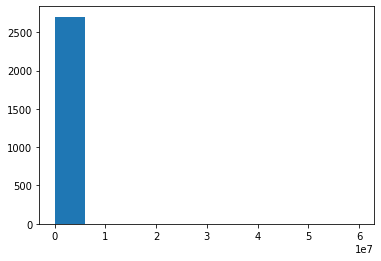

In [228]:
import matplotlib.pyplot as plt
plt.hist(w['Dead'])

In [233]:
w=bb[bb['Dead']<1000000]

In [178]:
aa=MORE_1[~MORE_1['Dead'].isna()]

In [189]:
bb=aa[~aa['Injured'].isna()]
bb['Injured']=bb['Injured'].astype(str)

In [190]:
bb["DD"]=bb["Injured"].str.split()
bb["WordsCount"]=bb["DD"].apply(lambda x: len(x))
bb=bb[bb["WordsCount"]== 1]

In [191]:
bb['Injured']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
183175     2.0
183176     0.0
183177    10.0
183178     2.0
183179     0.0
Name: Injured, Length: 183158, dtype: object

In [194]:
bb['Dead']=bb['Dead'].astype(int)
bb['Injured']=bb['Injured'].astype(int)

In [195]:
bb['Dead']

0              9
1             11
2         200000
3             15
4           3100
           ...  
183175         1
183176        34
183177         0
183178         0
183179        80
Name: Dead, Length: 183158, dtype: int64

In [129]:
aa['Injured']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
183175     2.0
183176     0.0
183177    10.0
183178     2.0
183179     0.0
Name: Injured, Length: 183164, dtype: object

In [109]:
aa.loc[(aa.Injured.str[-2:] == '.0'),'Injured']=aa.Injured.str+'.0'

TypeError: unsupported operand type(s) for +: 'StringMethods' and 'str'

In [141]:
s="'Secretive'"

s[2:5]

'ecr'

In [171]:
aa['Injured']=aa.Injured.astype(str)
aa['Dead']=aa.Dead.astype(str)

/Users/guillemramirezsantos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/guillemramirezsantos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [192]:
bb['Injured'] = np.where(bb.Injured.str[-2:]==".0",bb.Injured.str[:-2], bb.Injured)
#bb['Injured'] = np.where(bb.Injured.str[:5]=="GUANT",'0', bb.Injured)

In [173]:
S="GUANTANA"
S[:5]

'GUANT'

In [165]:
bb['Injured']=bb['Injured'].astype(str)

In [193]:
bb['Injured']

0          0
1          0
2          0
3          0
4          0
          ..
183175     2
183176     0
183177    10
183178     2
183179     0
Name: Injured, Length: 183158, dtype: object

In [77]:
aa['Dead']

0              9.0
1             11.0
2         200000.0
3             15.0
4           3100.0
            ...   
183175         1.0
183176        34.0
183177         0.0
183178         0.0
183179        80.0
Name: Dead, Length: 183164, dtype: float64

In [56]:
MORE_1.iloc[0]['Description']

'Of those, HRW said at least one was killed since President Conte imposed 10 days of martial law on Monday night, although news reports have recorded nine people killed around the country since then. In addition to the HRW count, IRIN has confirmed that a seven year-old girl, Aicha Diallo, was shot....'